**Exploratory data analysis of Zomato food delivery app**

# Предобработка данных

База данных приложения для доставки еды Zomato представляет собой всеобъемлющий набор таблиц, в которых хранится вся важная информация, связанная с приложением для доставки еды (Учетные данные, такие как имя пользователя, адрес электронной почты, пароль и продажи). База данных содержит информацию о заказах, сделанных пользователями, доступных в приложении продуктах питания, меню различных ресторанов, самих ресторанах и пользователях, зарегистрированных в приложении. Таблицы взаимосвязаны и хранят конкретную информацию, что позволяет эффективно извлекать данные. Таблица orders содержит информацию о заказах, включая дату, количество продаж, сумму продаж, валюту, идентификатор пользователя и идентификатор ресторана. В таблице food хранится информация о продуктах питания, включая их идентификатор, название и вегетарианский или невегетарианский статус. Таблица menu содержит информацию о меню ресторана, включая идентификатор меню, идентификатор ресторана, идентификатор блюда, кухню и цену. В таблице restaurant хранится информация о ресторанах, включая идентификатор, название, рейтинг, количество оценок, стоимость, кухню, номер лицензии, ссылку на веб-сайт, адрес и меню. Таблица users содержит информацию о пользователях приложения, включая их идентификатор, имя, адрес электронной почты, пароль, возраст, пол, семейное положение, профессию, ежемесячный доход, уровень образования и размер семьи. Эта база данных обеспечивает бесперебойную и эффективную работу приложения для доставки еды.
Датасет: https://www.kaggle.com/datasets/anas123siddiqui/zomato-database?resource=download&select=restaurant.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from datetime import datetime
from scipy import stats as st
import statsmodels.formula.api as smf
import collections as coll
import seaborn as sns
from tqdm import tqdm

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/sergeyvikulin/opt/anaconda3/lib/python3.9/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


Подгружаем датасеты:

In [3]:
users = pd.read_csv('users.csv', index_col=0)
orders = pd.read_csv('orders.csv', index_col=0)
restaurant = pd.read_csv('restaurant.csv', index_col=0)
menu = pd.read_csv('menu.csv', index_col=0)
food = pd.read_csv('food.csv', index_col=0)

/Users/sergeyvikulin/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/sergeyvikulin/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


## users

In [4]:
users

user_id                name                          email    password  \
0            1     Claire Ferguson        fordanthony@example.net  NKz0fWDh!5   
1            2      Jennifer Young              ann96@example.com  +i5Q91jt!s   
2            3   Jermaine Roberson            uwalker@example.org  eO4GqGusF(   
3            4    Rachel Carpenter  kimberlypatterson@example.net  d^c7O6odaS   
4            5        Shawn Parker    daniellebennett@example.com  8J#E5RMl1o   
...        ...                 ...                            ...         ...   
99995    99996         James Ellis      maddentabitha@example.org  SvO6QoCcv!   
99996    99997  Justin Christensen        sextonrenee@example.org  +5L+HXxq(Q   
99997    99998        Mark Collier             gwelch@example.org  +kAMm!u5m8   
99998    99999   Lori Henderson MD      howardwilliam@example.org  C)0lH%d^b)   
99999   100000      Kathryn Morgan          michael50@example.org  @6JLLyduWO   

       Age  Gender     Marital Status Occupation  Monthly Income  \
0       20  Female             Single    Student       No Income   
1       24  Female             Single    Student  Below Rs.10000   
2       22    Male             Single    Student  Below Rs.10000   
3       22  Female             Single    Student       No Income   
4       22    Male             Single    Student  Below Rs.10000   
...    ...     ...                ...        ...             ...   
99995   23  Female  Prefer not to say   Employee  10001 to 25000   
99996   19    Male             Single    Student       No Income   
99997   21  Female             Single    Student       No Income   
99998   23    Male             Single    Student       No Income   
99999   24  Female             Single   Employee  25001 to 50000   

      Educational Qualifications  Family size  
0                  Post Graduate            4  
1                       Graduate            3  
2                  Post Graduate            3  
3                       Graduate            6  
4                  Post Graduate            4  
...                          ...          ...  
99995                   Graduate            4  
99996                   Graduate            6  
99997                   Graduate            2  
99998                   Graduate            4  
99999                   Graduate            3  

[100000 rows x 11 columns]

Числовые переменные - Age, Family size. Остальные переменные категориальные:

In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   user_id                     100000 non-null  int64 
 1   name                        100000 non-null  object
 2   email                       100000 non-null  object
 3   password                    100000 non-null  object
 4   Age                         100000 non-null  int64 
 5   Gender                      100000 non-null  object
 6   Marital Status              100000 non-null  object
 7   Occupation                  100000 non-null  object
 8   Monthly Income              100000 non-null  object
 9   Educational Qualifications  100000 non-null  object
 10  Family size                 100000 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 9.2+ MB


В таблице users нет пропущенных значений:

In [6]:
users.isnull().sum().sort_values()

user_id                       0
name                          0
email                         0
password                      0
Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
dtype: int64

Сделаем переменную user_id категориальной:

In [7]:
users['user_id']=users['user_id'].astype('object')

Посмотрим распределение интересующих нас категориальных переменных:

In [8]:
coll.Counter(users['Gender'])

Counter({'Female': 42782, 'Male': 57218})

In [9]:
coll.Counter(users['Marital Status'])

Counter({'Single': 69077, 'Married': 27831, 'Prefer not to say': 3092})

In [10]:
coll.Counter(users['Occupation'])

Counter({'Student': 53357,
         'Employee': 30408,
         'Self Employeed': 13913,
         'House wife': 2322})

Переменную Monthly Income некорректно переводить в числовую (например, присвоить каждому интервалу среднее значение), 
так как такое представление будет некорректно описывать общую выборку. Переменную Monthly Income лучше оставить в виде порядковой переменной. 

In [11]:
coll.Counter(users['Monthly Income'])

Counter({'No Income': 48204,
         'Below Rs.10000': 6442,
         'More than 50000': 15976,
         '10001 to 25000': 11599,
         '25001 to 50000': 17779})

In [12]:
coll.Counter(users['Educational Qualifications'])

Counter({'Post Graduate': 44852,
         'Graduate': 45610,
         'Ph.D': 5928,
         'Uneducated': 516,
         'School': 3094})

Столбцы email и password не интересуют нас в анализе данных, поэтому удалим их:

In [13]:
users=users.drop(['email', 'password'], axis=1)

Обработанная таблица users:

In [14]:
users

user_id                name  Age  Gender     Marital Status Occupation  \
0           1     Claire Ferguson   20  Female             Single    Student   
1           2      Jennifer Young   24  Female             Single    Student   
2           3   Jermaine Roberson   22    Male             Single    Student   
3           4    Rachel Carpenter   22  Female             Single    Student   
4           5        Shawn Parker   22    Male             Single    Student   
...       ...                 ...  ...     ...                ...        ...   
99995   99996         James Ellis   23  Female  Prefer not to say   Employee   
99996   99997  Justin Christensen   19    Male             Single    Student   
99997   99998        Mark Collier   21  Female             Single    Student   
99998   99999   Lori Henderson MD   23    Male             Single    Student   
99999  100000      Kathryn Morgan   24  Female             Single   Employee   

       Monthly Income Educational Qualifications  Family size  
0           No Income              Post Graduate            4  
1      Below Rs.10000                   Graduate            3  
2      Below Rs.10000              Post Graduate            3  
3           No Income                   Graduate            6  
4      Below Rs.10000              Post Graduate            4  
...               ...                        ...          ...  
99995  10001 to 25000                   Graduate            4  
99996       No Income                   Graduate            6  
99997       No Income                   Graduate            2  
99998       No Income                   Graduate            4  
99999  25001 to 50000                   Graduate            3  

[100000 rows x 9 columns]

## orders

In [15]:
orders

order_date  sales_qty  sales_amount currency  user_id      r_id
0       2017-10-10        100         41241      INR    49226  567335.0
1       2018-05-08          3            -1      INR    77359  531342.0
2       2018-04-06          1           875      INR     5321  158203.0
3       2018-04-11          1           583      INR    21343  187912.0
4       2018-06-18          6          7176      INR    75378  543530.0
...            ...        ...           ...      ...      ...       ...
150276  2019-04-18          1           394    INR\n    79856       NaN
150277  2019-04-23          1           667    INR\n    65798       NaN
150278  2019-04-23          1           625    INR\n    49176       NaN
150279  2019-04-24          7          8625    INR\n    87924       NaN
150280  2019-04-24          3          3792    INR\n    41474       NaN

[150281 rows x 6 columns]

In [16]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150281 entries, 0 to 150280
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_date    150281 non-null  object 
 1   sales_qty     150281 non-null  int64  
 2   sales_amount  150281 non-null  int64  
 3   currency      150281 non-null  object 
 4   user_id       150281 non-null  int64  
 5   r_id          148664 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 8.0+ MB


Есть пропуски в r_id (id ресторана):

In [17]:
orders.isnull().sum().sort_values()

order_date         0
sales_qty          0
sales_amount       0
currency           0
user_id            0
r_id            1617
dtype: int64

Удалим наблюдения с пропусками, так как мы не знаем, какой ресторан отвечал за заказ, и таких наблюдений немного:

In [18]:
orders= orders.dropna(subset=['r_id'])
orders

order_date  sales_qty  sales_amount currency  user_id      r_id
0       2017-10-10        100         41241      INR    49226  567335.0
1       2018-05-08          3            -1      INR    77359  531342.0
2       2018-04-06          1           875      INR     5321  158203.0
3       2018-04-11          1           583      INR    21343  187912.0
4       2018-06-18          6          7176      INR    75378  543530.0
...            ...        ...           ...      ...      ...       ...
148659  2019-03-15          1          1630    INR\n    25901  390478.0
148660  2019-03-15          1          2611    INR\n    97820  103649.0
148661  2019-03-15          7         10458    INR\n     6041  430451.0
148662  2019-03-18          1           713    INR\n    81310  518548.0
148663  2019-03-18          1          1741    INR\n      944  518819.0

[148664 rows x 6 columns]

Удалим ошибки в данных, где сумма заказа отрицательна:

In [19]:
orders[orders['sales_qty']<0]

Empty DataFrame
Columns: [order_date, sales_qty, sales_amount, currency, user_id, r_id]
Index: []

In [20]:
orders[orders['sales_amount']<0]

order_date  sales_qty  sales_amount currency  user_id      r_id
1    2018-05-08          3            -1      INR    77359  531342.0
282  2018-05-08          3            -1    INR\n      357  509389.0

In [21]:
orders = orders.drop([1,282]).reset_index(drop=True)
orders

order_date  sales_qty  sales_amount currency  user_id      r_id
0       2017-10-10        100         41241      INR    49226  567335.0
1       2018-04-06          1           875      INR     5321  158203.0
2       2018-04-11          1           583      INR    21343  187912.0
3       2018-06-18          6          7176      INR    75378  543530.0
4       2017-11-20         59           500      USD    34323  158204.0
...            ...        ...           ...      ...      ...       ...
148657  2019-03-15          1          1630    INR\n    25901  390478.0
148658  2019-03-15          1          2611    INR\n    97820  103649.0
148659  2019-03-15          7         10458    INR\n     6041  430451.0
148660  2019-03-18          1           713    INR\n    81310  518548.0
148661  2019-03-18          1          1741    INR\n      944  518819.0

[148662 rows x 6 columns]

Сделаем переменную r_id типа object:

In [22]:
orders['r_id'] = orders['r_id'].astype('int')
orders['r_id'] = orders['r_id'].astype('object')

Сделаем переменную order_date типа datetime:

In [23]:
from datetime import date
a=[0]*148662
for i in range(len(orders)):
    year1=int(orders['order_date'][i][:4])
    month1=int(orders['order_date'][i][5:7])
    date1=int(orders['order_date'][i][8:10])
    a[i]=datetime.date(year1, month1, date1)
orders['order_date']=a
orders

order_date  sales_qty  sales_amount currency  user_id    r_id
0       2017-10-10        100         41241      INR    49226  567335
1       2018-04-06          1           875      INR     5321  158203
2       2018-04-11          1           583      INR    21343  187912
3       2018-06-18          6          7176      INR    75378  543530
4       2017-11-20         59           500      USD    34323  158204
...            ...        ...           ...      ...      ...     ...
148657  2019-03-15          1          1630    INR\n    25901  390478
148658  2019-03-15          1          2611    INR\n    97820  103649
148659  2019-03-15          7         10458    INR\n     6041  430451
148660  2019-03-18          1           713    INR\n    81310  518548
148661  2019-03-18          1          1741    INR\n      944  518819

[148662 rows x 6 columns]

Посмотрим распределение интересующих нас переменных:

In [24]:
coll.Counter(orders['currency'])

Counter({'INR': 278, 'USD': 2, 'INR\n': 148382})

Судя по всему, валюта INR и INR\r обозначают одно и то же (индийскую рупию), и у нас опечатка в данных!

In [25]:
orders.groupby(['currency']).agg({'sales_amount':['mean']})

sales_amount
                 mean
currency             
INR       6300.557554
INR\n     6486.682832
USD        375.000000

Переведем операции в долларах в рупии. Для этого воспользуемся курсом на дату проведения операции (ниже приведены ссылки):

In [26]:
orders[orders['currency']=='USD']

order_date  sales_qty  sales_amount currency  user_id    r_id
4  2017-11-20         59           500      USD    34323  158204
5  2017-11-22         36           250      USD    33246  156588

In [27]:
list(orders[orders['currency']=='USD']['order_date'])

[datetime.date(2017, 11, 20), datetime.date(2017, 11, 22)]

Курс доллара 2017-11-20: 1 USD to INR = 65.0372
https://www.exchangerates.org.uk/historical/USD/20_11_2017

Курс доллара 2017-11-22: 1 USD to INR = 64.7843
https://www.exchangerates.org.uk/historical/USD/22_11_2017

In [28]:
orders['sales_amount'][4]=float(orders['sales_amount'][4])*65.0372
orders['sales_amount'][5]=float(orders['sales_amount'][5])*64.7843


/var/folders/m_/pktzsp9j7d10cx63t_w9_6pr0000gn/T/ipykernel_76663/2802899564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders['sales_amount'][4]=float(orders['sales_amount'][4])*65.0372
/var/folders/m_/pktzsp9j7d10cx63t_w9_6pr0000gn/T/ipykernel_76663/2802899564.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders['sales_amount'][5]=float(orders['sales_amount'][5])*64.7843


In [29]:
orders[orders['currency']=='USD']

order_date  sales_qty  sales_amount currency  user_id    r_id
4  2017-11-20         59         32518      USD    34323  158204
5  2017-11-22         36         16196      USD    33246  156588

Далее мы можем удалить столбец currency, так все значения покупок отражены в индийских рупиях:

In [30]:
orders=orders.drop(['currency'], axis=1)

Обработанная таблица orders:

In [31]:
orders

order_date  sales_qty  sales_amount  user_id    r_id
0       2017-10-10        100         41241    49226  567335
1       2018-04-06          1           875     5321  158203
2       2018-04-11          1           583    21343  187912
3       2018-06-18          6          7176    75378  543530
4       2017-11-20         59         32518    34323  158204
...            ...        ...           ...      ...     ...
148657  2019-03-15          1          1630    25901  390478
148658  2019-03-15          1          2611    97820  103649
148659  2019-03-15          7         10458     6041  430451
148660  2019-03-18          1           713    81310  518548
148661  2019-03-18          1          1741      944  518819

[148662 rows x 5 columns]

## restaurant

In [32]:
restaurant

id                      name      city rating     rating_count  \
0       567335            AB FOODS POINT    Abohar     --  Too Few Ratings   
1       531342         Janta Sweet House    Abohar    4.4      50+ ratings   
2       158203         theka coffee desi    Abohar    3.8     100+ ratings   
3       187912                 Singh Hut    Abohar    3.7      20+ ratings   
4       543530             GRILL MASTERS    Abohar     --  Too Few Ratings   
...        ...                       ...       ...    ...              ...   
148536  553122          The Food Delight  Yavatmal     --  Too Few Ratings   
148537  562647  MAITRI FOODS & BEVERAGES  Yavatmal     --  Too Few Ratings   
148538  559435           Cafe Bella Ciao  Yavatmal     --  Too Few Ratings   
148539  418989               GRILL ZILLA  Yavatmal     --  Too Few Ratings   
148540  447770            Lazeez kitchen  Yavatmal     --  Too Few Ratings   

         cost                     cuisine          lic_no  \
0       ₹ 200            Beverages,Pizzas  22122652000138   
1       ₹ 200               Sweets,Bakery  12117201000112   
2       ₹ 100                   Beverages  22121652000190   
3       ₹ 250            Fast Food,Indian  22119652000167   
4       ₹ 250  Italian-American,Fast Food  12122201000053   
...       ...                         ...             ...   
148536  ₹ 200            Fast Food,Snacks  21522053000452   
148537  ₹ 300                      Pizzas         license   
148538  ₹ 300            Fast Food,Snacks  21522251000378   
148539  ₹ 250                 Continental  21521251000241   
148540  ₹ 200                      Pizzas  21521251000634   

                                                     link  \
0       https://www.swiggy.com/restaurants/ab-foods-po...   
1       https://www.swiggy.com/restaurants/janta-sweet...   
2       https://www.swiggy.com/restaurants/theka-coffe...   
3       https://www.swiggy.com/restaurants/singh-hut-n...   
4       https://www.swiggy.com/restaurants/grill-maste...   
...                                                   ...   
148536  https://www.swiggy.com/restaurants/the-food-de...   
148537  https://www.swiggy.com/restaurants/maitri-food...   
148538  https://www.swiggy.com/restaurants/cafe-bella-...   
148539  https://www.swiggy.com/restaurants/grill-zilla...   
148540  https://www.swiggy.com/restaurants/lazeez-kitc...   

                                                  address              menu  
0       AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...  Menu/567335.json  
1       Janta Sweet House, Bazar No.9, Circullar Road,...  Menu/531342.json  
2              theka coffee desi, sahtiya sadan road city  Menu/158203.json  
3         Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR  Menu/187912.json  
4       GRILL MASTERS, ADA Heights, Abohar - Hanumanga...  Menu/543530.json  
...                                                   ...               ...  
148536  The Food Delight, 94MC+X35, New Singhania Naga...  Menu/553122.json  
148537  MAITRI FOODS & BEVERAGES, POLIC MITRYA SOCIETY...  Menu/562647.json  
148538  Cafe Bella Ciao, SHOP NO 2 NEMANI MARKET SBI S...  Menu/559435.json  
148539  GRILL ZILLA, SHO NO 2/6, POSTEL GROUND CHOWPAT...  Menu/418989.json  
148540  Lazeez kitchen, 94G3+2RR, Wadgaon, Yavatmal, M...  Menu/447770.json  

[148541 rows x 11 columns]

In [33]:
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148541 entries, 0 to 148540
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            148541 non-null  int64 
 1   name          148455 non-null  object
 2   city          148541 non-null  object
 3   rating        148455 non-null  object
 4   rating_count  148455 non-null  object
 5   cost          148410 non-null  object
 6   cuisine       148442 non-null  object
 7   lic_no        148312 non-null  object
 8   link          148541 non-null  object
 9   address       148455 non-null  object
 10  menu          148541 non-null  object
dtypes: int64(1), object(10)
memory usage: 13.6+ MB


Сделаем переменную id категориальной:

In [34]:
restaurant['id'] = restaurant['id'].astype('object')


Во многих переменных есть пропуски:

In [35]:
restaurant.isnull().sum().sort_values()

id                0
city              0
link              0
menu              0
name             86
rating           86
rating_count     86
address          86
cuisine          99
cost            131
lic_no          229
dtype: int64

Заметим, что в 86 строчках пропущены значения в столбцах name, rating, rating_count, address, cuisine, cost, lic_no:

In [36]:
restaurant[restaurant['name'].isnull()==True]

id name                       city rating rating_count cost  \
31044   397961  NaN  Greater Mohali,Chandigarh    NaN          NaN  NaN   
32912   308071  NaN        West Chd,Chandigarh    NaN          NaN  NaN   
33046   308662  NaN        West Chd,Chandigarh    NaN          NaN  NaN   
33488   170889  NaN       South Chd,Chandigarh    NaN          NaN  NaN   
36492   390394  NaN        George Town,Chennai    NaN          NaN  NaN   
...        ...  ...                        ...    ...          ...  ...   
137122  256827  NaN                     Satara    NaN          NaN  NaN   
137546  567595  NaN                   Shillong    NaN          NaN  NaN   
137614  116615  NaN                 Shivamogga    NaN          NaN  NaN   
138380  401760  NaN                      Sirsa    NaN          NaN  NaN   
141568  463812  NaN         Thiruvananthapuram    NaN          NaN  NaN   

       cuisine lic_no                                               link  \
31044      NaN    NaN  https://www.swiggy.com/restaurants/5-tara-grea...   
32912      NaN    NaN  https://www.swiggy.com/restaurants/food-under-...   
33046      NaN    NaN  https://www.swiggy.com/restaurants/franks-frie...   
33488      NaN    NaN  https://www.swiggy.com/restaurants/dhaba-7-pre...   
36492      NaN    NaN  https://www.swiggy.com/restaurants/frozen-cafe...   
...        ...    ...                                                ...   
137122     NaN    NaN  https://www.swiggy.com/restaurants/rajdhani-pa...   
137546     NaN    NaN  https://www.swiggy.com/restaurants/the-blue-ri...   
137614     NaN    NaN  https://www.swiggy.com/restaurants/bakers-bowl...   
138380     NaN    NaN  https://www.swiggy.com/restaurants/murga-dlf-p...   
141568     NaN    NaN  https://www.swiggy.com/restaurants/punjabi-dha...   

       address              menu  
31044      NaN  Menu/397961.json  
32912      NaN  Menu/308071.json  
33046      NaN  Menu/308662.json  
33488      NaN  Menu/170889.json  
36492      NaN  Menu/390394.json  
...        ...               ...  
137122     NaN  Menu/256827.json  
137546     NaN  Menu/567595.json  
137614     NaN  Menu/116615.json  
138380     NaN  Menu/401760.json  
141568     NaN  Menu/463812.json  

[86 rows x 11 columns]

Так как все 86 ресторанов с пропущенными значениями есть в таблице orders, то их нельзя удалять:

In [37]:
a=set(restaurant[restaurant['name'].isnull()==True]['id'])

In [38]:
b=set()
for i in orders['r_id']:
    if i in a:
        b.add(i)
print(a==b)

True


Поэтому назовем эти 86 ресторанов - Other:

In [39]:
restaurant['name'] = restaurant['name']. fillna('Other')

Видим, что помимо 86 ресторанов с пропусками в rating, есть еще большое количество ресторанов (87014) с недостаточным количеством отзывов для получения рейтинга:

In [40]:
coll.Counter(restaurant['rating']).most_common(10)

[('--', 87014),
 ('4.0', 6532),
 ('4.1', 6296),
 ('4.2', 5821),
 ('3.8', 5736),
 ('3.9', 5435),
 ('4.3', 5011),
 ('3.7', 4253),
 ('4.4', 3149),
 ('3.5', 2963)]

Пока заменим 86 пропусков на '--':

In [41]:
restaurant['rating'] = restaurant['rating']. fillna('--')

Чтобы оставить переменную rating в численном виде, заменим рейтинг ресторанов с малым количеством отзывов на средний рейтинг ресторанов:

In [42]:
c=list(restaurant['rating'])
s=0
count=0
for i in range(len(c)):
    if c[i]!='--':
        s=s+float(c[i])
        count=count+1
for i in range(len(c)):
    if c[i]=='--':
        c[i]=str(round(s/count,1))
print(round(s/count,1))


3.9


In [43]:
restaurant['rating']= c
restaurant['rating'] = restaurant['rating']. astype('float')

In [44]:
coll.Counter(restaurant['rating_count'])

Counter({'Too Few Ratings': 87014,
         '50+ ratings': 12009,
         '100+ ratings': 20548,
         '20+ ratings': 21636,
         '500+ ratings': 4396,
         '1K+ ratings': 2739,
         '5K+ ratings': 98,
         nan: 86,
         '10K+ ratings': 15})

Заменим 86 пропусков в переменной rating_count на 'Too Few Ratings' (недостаточно отзывов):

In [45]:
restaurant['rating_count'] = restaurant['rating_count']. fillna('Too Few Ratings')

In [46]:
coll.Counter(restaurant['cost']).most_common(10)

[('₹ 200', 38635),
 ('₹ 300', 29701),
 ('₹ 250', 19745),
 ('₹ 150', 12096),
 ('₹ 400', 11711),
 ('₹ 500', 6378),
 ('₹ 350', 6296),
 ('₹ 100', 6186),
 ('₹ 600', 2558),
 ('₹ 450', 1456)]

Заменим пропуски в перменной cost на '₹ --', а затем заполним их средним значением по аналогии с переменной rating:

In [47]:
restaurant['cost'] = restaurant['cost']. fillna('₹ --')
c=list(restaurant['cost'])
for i in range(len(c)):
    c[i]=c[i][2:]
s=0
count=0
for i in range(len(c)):
    if c[i]!='--':
        s=s+float(c[i])
        count=count+1
for i in range(len(c)):
    if c[i]=='--':
        c[i]=str(round(s/count,1))
print(round(s/count,1))

287.6


In [48]:
restaurant['cost']= c
restaurant['cost'] = restaurant['cost']. astype('float')

Видим, что в столбце cuisine каждый ресторан написал кухню как захотел. Теперь невозможно адекватно разделить рестораны по кухням и блюдам:

In [49]:
coll.Counter(restaurant['cuisine']).most_common(20)

[('North Indian,Chinese', 6471),
 ('Indian', 6414),
 ('Chinese', 5051),
 ('North Indian', 4775),
 ('Indian,Chinese', 4374),
 ('South Indian', 3303),
 ('Bakery', 3132),
 ('Chinese,Indian', 2308),
 ('Chinese,North Indian', 2288),
 ('Bakery,Desserts', 2233),
 ('Biryani', 2227),
 ('Pizzas', 2215),
 ('Beverages', 2157),
 ('North Indian,Indian', 2004),
 ('Snacks', 1788),
 ('Fast Food', 1671),
 ('Biryani,North Indian', 1644),
 ('Chinese,Snacks', 1622),
 ('Fast Food,Snacks', 1601),
 ('Ice Cream,Desserts', 1577)]

Заполним пропуски переменной cuisine на 'Other':

In [50]:
restaurant['cuisine'] = restaurant['cuisine']. fillna('Other')

Далее посмотрим распределение кухонь и блюд среди ресторанов (для этого сделаем split по запятой, так как многие рестораны попадают в несколько категорий). Замечание: распределение не совсем корректно, так как где-то были опечатки и был лишний пробел. Однако это не так существенно и можно этим пренебречь:

In [51]:
c=list(restaurant['cuisine'])
e=dict()
for i in range(len(c)):
    d=c[i].split(',')
    for j in range(len(d)):
        if d[j] not in e:
            e[d[j]]=1
        else:
            e[d[j]]+=1
e = dict(sorted(e.items(), key=lambda item: item[1]))
print(e)
     

{'Biryani - Shivaji Military Hotel': 1, 'Use Code JUMBO30 to avail': 1, 'Attractive Combos Available': 1, 'Default': 1, 'Bakery products': 1, 'Code valid on bill over Rs.99': 1, 'Free Delivery ! Limited Stocks!': 1, 'MAX 2 Combos per Order!': 1, 'Navratri Special': 1, 'BEVERAGE': 1, 'Meat': 1, 'Discount offer from Garden Cafe Express Kankurgachi': 1, 'Use code XPRESS121 to avail.': 1, 'Bowl Company': 1, 'Special Discount from (Hotel Swagath)': 1, 'indian': 1, 'Khasi': 1, 'Grocery products': 1, 'Australian': 2, 'Sri Lankan': 2, 'Tandoor ': 2, 'Mongolian': 3, 'Popular Brand Store': 4, 'Tribal': 4, 'Konkan': 5, 'Greek': 6, 'German': 6, 'South American': 6, 'Telangana': 6, 'Bhutanese': 6, 'SVANidhi Street Food Vendor': 8, 'Rayalaseema': 8, '8:15 To 11:30 Pm': 9, 'Steakhouse': 10, 'Persian': 10, 'Spanish': 11, 'Vietnamese': 12, 'Singaporean': 12, 'Indonesian': 13, 'Portuguese': 14, 'African': 14, 'Tex-Mex': 14, 'Parsi': 14, 'Sindhi': 15, 'Kashmiri': 18, 'Malaysian': 21, 'Bangladeshi': 24, '

In [52]:
148541*0.005

742.705

Разделим характеристику cuisine на cuisines(какая кухня в ресторане) и foods(основные продукты и еда) и оставим только те категории, которые встречаются минимум в 0,5% ресторанах(>742):

In [53]:
cuisines=['Chinese','Indian','Italian', 'Continental', 'American', 'Mughlai',
          'Arabian', 'Punjabi', 'Asian', 'Bengali', 'Maharashtrian']
foods=['Snack', 'Biryani', 'Beverage', 'Fast Food', 
       'Dessert', 'Pizza', 'Bakery', 'Ice Cream',
      'Sweet', 'Tandoor', 'Street Food', 'Thalis',
      'Juice', 'Chaat', 'Healthy Food', 'Kebab',
      'Pasta', 'Salad', 'Combo', 'Burger', 'Seafood']

Тут мы ищем в каждой строке характеристику из cuisines и характеристику из foods, если характеристики нет среди популярных, то заменим ее на 'Other'. Если есть вторая характеристика из foods или из cuisines, то добавим ее в столбцы additional_food и additional_cuisine соответственно. По умолчанию в данных столбцах стоит:'No':

In [54]:
cuisine=['Other']*148541
additional_cuisine=['No']*148541
additional_foo=['No']*148541
foo=['Other']*148541
for i in range(len(c)):
    t=True
    for j in range(len(cuisines)):
        if t and c[i].find(cuisines[j])!=-1:
            cuisine[i]=cuisines[j]
            t=False
        elif c[i].find(cuisines[j])!=-1:
            additional_cuisine[i]=cuisines[j]
            break
                      
for i in range(len(c)):
    t=True
    for j in range(len(foods)):
        if t and c[i].find(foods[j])!=-1:
            foo[i]=foods[j]
            t=False
        elif c[i].find(foods[j])!=-1:
            additional_foo[i]=foods[j]
            break

In [55]:
restaurant['cuisine']=cuisine
restaurant['food']=foo
restaurant['additional_cuisine']=additional_cuisine
restaurant['additional_food']=additional_foo

Распределение в столбце cuisine:

In [56]:
coll.Counter(restaurant['cuisine'])

Counter({'Other': 50938,
         'Indian': 46574,
         'Italian': 5008,
         'Continental': 2189,
         'Chinese': 36464,
         'American': 2993,
         'Arabian': 1676,
         'Bengali': 463,
         'Mughlai': 1211,
         'Asian': 330,
         'Maharashtrian': 411,
         'Punjabi': 284})

Распределение в столбце food:

In [57]:
coll.Counter(restaurant['food'])

Counter({'Beverage': 12247,
         'Bakery': 4280,
         'Fast Food': 10044,
         'Other': 61588,
         'Snack': 17231,
         'Dessert': 9075,
         'Tandoor': 2006,
         'Pizza': 6935,
         'Ice Cream': 1423,
         'Thalis': 1681,
         'Chaat': 799,
         'Biryani': 14159,
         'Street Food': 1252,
         'Sweet': 1294,
         'Healthy Food': 1074,
         'Combo': 665,
         'Salad': 332,
         'Pasta': 347,
         'Kebab': 650,
         'Seafood': 763,
         'Burger': 184,
         'Juice': 512})

Распределение в столбце additional_cuisine:

In [58]:
coll.Counter(restaurant['additional_cuisine'])

Counter({'No': 121102,
         'American': 1306,
         'Indian': 17258,
         'Punjabi': 1632,
         'Mughlai': 1541,
         'Bengali': 477,
         'Continental': 1773,
         'Asian': 1295,
         'Arabian': 788,
         'Italian': 988,
         'Maharashtrian': 381})

Распределение в столбце additional_food:

In [59]:
coll.Counter(restaurant['additional_food'])

Counter({'Pizza': 2910,
         'Sweet': 1742,
         'No': 119551,
         'Chaat': 954,
         'Juice': 1273,
         'Beverage': 2023,
         'Dessert': 2118,
         'Bakery': 4559,
         'Street Food': 749,
         'Kebab': 601,
         'Ice Cream': 3930,
         'Salad': 749,
         'Pasta': 852,
         'Burger': 727,
         'Fast Food': 3848,
         'Tandoor': 341,
         'Healthy Food': 602,
         'Biryani': 365,
         'Thalis': 158,
         'Combo': 358,
         'Seafood': 131})

Удалим стоблцы link,menu,lic_no,address, так как они не понадобятся нам в анализе данных, а также переименуем столбец id для дальнейшего удобства (чтобы было удобно соединять таблицы):

In [60]:
restaurant=restaurant.drop(['link','menu','lic_no','address'], axis=1)
restaurant=restaurant.rename(columns = {'id':'r_id', 'name': 'restaurant_name'})

Обработанная таблица restaurant:

In [61]:
restaurant

r_id           restaurant_name      city  rating     rating_count  \
0       567335            AB FOODS POINT    Abohar     3.9  Too Few Ratings   
1       531342         Janta Sweet House    Abohar     4.4      50+ ratings   
2       158203         theka coffee desi    Abohar     3.8     100+ ratings   
3       187912                 Singh Hut    Abohar     3.7      20+ ratings   
4       543530             GRILL MASTERS    Abohar     3.9  Too Few Ratings   
...        ...                       ...       ...     ...              ...   
148536  553122          The Food Delight  Yavatmal     3.9  Too Few Ratings   
148537  562647  MAITRI FOODS & BEVERAGES  Yavatmal     3.9  Too Few Ratings   
148538  559435           Cafe Bella Ciao  Yavatmal     3.9  Too Few Ratings   
148539  418989               GRILL ZILLA  Yavatmal     3.9  Too Few Ratings   
148540  447770            Lazeez kitchen  Yavatmal     3.9  Too Few Ratings   

         cost      cuisine       food additional_cuisine additional_food  
0       200.0        Other   Beverage                 No           Pizza  
1       200.0        Other     Bakery                 No           Sweet  
2       100.0        Other   Beverage                 No              No  
3       250.0       Indian  Fast Food                 No              No  
4       250.0      Italian  Fast Food           American              No  
...       ...          ...        ...                ...             ...  
148536  200.0        Other      Snack                 No       Fast Food  
148537  300.0        Other      Pizza                 No              No  
148538  300.0        Other      Snack                 No       Fast Food  
148539  250.0  Continental      Other                 No              No  
148540  200.0        Other      Pizza                 No              No  

[148541 rows x 10 columns]

In [62]:
restaurant.isnull().sum().sort_values()

r_id                  0
restaurant_name       0
city                  0
rating                0
rating_count          0
cost                  0
cuisine               0
food                  0
additional_cuisine    0
additional_food       0
dtype: int64

## Menu

In [63]:
menu

menu_id    r_id       f_id             cuisine  price
0              mn0  567335        fd0    Beverages,Pizzas   40.0
1              mn0  567335   fd669322    Beverages,Pizzas   40.0
2            mn328  158203        fd0           Beverages   65.0
3            mn328  158203   fd669322           Beverages   65.0
4            mn449  158203        fd0           Beverages   65.0
...            ...     ...        ...                 ...    ...
1179931  mn1048555   96525  fd1048555  Ice Cream,Desserts  300.0
1179932  mn1048556   96525  fd1048556  Ice Cream,Desserts  300.0
1179933  mn1048558   96525  fd1048558  Ice Cream,Desserts  350.0
1179934  mn1048561   96525  fd1048561  Ice Cream,Desserts  200.0
1179935  mn1048562   96525  fd1048562  Ice Cream,Desserts  270.0

[1179936 rows x 5 columns]

In [64]:
menu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1179936 entries, 0 to 1179935
Data columns (total 5 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   menu_id  1179936 non-null  object
 1   r_id     1179936 non-null  int64 
 2   f_id     1179936 non-null  object
 3   cuisine  1179936 non-null  object
 4   price    1179936 non-null  object
dtypes: int64(1), object(4)
memory usage: 54.0+ MB


Сделаем столбец price типа float, а столбец r_id типа object: 

In [65]:
price=[0]*1179936
for i in range(len(menu['price'])):
    if str(menu['price'][i]).find('₹')!=-1:
        price[i]=float(menu['price'][i][1:-7])
    else:
        price[i]=float(menu['price'][i])

In [66]:
menu['r_id']=menu['r_id'].astype('object')
menu['price']=price

В таблице menu нет пропусков:

In [67]:
menu.isnull().sum().sort_values()

menu_id    0
r_id       0
f_id       0
cuisine    0
price      0
dtype: int64

In [68]:
e=coll.Counter(menu['menu_id'])

Видим, что в каждом меню либо 1, либо 2 продукта. Скорее всего это зависит от того, представлен ли продукт для вегетарианцев или нет:

In [69]:
e = dict(reversed(sorted(e.items(), key=lambda item: item[1])))
e

{'mn1047925': 2,
 'mn1025355': 2,
 'mn1039269': 2,
 'mn1021849': 2,
 'mn1039258': 2,
 'mn1021827': 2,
 'mn1039216': 2,
 'mn1021811': 2,
 'mn1039175': 2,
 'mn1021807': 2,
 'mn1039176': 2,
 'mn1021806': 2,
 'mn1039174': 2,
 'mn1021805': 2,
 'mn1039171': 2,
 'mn1021802': 2,
 'mn1039178': 2,
 'mn1021801': 2,
 'mn1039170': 2,
 'mn1021800': 2,
 'mn1039184': 2,
 'mn1021783': 2,
 'mn1039168': 2,
 'mn1021770': 2,
 'mn1039166': 2,
 'mn1021766': 2,
 'mn1039164': 2,
 'mn1021763': 2,
 'mn1047639': 2,
 'mn1010816': 2,
 'mn1047638': 2,
 'mn1010815': 2,
 'mn1039172': 2,
 'mn1021803': 2,
 'mn1007293': 2,
 'mn1005093': 2,
 'mn994585': 2,
 'mn1005094': 2,
 'mn994584': 2,
 'mn1005088': 2,
 'mn994581': 2,
 'mn1005087': 2,
 'mn994579': 2,
 'mn1043904': 2,
 'mn1005086': 2,
 'mn1005072': 2,
 'mn994583': 2,
 'mn994562': 2,
 'mn1005092': 2,
 'mn1005074': 2,
 'mn994582': 2,
 'mn994561': 2,
 'mn1047944': 2,
 'mn1025370': 2,
 'mn993628': 2,
 'mn1047942': 2,
 'mn1047932': 2,
 'mn1025368': 2,
 'mn1025360': 2,
 'mn99

Проверив данную гипотезу, видим, что это действительно так и в каждом меню представлен один продукт:

In [70]:
resultdf=menu.merge(food,how="inner",on="f_id")
resultdf

menu_id    r_id       f_id             cuisine  price  \
0              mn0  567335        fd0    Beverages,Pizzas   40.0   
1            mn328  158203        fd0           Beverages   65.0   
2            mn449  158203        fd0           Beverages   65.0   
3            mn729  158204        fd0         Continental   60.0   
4            mn755  158204        fd0         Continental   60.0   
...            ...     ...        ...                 ...    ...   
1179931  mn1048555   96525  fd1048555  Ice Cream,Desserts  300.0   
1179932  mn1048556   96525  fd1048556  Ice Cream,Desserts  300.0   
1179933  mn1048558   96525  fd1048558  Ice Cream,Desserts  350.0   
1179934  mn1048561   96525  fd1048561  Ice Cream,Desserts  200.0   
1179935  mn1048562   96525  fd1048562  Ice Cream,Desserts  270.0   

                           item veg_or_non_veg  
0             Aloo Tikki Burger            Veg  
1             Aloo Tikki Burger            Veg  
2             Aloo Tikki Burger            Veg  
3             Aloo Tikki Burger            Veg  
4             Aloo Tikki Burger            Veg  
...                         ...            ...  
1179931    Sizzlers De- Verdure            Veg  
1179932         Veg Bbq Sizzler            Veg  
1179933    Veg Sizzling Italian            Veg  
1179934  Veg Overload  Sandwich            Veg  
1179935    Aglio Riso Rice Bowl            Veg  

[1179936 rows x 7 columns]

In [71]:
sl={}
r=0
for i in range(len(resultdf['menu_id'])):
    if  resultdf['menu_id'][i] not in sl:
        sl[resultdf['menu_id'][i]]=resultdf['item'][i]
    else:
        if sl[resultdf['menu_id'][i]]!=resultdf['item'][i]:
            r=r+1
print(r)

0


Количество продуктов в меню каждого ресторана(здесь мы считаем продукт fd1 для вегетарианцев(veg) и продукт fd1 для невегатарианцев(non-veg) за разные продукты):

In [72]:
coll.Counter(menu['r_id'])

Counter({567335: 131,
         158203: 231,
         158204: 75,
         407249: 126,
         257181: 111,
         435582: 137,
         382204: 231,
         459775: 88,
         187915: 31,
         263185: 306,
         109549: 291,
         447526: 140,
         186264: 80,
         153339: 360,
         547588: 43,
         300380: 110,
         302166: 167,
         394135: 135,
         553063: 166,
         183499: 142,
         354337: 130,
         381622: 97,
         452112: 65,
         75774: 146,
         84614: 88,
         91226: 74,
         558581: 26,
         73718: 174,
         75401: 306,
         301904: 56,
         352457: 75,
         322586: 87,
         510962: 93,
         82202: 91,
         136670: 47,
         93961: 100,
         483237: 65,
         476843: 219,
         570636: 68,
         505383: 96,
         489445: 24,
         95337: 55,
         556732: 68,
         557067: 67,
         556815: 68,
         431256: 119,
         409355: 332

Здесь та же беда с столбцом cuisine, как и в таблице restaurant:

In [73]:
coll.Counter(menu['cuisine']).most_common(10)

[('North Indian,Chinese', 82883),
 ('Indian,Chinese', 61419),
 ('North Indian', 45504),
 ('Indian', 43396),
 ('Chinese,North Indian', 26188),
 ('Chinese', 24129),
 ('Chinese,Indian', 21073),
 ('South Indian,North Indian', 20901),
 ('Pizzas', 18693),
 ('North Indian,Indian', 16271)]

Сделаем те же самые действия со столбцом cuisine, что и в таблице restaurant(характеристика cuisine в таблицах restaurant и menu разная):

In [74]:
c=list(menu['cuisine'])
e=dict()
for i in range(len(c)):
    d=c[i].split(',')
    for j in range(len(d)):
        if d[j] not in e:
            e[d[j]]=1
        else:
            e[d[j]]+=1
e = dict(sorted(e.items(), key=lambda item: item[1]))
print(e)

{' Sa...': 1, ' Bir...': 1, ' P...': 1, ' Offer Valid o...': 1, ' Desse...': 1, ' Mongolian': 1, ' Ice Cream Cakes': 1, ' European': 1, ' Mexican...': 1, ' Pizzas...': 1, ' Persian': 1, ' French': 1, ' Hyde...': 1, ' Healthy F...': 1, ' Burmese': 1, ' Sushi': 1, ' Keto': 1, ' Des...': 1, ' Desserts...': 1, ' Italia...': 1, ' Goan': 1, ' Asi...': 1, ' Awadhi': 1, ' Turkish': 1, ' Dess...': 1, ' Grill': 1, ' Kerala': 1, ' Andhra': 1, ' Tando...': 1, ' Vietnamese': 1, ' Beverage...': 2, ' Greek': 2, ' Middle Eastern': 2, ' Rajasthani': 2, ' Bengali': 2, ' Japanese': 2, ' Korean': 2, ' Maharashtrian': 2, ' Afghani': 2, ' Ital...': 2, ' Cafe': 3, ' Waffle': 3, ' Arabian': 3, ' Lucknowi': 3, ' Burgers': 3, ' Home Food': 4, ' Barbecue': 4, ' Hyderabadi': 4, ' Tibetan': 4, ' Pan-Asian': 5, ' Mediterranean': 6, ' Oriental': 6, ' Lebanese': 8, ' Italian-American': 10, ' Kebabs': 10, ' Jain': 11, ' Seafood': 11, ' Juices': 12, ' Asian': 14, ' Thai': 14, ' Sweets': 16, ' Healthy Food': 17, ' Chaat

In [75]:
1179936*0.005

5899.68

In [76]:
cuisines1=['Chinese','Indian','Italian', 'Continental', 'American', 'Mughlai',
          'Arabian', 'Punjabi', 'Asian', 'Bengali', 'Maharashtrian', 'Mexican',
          'Thai','Kerala','Andhra','Gujarati','Other']
foods1=['Snack', 'Biryani', 'Beverage', 'Fast Food', 
       'Dessert', 'Pizza', 'Bakery', 'Ice Cream',
      'Sweet', 'Tandoor', 'Street Food', 'Thalis',
      'Juice', 'Chaat', 'Healthy Food',
      'Pasta', 'Salad', 'Burger']

In [77]:
cuisine1=['Other']*1179936
additional_cuisine1=['No']*1179936
additional_foo1=['No']*1179936
foo1=['Other']*1179936
for i in range(len(c)):
    t=True
    for j in range(len(cuisines1)):
        if t and c[i].find(cuisines1[j])!=-1:
            cuisine1[i]=cuisines1[j]
            t=False
        elif c[i].find(cuisines1[j])!=-1:
            additional_cuisine1[i]=cuisines1[j]
            break
                      
for i in range(len(c)):
    t=True
    for j in range(len(foods1)):
        if t and c[i].find(foods1[j])!=-1:
            foo1[i]=foods1[j]
            t=False
        elif c[i].find(foods1[j])!=-1:
            additional_foo1[i]=foods1[j]
            break

In [78]:
menu['menu_cuisine']=cuisine1
menu['menu_food']=foo1
menu['menu_additional_cuisine']=additional_cuisine1
menu['menu_additional_food']=additional_foo1

Получившееся распределение переменной menu_cuisine:

In [79]:
coll.Counter(menu['menu_cuisine'])

Counter({'Other': 333670,
         'Continental': 18005,
         'Indian': 378288,
         'Chinese': 329973,
         'American': 24591,
         'Italian': 52832,
         'Mughlai': 11039,
         'Maharashtrian': 2864,
         'Gujarati': 3620,
         'Punjabi': 4600,
         'Mexican': 1938,
         'Thai': 499,
         'Andhra': 5156,
         'Arabian': 6320,
         'Bengali': 2503,
         'Kerala': 2051,
         'Asian': 1987})

Получившееся распределение переменной menu_food:

In [80]:
coll.Counter(menu['menu_food'])

Counter({'Beverage': 100797,
         'Other': 592404,
         'Pizza': 70956,
         'Fast Food': 72044,
         'Snack': 110553,
         'Street Food': 8911,
         'Bakery': 20507,
         'Dessert': 60030,
         'Ice Cream': 8377,
         'Biryani': 78105,
         'Thalis': 11522,
         'Burger': 1092,
         'Pasta': 2728,
         'Healthy Food': 6978,
         'Chaat': 4675,
         'Sweet': 10508,
         'Tandoor': 15720,
         'Salad': 1772,
         'Juice': 2257})

Получившееся распределение переменной menu_additional_cuisine:

In [81]:
coll.Counter(menu['menu_additional_cuisine'])

Counter({'No': 836347,
         'Indian': 209554,
         'Continental': 22577,
         'Maharashtrian': 5454,
         'Asian': 9632,
         'American': 14850,
         'Italian': 11414,
         'Punjabi': 21959,
         'Arabian': 6388,
         'Mughlai': 13042,
         'Mexican': 6143,
         'Bengali': 4378,
         'Thai': 7120,
         'Gujarati': 6006,
         'Kerala': 3883,
         'Andhra': 1189})

Получившееся распределение переменной menu_additional_food:

In [82]:
coll.Counter(menu['menu_additional_food'])

Counter({'Pizza': 32226,
         'No': 965510,
         'Juice': 8515,
         'Bakery': 30994,
         'Pasta': 9719,
         'Fast Food': 29520,
         'Burger': 7178,
         'Sweet': 11910,
         'Street Food': 8757,
         'Beverage': 16541,
         'Chaat': 3540,
         'Ice Cream': 25249,
         'Dessert': 15284,
         'Salad': 5148,
         'Healthy Food': 5173,
         'Tandoor': 3556,
         'Biryani': 860,
         'Thalis': 256})

Удалим старый столбец cuisine:

In [83]:
menu=menu.drop(['cuisine'], axis=1)

Обработанная таблица menu:

In [84]:
menu

menu_id    r_id       f_id  price menu_cuisine menu_food  \
0              mn0  567335        fd0   40.0        Other  Beverage   
1              mn0  567335   fd669322   40.0        Other  Beverage   
2            mn328  158203        fd0   65.0        Other  Beverage   
3            mn328  158203   fd669322   65.0        Other  Beverage   
4            mn449  158203        fd0   65.0        Other  Beverage   
...            ...     ...        ...    ...          ...       ...   
1179931  mn1048555   96525  fd1048555  300.0        Other   Dessert   
1179932  mn1048556   96525  fd1048556  300.0        Other   Dessert   
1179933  mn1048558   96525  fd1048558  350.0        Other   Dessert   
1179934  mn1048561   96525  fd1048561  200.0        Other   Dessert   
1179935  mn1048562   96525  fd1048562  270.0        Other   Dessert   

        menu_additional_cuisine menu_additional_food  
0                            No                Pizza  
1                            No                Pizza  
2                            No                   No  
3                            No                   No  
4                            No                   No  
...                         ...                  ...  
1179931                      No            Ice Cream  
1179932                      No            Ice Cream  
1179933                      No            Ice Cream  
1179934                      No            Ice Cream  
1179935                      No            Ice Cream  

[1179936 rows x 8 columns]

In [85]:
menu.isnull().sum().sort_values()

menu_id                    0
r_id                       0
f_id                       0
price                      0
menu_cuisine               0
menu_food                  0
menu_additional_cuisine    0
menu_additional_food       0
dtype: int64

## food

In [86]:
food

f_id                    item veg_or_non_veg
0             fd0       Aloo Tikki Burger            Veg
1             fd1       Veg Creamy Burger            Veg
2             fd2     Cheese Burst Burger            Veg
3             fd3    Paneer Creamy Burger            Veg
4             fd4          Maxican Burger            Veg
...           ...                     ...            ...
371556  fd1048555    Sizzlers De- Verdure            Veg
371557  fd1048556         Veg Bbq Sizzler            Veg
371558  fd1048558    Veg Sizzling Italian            Veg
371559  fd1048561  Veg Overload  Sandwich            Veg
371560  fd1048562    Aglio Riso Rice Bowl            Veg

[371561 rows x 3 columns]

In [87]:
food.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371561 entries, 0 to 371560
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   f_id            371561 non-null  object
 1   item            371560 non-null  object
 2   veg_or_non_veg  371560 non-null  object
dtypes: object(3)
memory usage: 11.3+ MB


In [88]:
food.isnull().sum().sort_values()

f_id              0
item              1
veg_or_non_veg    1
dtype: int64

Заполним пропуски в таблице на Unknown:

In [89]:
food['item'] = food['item']. fillna('Unknown')
food['veg_or_non_veg'] = food['veg_or_non_veg']. fillna('Unknown')

В дальнейшей обработке таблица food не нуждается :

In [90]:
food

f_id                    item veg_or_non_veg
0             fd0       Aloo Tikki Burger            Veg
1             fd1       Veg Creamy Burger            Veg
2             fd2     Cheese Burst Burger            Veg
3             fd3    Paneer Creamy Burger            Veg
4             fd4          Maxican Burger            Veg
...           ...                     ...            ...
371556  fd1048555    Sizzlers De- Verdure            Veg
371557  fd1048556         Veg Bbq Sizzler            Veg
371558  fd1048558    Veg Sizzling Italian            Veg
371559  fd1048561  Veg Overload  Sandwich            Veg
371560  fd1048562    Aglio Riso Rice Bowl            Veg

[371561 rows x 3 columns]

## df1

Для удобства соединим таблицу orders с таблицей users и restaurant, для того чтобы удобно было анализировать заказы:

Замечание: в данной таблице отсутствуют users, которые не совершили ни одного заказа, а также отсутствуют рестораны, в которых не было ни одного заказа. Поэтому для полного анализа пользователей и ресторанов необходимо пользоваться таблицами users и restaurant соответственно.

In [91]:
df1=orders.merge(users, how="inner",on="user_id")
df1

order_date  sales_qty  sales_amount user_id    r_id  \
0       2017-10-10        100         41241   49226  567335   
1       2019-03-07          1           130   49226  555824   
2       2018-04-06          1           875    5321  158203   
3       2020-03-23          8         17495    5321   47241   
4       2018-04-17          2          2676    5321  399517   
...            ...        ...           ...     ...     ...   
148657  2019-03-05          1          1417    9984  486482   
148658  2019-03-06          1           731   21004  109839   
148659  2019-03-11          4          8630    6044  109549   
148660  2019-03-11          1           477   21409  487422   
148661  2019-03-18          1          1741     944  518819   

                      name  Age  Gender Marital Status      Occupation  \
0            Teresa Garcia   27    Male        Married  Self Employeed   
1            Teresa Garcia   27    Male        Married  Self Employeed   
2          Donald Anderson   24    Male        Married        Employee   
3          Donald Anderson   24    Male        Married        Employee   
4          Donald Anderson   24    Male        Married        Employee   
...                    ...  ...     ...            ...             ...   
148657     Mark Montgomery   24  Female         Single        Employee   
148658  Nicholas Blanchard   23  Female         Single         Student   
148659      Richard Rogers   32    Male        Married        Employee   
148660    Heather Williams   23  Female         Single         Student   
148661        Karen Rogers   24  Female         Single         Student   

         Monthly Income Educational Qualifications  Family size  
0        25001 to 50000                   Graduate            6  
1        25001 to 50000                   Graduate            6  
2       More than 50000              Post Graduate            3  
3       More than 50000              Post Graduate            3  
4       More than 50000              Post Graduate            3  
...                 ...                        ...          ...  
148657   25001 to 50000                   Graduate            3  
148658        No Income              Post Graduate            2  
148659  More than 50000                   Graduate            5  
148660        No Income              Post Graduate            4  
148661        No Income              Post Graduate            5  

[148662 rows x 13 columns]

In [92]:
df1=df1.merge(restaurant, how="inner",on="r_id")
df1

order_date  sales_qty  sales_amount user_id    r_id  \
0       2017-10-10        100         41241   49226  567335   
1       2019-03-07          1           130   49226  555824   
2       2018-04-06          1           875    5321  158203   
3       2020-03-23          8         17495    5321   47241   
4       2018-04-17          2          2676    5321  399517   
...            ...        ...           ...     ...     ...   
148657  2019-01-11          1          1625    9221  197786   
148658  2019-01-16          2          3606   66229  211591   
148659  2019-01-17          1          1523   53604  242762   
148660  2019-01-23          1          1477    3414  562647   
148661  2019-01-24          1          2282   76103  418989   

                     name  Age Gender Marital Status      Occupation  ...  \
0           Teresa Garcia   27   Male        Married  Self Employeed  ...   
1           Teresa Garcia   27   Male        Married  Self Employeed  ...   
2         Donald Anderson   24   Male        Married        Employee  ...   
3         Donald Anderson   24   Male        Married        Employee  ...   
4         Donald Anderson   24   Male        Married        Employee  ...   
...                   ...  ...    ...            ...             ...  ...   
148657          Joy Smith   24   Male         Single         Student  ...   
148658      Felicia Walls   22   Male         Single         Student  ...   
148659     Aaron Mccarthy   25   Male         Single         Student  ...   
148660  Mr. Reginald Chen   23   Male         Single         Student  ...   
148661    Kyle Pennington   22   Male         Single         Student  ...   

       Family size               restaurant_name                 city rating  \
0                6                AB FOODS POINT               Abohar    3.9   
1                6  Masala Kechup Amar's Kitchen     Aminabad,Lucknow    3.9   
2                3             theka coffee desi               Abohar    3.8   
3                3                        Biskut  Vastrapur,Ahmedabad    4.5   
4                3         Hotel Harmony Vaodara       Akota,Vadodara    3.9   
...            ...                           ...                  ...    ...   
148657           3          Cake Pastry and Cafe             Yavatmal    3.9   
148658           3             Cafe Chocolicious             Yavatmal    3.9   
148659           4             Frost and Feather             Yavatmal    3.9   
148660           2      MAITRI FOODS & BEVERAGES             Yavatmal    3.9   
148661           3                   GRILL ZILLA             Yavatmal    3.9   

           rating_count    cost      cuisine       food additional_cuisine  \
0       Too Few Ratings   200.0        Other   Beverage                 No   
1       Too Few Ratings   250.0     American  Fast Food                 No   
2          100+ ratings   100.0        Other   Beverage                 No   
3           50+ ratings   250.0        Other    Dessert                 No   
4       Too Few Ratings  1000.0      Chinese      Other             Indian   
...                 ...     ...          ...        ...                ...   
148657  Too Few Ratings   200.0        Other     Bakery                 No   
148658  Too Few Ratings   200.0        Other   Beverage                 No   
148659  Too Few Ratings   250.0        Other  Fast Food                 No   
148660  Too Few Ratings   300.0        Other      Pizza                 No   
148661  Too Few Ratings   250.0  Continental      Other                 No   

       additional_food  
0                Pizza  
1                   No  
2                   No  
3                   No  
4                   No  
...                ...  
148657              No  
148658              No  
148659           Pizza  
148660              No  
148661              No  

[148662 rows x 22 columns]

In [93]:
df1.isnull().sum().sort_values()

order_date                    0
food                          0
cuisine                       0
cost                          0
rating_count                  0
rating                        0
city                          0
restaurant_name               0
Family size                   0
Educational Qualifications    0
Monthly Income                0
Occupation                    0
Marital Status                0
Gender                        0
Age                           0
name                          0
r_id                          0
user_id                       0
sales_amount                  0
sales_qty                     0
additional_cuisine            0
additional_food               0
dtype: int64

## df2

Так как в таблице orders отсутствует информация о заказанных блюдах, то таблицы menu и food никак не соотносятся с таблицами users и orders и должны рассматриваться как отдельная информация.
Для удобства также соединим таблицу menu с таблицей food и restaurant, для того чтобы удобно было анализировать меню:


In [94]:
df2=menu.merge(food, how="inner",on="f_id")
df2

menu_id    r_id       f_id  price menu_cuisine menu_food  \
0              mn0  567335        fd0   40.0        Other  Beverage   
1            mn328  158203        fd0   65.0        Other  Beverage   
2            mn449  158203        fd0   65.0        Other  Beverage   
3            mn729  158204        fd0   60.0  Continental     Other   
4            mn755  158204        fd0   60.0  Continental     Other   
...            ...     ...        ...    ...          ...       ...   
1179931  mn1048555   96525  fd1048555  300.0        Other   Dessert   
1179932  mn1048556   96525  fd1048556  300.0        Other   Dessert   
1179933  mn1048558   96525  fd1048558  350.0        Other   Dessert   
1179934  mn1048561   96525  fd1048561  200.0        Other   Dessert   
1179935  mn1048562   96525  fd1048562  270.0        Other   Dessert   

        menu_additional_cuisine menu_additional_food                    item  \
0                            No                Pizza       Aloo Tikki Burger   
1                            No                   No       Aloo Tikki Burger   
2                            No                   No       Aloo Tikki Burger   
3                            No                   No       Aloo Tikki Burger   
4                            No                   No       Aloo Tikki Burger   
...                         ...                  ...                     ...   
1179931                      No            Ice Cream    Sizzlers De- Verdure   
1179932                      No            Ice Cream         Veg Bbq Sizzler   
1179933                      No            Ice Cream    Veg Sizzling Italian   
1179934                      No            Ice Cream  Veg Overload  Sandwich   
1179935                      No            Ice Cream    Aglio Riso Rice Bowl   

        veg_or_non_veg  
0                  Veg  
1                  Veg  
2                  Veg  
3                  Veg  
4                  Veg  
...                ...  
1179931            Veg  
1179932            Veg  
1179933            Veg  
1179934            Veg  
1179935            Veg  

[1179936 rows x 10 columns]

In [95]:
df2=df2.merge(restaurant, how="inner",on="r_id")
df2

menu_id    r_id       f_id   price menu_cuisine menu_food  \
0              mn0  567335        fd0    40.0        Other  Beverage   
1              mn0  567335   fd669322    40.0        Other  Beverage   
2              mn1  567335        fd1    50.0        Other  Beverage   
3              mn2  567335        fd2    65.0        Other  Beverage   
4              mn3  567335        fd3    80.0        Other  Beverage   
...            ...     ...        ...     ...          ...       ...   
1179658  mn1043764  294677  fd1043764  1249.0        Other     Pizza   
1179659  mn1043765  294677  fd1043765   679.0        Other     Pizza   
1179660  mn1043766  294677  fd1043766   799.0        Other     Pizza   
1179661  mn1043767  294677  fd1043767   899.0        Other     Pizza   
1179662  mn1043768  294677  fd1043768   849.0        Other     Pizza   

        menu_additional_cuisine menu_additional_food  \
0                            No                Pizza   
1                            No                Pizza   
2                            No                Pizza   
3                            No                Pizza   
4                            No                Pizza   
...                         ...                  ...   
1179658                      No                   No   
1179659                      No                   No   
1179660                      No                   No   
1179661                      No                   No   
1179662                      No                   No   

                                                      item veg_or_non_veg  \
0                                        Aloo Tikki Burger            Veg   
1                                        Aloo Tikki Burger        Non-veg   
2                                        Veg Creamy Burger            Veg   
3                                      Cheese Burst Burger            Veg   
4                                     Paneer Creamy Burger            Veg   
...                                                    ...            ...   
1179658  Heavily Loaded Roasted & Peppery Lamb Deep Dis...        Non-veg   
1179659      Heavily Loaded Forestiere Deep Dish Veg Pizza            Veg   
1179660                            Chicken Deep Dish Pizza        Non-veg   
1179661             Roasted & Peppery Lamb Deep Dish Pizza        Non-veg   
1179662  Pepperoni & Pulled Oink Deep Dish Pizza with B...        Non-veg   

            restaurant_name           city  rating     rating_count    cost  \
0            AB FOODS POINT         Abohar     3.9  Too Few Ratings   200.0   
1            AB FOODS POINT         Abohar     3.9  Too Few Ratings   200.0   
2            AB FOODS POINT         Abohar     3.9  Too Few Ratings   200.0   
3            AB FOODS POINT         Abohar     3.9  Too Few Ratings   200.0   
4            AB FOODS POINT         Abohar     3.9  Too Few Ratings   200.0   
...                     ...            ...     ...              ...     ...   
1179658  Deep Dish Pizzeria  HSR,Bangalore     3.9  Too Few Ratings  1000.0   
1179659  Deep Dish Pizzeria  HSR,Bangalore     3.9  Too Few Ratings  1000.0   
1179660  Deep Dish Pizzeria  HSR,Bangalore     3.9  Too Few Ratings  1000.0   
1179661  Deep Dish Pizzeria  HSR,Bangalore     3.9  Too Few Ratings  1000.0   
1179662  Deep Dish Pizzeria  HSR,Bangalore     3.9  Too Few Ratings  1000.0   

        cuisine      food additional_cuisine additional_food  
0         Other  Beverage                 No           Pizza  
1         Other  Beverage                 No           Pizza  
2         Other  Beverage                 No           Pizza  
3         Other  Beverage                 No           Pizza  
4         Other  Beverage                 No           Pizza  
...         ...       ...                ...             ...  
1179658   Other     Pizza                 No              No  
1179659   Other     Pizza                 No              No  
1179660   Other     Pizza       

In [96]:
df2.isnull().sum().sort_values()

menu_id                    0
food                       0
cuisine                    0
cost                       0
rating_count               0
rating                     0
city                       0
restaurant_name            0
additional_cuisine         0
veg_or_non_veg             0
menu_additional_food       0
menu_additional_cuisine    0
menu_food                  0
menu_cuisine               0
price                      0
f_id                       0
r_id                       0
item                       0
additional_food            0
dtype: int64

# Статистический анализ данных

## Заказы (df1)

In [97]:
df1

order_date  sales_qty  sales_amount user_id    r_id  \
0       2017-10-10        100         41241   49226  567335   
1       2019-03-07          1           130   49226  555824   
2       2018-04-06          1           875    5321  158203   
3       2020-03-23          8         17495    5321   47241   
4       2018-04-17          2          2676    5321  399517   
...            ...        ...           ...     ...     ...   
148657  2019-01-11          1          1625    9221  197786   
148658  2019-01-16          2          3606   66229  211591   
148659  2019-01-17          1          1523   53604  242762   
148660  2019-01-23          1          1477    3414  562647   
148661  2019-01-24          1          2282   76103  418989   

                     name  Age Gender Marital Status      Occupation  ...  \
0           Teresa Garcia   27   Male        Married  Self Employeed  ...   
1           Teresa Garcia   27   Male        Married  Self Employeed  ...   
2         Donald Anderson   24   Male        Married        Employee  ...   
3         Donald Anderson   24   Male        Married        Employee  ...   
4         Donald Anderson   24   Male        Married        Employee  ...   
...                   ...  ...    ...            ...             ...  ...   
148657          Joy Smith   24   Male         Single         Student  ...   
148658      Felicia Walls   22   Male         Single         Student  ...   
148659     Aaron Mccarthy   25   Male         Single         Student  ...   
148660  Mr. Reginald Chen   23   Male         Single         Student  ...   
148661    Kyle Pennington   22   Male         Single         Student  ...   

       Family size               restaurant_name                 city rating  \
0                6                AB FOODS POINT               Abohar    3.9   
1                6  Masala Kechup Amar's Kitchen     Aminabad,Lucknow    3.9   
2                3             theka coffee desi               Abohar    3.8   
3                3                        Biskut  Vastrapur,Ahmedabad    4.5   
4                3         Hotel Harmony Vaodara       Akota,Vadodara    3.9   
...            ...                           ...                  ...    ...   
148657           3          Cake Pastry and Cafe             Yavatmal    3.9   
148658           3             Cafe Chocolicious             Yavatmal    3.9   
148659           4             Frost and Feather             Yavatmal    3.9   
148660           2      MAITRI FOODS & BEVERAGES             Yavatmal    3.9   
148661           3                   GRILL ZILLA             Yavatmal    3.9   

           rating_count    cost      cuisine       food additional_cuisine  \
0       Too Few Ratings   200.0        Other   Beverage                 No   
1       Too Few Ratings   250.0     American  Fast Food                 No   
2          100+ ratings   100.0        Other   Beverage                 No   
3           50+ ratings   250.0        Other    Dessert                 No   
4       Too Few Ratings  1000.0      Chinese      Other             Indian   
...                 ...     ...          ...        ...                ...   
148657  Too Few Ratings   200.0        Other     Bakery                 No   
148658  Too Few Ratings   200.0        Other   Beverage                 No   
148659  Too Few Ratings   250.0        Other  Fast Food                 No   
148660  Too Few Ratings   300.0        Other      Pizza                 No   
148661  Too Few Ratings   250.0  Continental      Other                 No   

       additional_food  
0                Pizza  
1                   No  
2                   No  
3                   No  
4                   No  
...                ...  
148657              No  
148658              No  
148659           Pizza  
148660              No  
148661              No  

[148662 rows x 22 columns]

Основными численными характеристиками всех данных являются количество блюд в заказе и сумма заказа (sales_qty и sales_amount).
Заметим, что распределние этих переменных не похоже на нормальное, видно, что присутствуют выбросы, так как среднее значение сильно отличается от медианы, а также максимальное значение больше чем в сто раз превышает среднее значение. Поэтому давайте избавимся от выбросов, используя межквартильное расстояние:

In [98]:
df1.describe()

sales_qty  sales_amount            Age    Family size  \
count  148662.00000  1.486620e+05  148662.000000  148662.000000   
mean       16.35539  6.486575e+03      24.633619       3.280374   
std       115.35873  2.976538e+04       2.964236       1.351813   
min         1.00000  0.000000e+00      18.000000       1.000000   
25%         1.00000  1.670000e+02      23.000000       2.000000   
50%         1.00000  4.950000e+02      24.000000       3.000000   
75%         7.00000  2.963000e+03      26.000000       4.000000   
max     14049.00000  1.510944e+06      33.000000       6.000000   

              rating           cost  
count  148662.000000  148662.000000  
mean        3.897640     287.565616  
std         0.295989     796.061855  
min         1.000000       1.000000  
25%         3.900000     200.000000  
50%         3.900000     250.000000  
75%         3.900000     300.000000  
max         5.000000  300350.000000

Найдем межквартильное расстояние для переменной sales_amount:

In [99]:
IQR = df1['sales_amount'].quantile(0.75) - df1 ['sales_amount'].quantile(0.25)
IQR

2796.0

In [100]:
print("Границы выбросов для переменной sales_amount: [{f}, {l}]".
      format(f=df1['sales_amount'].quantile(0.25)-1.5*IQR, l=df1['sales_amount'].quantile(0.75)+1.5*IQR))

Границы выбросов для переменной sales_amount: [-4027.0, 7157.0]


Выбросы для переменной sales_amount:

In [101]:
df1[(df1['sales_amount'].quantile(0.75)+1.5*IQR<df1['sales_amount'])
    |(df1['sales_amount'].quantile(0.25)-1.5*IQR>df1['sales_amount'])]

order_date  sales_qty  sales_amount user_id    r_id  \
0       2017-10-10        100         41241   49226  567335   
3       2020-03-23          8         17495    5321   47241   
6       2018-06-18          6          7176   75378  543530   
8       2017-11-06         23         44903   75378  561841   
9       2017-11-20         59         32518   34323  158204   
...            ...        ...           ...     ...     ...   
148636  2018-11-20          4          8491   10442  466265   
148639  2018-11-29          8         16981   68622  553721   
148644  2018-12-14          3          9838   94394  389207   
148648  2018-12-21          4          9574   24832  234395   
148649  2018-12-28          4         11315   19731  488071   

                      name  Age Gender Marital Status      Occupation  ...  \
0            Teresa Garcia   27   Male        Married  Self Employeed  ...   
3          Donald Anderson   24   Male        Married        Employee  ...   
6       Heather Richardson   28   Male        Married        Employee  ...   
8       Heather Richardson   28   Male        Married        Employee  ...   
9            Kevin Walters   26   Male         Single        Employee  ...   
...                    ...  ...    ...            ...             ...  ...   
148636   Brandon Zimmerman   27   Male        Married  Self Employeed  ...   
148639        Melissa Mays   29   Male        Married        Employee  ...   
148644          John Smith   18   Male         Single         Student  ...   
148648        Charles Gill   23   Male         Single         Student  ...   
148649      Carlos Blevins   26   Male        Married        Employee  ...   

       Family size              restaurant_name                 city rating  \
0                6               AB FOODS POINT               Abohar    3.9   
3                3                       Biskut  Vastrapur,Ahmedabad    4.5   
6                3                GRILL MASTERS               Abohar    3.9   
8                3    Jay Ambika Chinese Center              Solapur    3.9   
9                1                    Sam Uncle               Abohar    3.6   
...            ...                          ...                  ...    ...   
148636           6  Bonjour Cakery & Patisserie         Yamuna-nagar    3.9   
148639           4                   Happy Cake         Yamuna-nagar    3.9   
148644           5     Dau ji Sweets And Bakers         Yamuna-nagar    3.6   
148648           5                Chiness House             Yavatmal    3.5   
148649           4          New Shegaon Kachori             Yavatmal    3.9   

           rating_count   cost      cuisine       food additional_cuisine  \
0       Too Few Ratings  200.0        Other   Beverage                 No   
3           50+ ratings  250.0        Other    Dessert                 No   
6       Too Few Ratings  250.0      Italian  Fast Food           American   
8       Too Few Ratings  200.0      Chinese      Other             Indian   
9           20+ ratings  200.0  Continental      Other                 No   
...                 ...    ...          ...        ...                ...   
148636  Too Few Ratings  300.0        Other     Bakery                 No   
148639  Too Few Ratings  100.0        Other     Bakery                 No   
148644      20+ ratings  200.0        Other      Snack                 No   
148648      50+ ratings  100.0      Chinese      Other           American   
148649  Too Few Ratings  100.0        Other      Snack                 No   

       additional_food  
0                Pizza  
3                   No  
6                   No  
8                   No  
9                   No  
...                ...  
148636              No  
148639              No  
148644         Dessert  
148648              No  
148649              No  

[22430 rows x 22 columns]

Найдем межквартильное расстояние для переменной sales_qty:

In [102]:
IQR = df1['sales_qty'].quantile(0.75) - df1 ['sales_qty'].quantile(0.25)
IQR

6.0

In [103]:
print("Границы выбросов для переменной sales_qty: [{f}, {l}]".
      format(f=df1['sales_qty'].quantile(0.25)-1.5*IQR, l=df1['sales_qty'].quantile(0.75)+1.5*IQR))

Границы выбросов для переменной sales_qty: [-8.0, 16.0]


Выбросы для переменной sales_qty:

In [104]:
df1[(df1['sales_qty'].quantile(0.75)+1.5*IQR<df1['sales_qty'])
    |(df1['sales_qty'].quantile(0.25)-1.5*IQR>df1['sales_qty'])]

order_date  sales_qty  sales_amount user_id    r_id  \
0       2017-10-10        100         41241   49226  567335   
8       2017-11-06         23         44903   75378  561841   
9       2017-11-20         59         32518   34323  158204   
11      2017-11-22         36         16196   33246  156588   
12      2018-05-11         51         50991   33246  146339   
...            ...        ...           ...     ...     ...   
148417  2020-02-27         29         55148   35039  172853   
148418  2020-03-02         26         49074    8304  101795   
148419  2020-03-05         21         40222   84085  304139   
148445  2017-11-21         21         51144   84422  359943   
148451  2017-11-29         47         79528    8157  465572   

                      name  Age  Gender Marital Status      Occupation  ...  \
0            Teresa Garcia   27    Male        Married  Self Employeed  ...   
8       Heather Richardson   28    Male        Married        Employee  ...   
9            Kevin Walters   26    Male         Single        Employee  ...   
11      Stephanie Robinson   24  Female         Single        Employee  ...   
12      Stephanie Robinson   24  Female         Single        Employee  ...   
...                    ...  ...     ...            ...             ...  ...   
148417       Brian Johnson   32  Female        Married        Employee  ...   
148418      Jasmine Bowers   23  Female         Single         Student  ...   
148419  Mrs. Nancy Bonilla   24    Male        Married        Employee  ...   
148445      Jerry Richards   28    Male         Single  Self Employeed  ...   
148451        Julie Tucker   23  Female         Single         Student  ...   

       Family size               restaurant_name                city rating  \
0                6                AB FOODS POINT              Abohar    3.9   
8                3     Jay Ambika Chinese Center             Solapur    3.9   
9                1                     Sam Uncle              Abohar    3.6   
11               2              shere punjab veg              Abohar    4.0   
12               2        Faasos - Wraps & Rolls   Attapur,Hyderabad    3.5   
...            ...                           ...                 ...    ...   
148417           5                SSM Cake World  Dwarka Nagar,Vizag    2.7   
148418           4        Idly.Com & Noodle Walk  Dwarka Nagar,Vizag    3.9   
148419           3  OPEN HOUSE- ROYAL FORT HOTEL  Dwarka Nagar,Vizag    4.1   
148445           2                 Dosa Junction  Dwarka Nagar,Vizag    3.9   
148451           2                  Swach Amruth  Dwarka Nagar,Vizag    3.9   

           rating_count   cost      cuisine         food additional_cuisine  \
0       Too Few Ratings  200.0        Other     Beverage                 No   
8       Too Few Ratings  200.0      Chinese        Other             Indian   
9           20+ ratings  200.0  Continental        Other                 No   
11         100+ ratings  150.0       Indian        Other                 No   
12         100+ ratings  200.0        Other        Snack                 No   
...                 ...    ...          ...          ...                ...   
148417     500+ ratings  200.0      Chinese      Dessert                 No   
148418  Too Few Ratings  300.0      Chinese        Other             Indian   
148419      50+ ratings  650.0       Indian        Other                 No   
148445  Too Few Ratings  200.0       Indian  Street Food                 No   
148451  Too Few Ratings  200.0      Chinese        Other                 No   

       additional_food  
0                Pizza  
8                   No  
9                   No  
11                  No  
12           Fast Food  
...                ...  
148417              No  
148418              No  
148419              No  
148445              No  
148451              No  

[22020 rows x 22 columns]

Сделаем отдельную таблицу для выбросов переменных sales_amount и sales_qty:

In [105]:
outliers1=df1[(df1['sales_amount'] > df1['sales_amount'].quantile(0.75)+1.5*IQR)
            |(df1['sales_qty'] > df1['sales_qty'].quantile(0.75)+1.5*IQR)]
outliers1

order_date  sales_qty  sales_amount user_id    r_id  \
0       2017-10-10        100         41241   49226  567335   
3       2020-03-23          8         17495    5321   47241   
6       2018-06-18          6          7176   75378  543530   
8       2017-11-06         23         44903   75378  561841   
9       2017-11-20         59         32518   34323  158204   
...            ...        ...           ...     ...     ...   
148644  2018-12-14          3          9838   94394  389207   
148648  2018-12-21          4          9574   24832  234395   
148649  2018-12-28          4         11315   19731  488071   
148652  2019-01-04          2          4245    8303  185298   
148658  2019-01-16          2          3606   66229  211591   

                      name  Age  Gender Marital Status      Occupation  ...  \
0            Teresa Garcia   27    Male        Married  Self Employeed  ...   
3          Donald Anderson   24    Male        Married        Employee  ...   
6       Heather Richardson   28    Male        Married        Employee  ...   
8       Heather Richardson   28    Male        Married        Employee  ...   
9            Kevin Walters   26    Male         Single        Employee  ...   
...                    ...  ...     ...            ...             ...  ...   
148644          John Smith   18    Male         Single         Student  ...   
148648        Charles Gill   23    Male         Single         Student  ...   
148649      Carlos Blevins   26    Male        Married        Employee  ...   
148652      Jeffrey Wagner   24  Female        Married  Self Employeed  ...   
148658       Felicia Walls   22    Male         Single         Student  ...   

       Family size                  restaurant_name                 city  \
0                6                   AB FOODS POINT               Abohar   
3                3                           Biskut  Vastrapur,Ahmedabad   
6                3                    GRILL MASTERS               Abohar   
8                3        Jay Ambika Chinese Center              Solapur   
9                1                        Sam Uncle               Abohar   
...            ...                              ...                  ...   
148644           5         Dau ji Sweets And Bakers         Yamuna-nagar   
148648           5                    Chiness House             Yavatmal   
148649           4              New Shegaon Kachori             Yavatmal   
148652           5  Jain Varities & Icecream Corner             Yavatmal   
148658           3                Cafe Chocolicious             Yavatmal   

       rating     rating_count   cost      cuisine       food  \
0         3.9  Too Few Ratings  200.0        Other   Beverage   
3         4.5      50+ ratings  250.0        Other    Dessert   
6         3.9  Too Few Ratings  250.0      Italian  Fast Food   
8         3.9  Too Few Ratings  200.0      Chinese      Other   
9         3.6      20+ ratings  200.0  Continental      Other   
...       ...              ...    ...          ...        ...   
148644    3.6      20+ ratings  200.0        Other      Snack   
148648    3.5      50+ ratings  100.0      Chinese      Other   
148649    3.9  Too Few Ratings  100.0        Other      Snack   
148652    3.7      50+ ratings  150.0        Other      Snack   
148658    3.9  Too Few Ratings  200.0        Other   Beverage   

       additional_cuisine additional_food  
0                      No           Pizza  
3                      No              No  
6                American              No  
8                  Indian              No  
9                      No              No  
...                   ...             ...  
148644                 No         Dessert  
148648           American              No  
148649                 No              No  
148652                 No       Fast Food  
148658                 No              No  

[38928 rows x 22 columns]

Заказы с самой большой суммой:

In [106]:
outliers1.sort_values(by='sales_amount', ascending=False)[:15]

order_date  sales_qty  sales_amount user_id    r_id              name  \
8762    2018-12-06        725       1510944   70591  377150    Amanda Ballard   
70411   2018-12-27        360       1492435   16975   80384    Gina Carpenter   
24396   2019-01-18        360       1477458   62645  474086      Lisa Aguirre   
27118   2020-04-16        947       1477394   55915  387586  Jonathan Vasquez   
145170  2018-02-23       1798       1338264   94568  123836   Richard Edwards   
15984   2018-08-07        640       1316921    1159  566896  Elizabeth Martin   
8953    2018-01-19        600       1283875   15402  213931  Cassandra Benson   
5410    2018-01-19        600       1283875   23667  435278       Brian White   
45481   2020-03-02        587       1235347   83766  455334    Elizabeth Ryan   
93971   2018-01-30       1480       1228148   64054  378311     Jeffrey Smith   
96451   2017-12-12       1120       1224088   79021  403433      Billy Wilson   
147184  2018-12-14        280       1160782   73892  194563     Melissa Brown   
139516  2017-10-18        640       1089685   21969  516065       Cesar Brown   
32866   2018-01-29       1440       1072000   10182  241740   Krystal Gilbert   
146056  2018-06-07        490       1007972   83210  567906      Kevin Thomas   

        Age  Gender     Marital Status      Occupation  ... Family size  \
8762     26    Male  Prefer not to say  Self Employeed  ...           2   
70411    27  Female            Married  Self Employeed  ...           6   
24396    22    Male             Single         Student  ...           2   
27118    23    Male             Single         Student  ...           4   
145170   24  Female             Single        Employee  ...           3   
15984    24  Female             Single         Student  ...           3   
8953     26  Female             Single        Employee  ...           2   
5410     23    Male             Single         Student  ...           2   
45481    22  Female             Single        Employee  ...           4   
93971    22  Female             Single         Student  ...           5   
96451    23    Male             Single         Student  ...           2   
147184   26  Female            Married         Student  ...           3   
139516   32    Male            Married        Employee  ...           6   
32866    24  Female             Single         Student  ...           3   
146056   26    Male            Married  Self Employeed  ...           3   

                         restaurant_name                       city rating  \
8762                        Janta Snacks      Navrangpura,Ahmedabad    3.9   
70411                     Domino's Pizza                   Tirupati    3.8   
24396                    Happy Brew Cafe                   Tirupati    3.5   
27118      Kouzina Kafe - The Food Court  Electronic City,Bangalore    3.9   
145170             Jaysika DDN Fast Food                  Rishikesh    3.7   
15984                         Cafe Yummy                     Raipur    3.9   
8953                       Huber & Holly      Navrangpura,Ahmedabad    4.5   
5410                        Krishna Food        Ghatlodia,Ahmedabad    3.9   
45481                       ZAATAR SPICE  Electronic City,Bangalore    3.9   
93971         Blue Tokai Coffee Roasters      Connaught Place,Delhi    4.7   
96451                      NBK Food Home           Chattarpur,Delhi    3.9   
147184              McCafe by McDonald's                   Tirupati    3.9   
139516   SRI LAKSHMI  BAR AND RESTAURANT                    Raichur    2.8   
32866                      Biryani House                     Rewari    3.6   
146056  Meals & More by The Asian Secret                      Sirsa    3.9   

           rating_count   cost      cuisine         food additional_cuisine  \
8762    Too Few Ratings  200.0       Indian  Street Food                 No   
70411      100+ ratings  400.0        Other        Pizza                 No   
24396       20+ ratings 

Заказы с самым большим количеством блюд в заказе:

In [107]:
outliers1.sort_values(by='sales_qty', ascending=False)[:15]

order_date  sales_qty  sales_amount user_id    r_id  \
32183  2019-11-29      14049        628657   60046  416409   
46599  2019-01-25      10667        534463   78855  407770   
46125  2018-02-08      10667        450954   58535  385543   
15841  2018-07-23      10667        534463   43819  537634   
67224  2018-01-31       8800        647778   66926  542825   
45744  2020-02-29       8000         38889   97856  286268   
46939  2019-09-30       6667        298310   71745  493031   
45749  2020-04-14       6000         29167   73359  230460   
7176   2017-11-10       5333        225477   11486  493145   
46967  2019-10-17       5333        267231   73936  456093   
26520  2017-12-08       5333        225477   29292  358151   
46545  2018-12-14       5333        267231   14698  532375   
45991  2017-10-30       5333        225477   73767  244007   
25521  2018-05-04       5333        267231   15848  504000   
46159  2018-03-15       5333        267231   20337  457484   

                          name  Age  Gender     Marital Status  \
32183          Donald Phillips   25  Female            Married   
46599         Michael Martinez   27  Female  Prefer not to say   
46125               Lisa Logan   23  Female             Single   
15841               Joe Carter   26    Male  Prefer not to say   
67224            Carmen Nelson   31    Male            Married   
45744         Robert Stevenson   24    Male             Single   
46939             Philip Smith   29  Female            Married   
45749  Mr. Dennis Lawrence DVM   22  Female             Single   
7176             Paula Griffin   26    Male  Prefer not to say   
46967           Jeffrey Rogers   32    Male            Married   
26520             Dylan Haynes   24    Male             Single   
46545           Amanda Johnson   24  Female             Single   
45991        Matthew Maldonado   24  Female             Single   
25521           James Gonzalez   32    Male            Married   
46159             Justin Moore   21    Male             Single   

           Occupation  ... Family size                   restaurant_name  \
32183        Employee  ...           1           MAHARAJA GRILLS & ROLLS   
46599        Employee  ...           5      New Hyderabadi Biriyani Zone   
46125         Student  ...           1                          CALLISTO   
15841  Self Employeed  ...           2         Iceberg Organic Icecreams   
67224  Self Employeed  ...           6                    Vibezz Kitchen   
45744         Student  ...           5               Nandanam Restaurant   
46939        Employee  ...           4                       Chalu Momos   
45749         Student  ...           5                   Nandhana Palace   
7176   Self Employeed  ...           2                     Chalu Chinese   
46967  Self Employeed  ...           3                   NEST RESTAURANT   
26520        Employee  ...           2            Anugraha Milatri Hotel   
46545        Employee  ...           4  DARJEELING DUMPLING MOM'S & MORE   
45991         Student  ...           3                         Wow! Momo   
25521        Employee  ...           6                  The Momo's Point   
46159         Student  ...           2                      PROTEEN CAFE   

                            city rating     rating_count   cost  cuisine  \
32183  Electronic City,Bangalore    3.9  Too Few Ratings  250.0   Indian   
46599  Electronic City,Bangalore    3.3      50+ ratings  300.0  Chinese   
46125  Electronic City,Bangalore    3.9  Too Few Ratings  350.0  Chinese   
15841  Electronic City,Bangalore    3.9  Too Few Ratings  200.0    Other   
67224                   Fatehpur    3.9  Too Few Ratings  100.0    Other   
45744  Electronic City,Bangalore    3.9     500+ ratings  400.0    Other   
46939  Electronic City,Bangalore    3.9  Too Few Ratings  400.0  Chinese   
45749  Electronic City,Bangalore    3.9     500+ ratings  500.0    Other   
7176   Electronic City,Bangalore    3.9  Too Few Ratings

Уберем все выбросы из данных:

In [108]:
df1=df1[(df1['sales_amount'] <= df1['sales_amount'].quantile(0.75)+1.5*IQR)
       &(df1['sales_qty'] <= df1['sales_qty'].quantile(0.75)+1.5*IQR)]
df1

order_date  sales_qty  sales_amount user_id    r_id  \
1       2019-03-07          1           130   49226  555824   
2       2018-04-06          1           875    5321  158203   
4       2018-04-17          2          2676    5321  399517   
5       2018-04-11          1           583   21343  187912   
7       2017-10-16          1            32   75378  532347   
...            ...        ...           ...     ...     ...   
148656  2019-01-11          1          2884   40949  181681   
148657  2019-01-11          1          1625    9221  197786   
148659  2019-01-17          1          1523   53604  242762   
148660  2019-01-23          1          1477    3414  562647   
148661  2019-01-24          1          2282   76103  418989   

                      name  Age Gender Marital Status      Occupation  ...  \
1            Teresa Garcia   27   Male        Married  Self Employeed  ...   
2          Donald Anderson   24   Male        Married        Employee  ...   
4          Donald Anderson   24   Male        Married        Employee  ...   
5               Scott Cruz   22   Male         Single         Student  ...   
7       Heather Richardson   28   Male        Married        Employee  ...   
...                    ...  ...    ...            ...             ...  ...   
148656       Nicole Cooper   25   Male         Single  Self Employeed  ...   
148657           Joy Smith   24   Male         Single         Student  ...   
148659      Aaron Mccarthy   25   Male         Single         Student  ...   
148660   Mr. Reginald Chen   23   Male         Single         Student  ...   
148661     Kyle Pennington   22   Male         Single         Student  ...   

       Family size               restaurant_name              city rating  \
1                6  Masala Kechup Amar's Kitchen  Aminabad,Lucknow    3.9   
2                3             theka coffee desi            Abohar    3.8   
4                3         Hotel Harmony Vaodara    Akota,Vadodara    3.9   
5                3                     Singh Hut            Abohar    3.7   
7                3               Punam's Kitchen   Alipore,Kolkata    3.9   
...            ...                           ...               ...    ...   
148656           2       Mor Zunka Bhakar Kendra          Yavatmal    3.9   
148657           3          Cake Pastry and Cafe          Yavatmal    3.9   
148659           4             Frost and Feather          Yavatmal    3.9   
148660           2      MAITRI FOODS & BEVERAGES          Yavatmal    3.9   
148661           3                   GRILL ZILLA          Yavatmal    3.9   

           rating_count    cost      cuisine       food additional_cuisine  \
1       Too Few Ratings   250.0     American  Fast Food                 No   
2          100+ ratings   100.0        Other   Beverage                 No   
4       Too Few Ratings  1000.0      Chinese      Other             Indian   
5           20+ ratings   250.0       Indian  Fast Food                 No   
7       Too Few Ratings   150.0      Chinese      Other             Indian   
...                 ...     ...          ...        ...                ...   
148656  Too Few Ratings   200.0       Indian      Other                 No   
148657  Too Few Ratings   200.0        Other     Bakery                 No   
148659  Too Few Ratings   250.0        Other  Fast Food                 No   
148660  Too Few Ratings   300.0        Other      Pizza                 No   
148661  Too Few Ratings   250.0  Continental      Other                 No   

       additional_food  
1                   No  
2                   No  
4                   No  
5                   No  
7                   No  
...                ...  
148656              No  
148657              No  
148659           Pizza  
148660              No  
148661              No  

[109734 rows x 22 columns]

### sales_amount

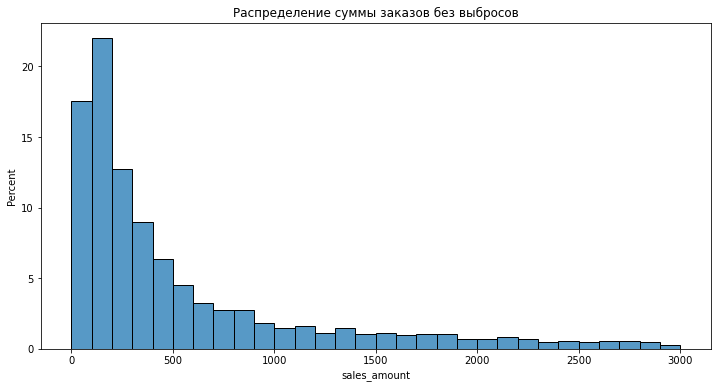

In [109]:
pylab.figure(figsize(12, 6))
plt.title('Распределение суммы заказов без выбросов')
ax=sns.histplot(df1['sales_amount'], stat='percent', binwidth=100)

Видим, что распределение переменной sales_amount не является нормальным. Логарифмирование переменной позволит убрать длинный правый "хвост":

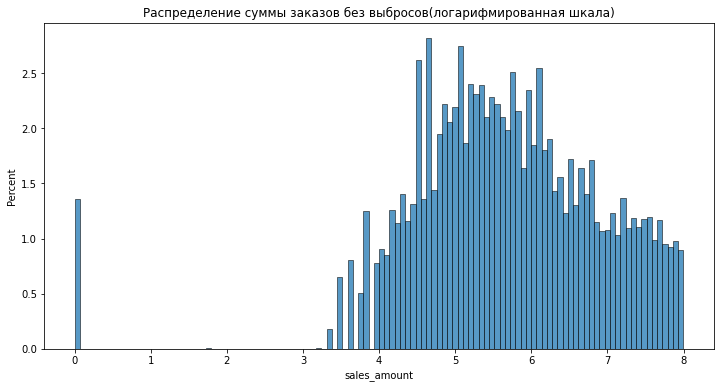

In [110]:
pylab.figure(figsize(12, 6))
plt.title('Распределение суммы заказов без выбросов(логарифмированная шкала)')
ax=sns.histplot(df1['sales_amount'].apply(lambda w: np.log(w + 1)), stat='percent')

In [111]:
df1['log_sales_amount']= df1['sales_amount'].apply(lambda w: np.log(w + 1))

/var/folders/m_/pktzsp9j7d10cx63t_w9_6pr0000gn/T/ipykernel_76663/3219128845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['log_sales_amount']= df1['sales_amount'].apply(lambda w: np.log(w + 1))


### sales_qty

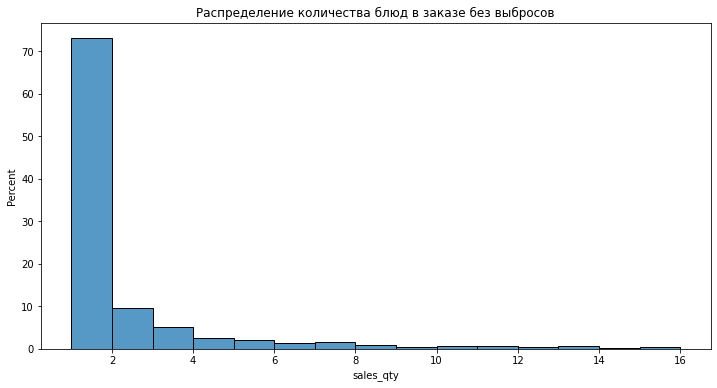

In [112]:
pylab.figure(figsize(12, 6))
plt.title('Распределение количества блюд в заказе без выбросов')
ax=sns.histplot(df1['sales_qty'], stat='percent', binwidth=1)

Видим, что распределение переменной sales_qty также не является нормальным.

### order_date

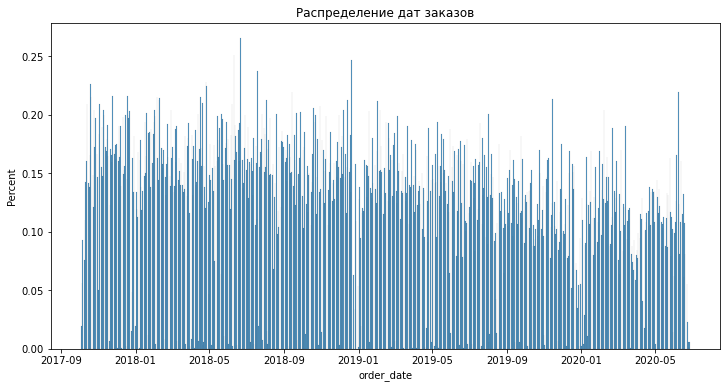

In [113]:
pylab.figure(figsize(12, 6))
plt.title('Распределение дат заказов')
ax=sns.histplot(df1['order_date'], stat='percent')

Первая и последняя дата покупок в датасете:

In [114]:
print(min(df1['order_date']), max(df1['order_date']))

2017-10-04 2020-06-26


Распределение количества заказов по датам не является нормальным согласно тесту Колмогорова-Смирнова:

In [115]:
from scipy.stats import kstest 
kstest(list(df1['order_date'].value_counts()), 'norm',
       args=(mean(list(df1['order_date'].value_counts())), 
             std(list(df1['order_date'].value_counts()),ddof=1)))

KstestResult(statistic=0.10913925584235118, pvalue=1.5141970041560546e-08, statistic_location=136, statistic_sign=-1)

Видно, что в нашем датасете покупок больше всего было сделано в 2018 и 2019 годах, однако нельзя сделать вывод о том, что 2017 и 2020 были неудачными, просто в 2017 отсутствуют данные за первые 3 месяца года, а в 2020 вообще за вторую половину года.

[Text(0, 0, '10.0197'),
 Text(0, 0, '41.5213'),
 Text(0, 0, '34.4296'),
 Text(0, 0, '14.0294')]

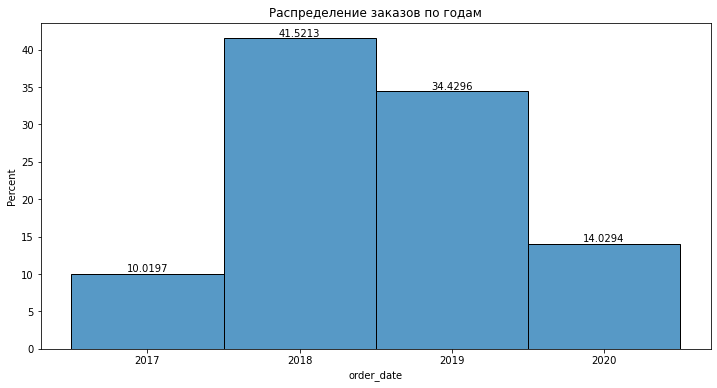

In [116]:
pylab.figure(figsize(12, 6))
plt.title('Распределение заказов по годам')
plt.xticks([2017, 2018, 2019, 2020])
ax=sns.histplot(df1['order_date'].apply(lambda x: x.year), discrete=True, stat='percent')
ax.bar_label (ax.containers [ 0 ])

Видно, что количество заказов распределено близко к равномерному по месяцам. Также заметно, что количество заказов в декабре каждого года сильно проседает по сравнению с предыдущими месяцами того же года: 

[Text(0, 0, '2.90885'),
 Text(0, 0, '3.72811'),
 Text(0, 0, '3.38273'),
 Text(0, 0, '3.56954'),
 Text(0, 0, '3.47112'),
 Text(0, 0, '3.45472'),
 Text(0, 0, '3.41918'),
 Text(0, 0, '3.57227'),
 Text(0, 0, '3.73175'),
 Text(0, 0, '3.64153'),
 Text(0, 0, '3.58594'),
 Text(0, 0, '3.32258'),
 Text(0, 0, '3.53947'),
 Text(0, 0, '3.27428'),
 Text(0, 0, '2.93893'),
 Text(0, 0, '3.1221'),
 Text(0, 0, '3.19682'),
 Text(0, 0, '3.09202'),
 Text(0, 0, '2.90612'),
 Text(0, 0, '3.2196'),
 Text(0, 0, '2.86055'),
 Text(0, 0, '3.2032'),
 Text(0, 0, '2.5334'),
 Text(0, 0, '2.75211'),
 Text(0, 0, '2.78947'),
 Text(0, 0, '2.58443'),
 Text(0, 0, '2.16979'),
 Text(0, 0, '2.5899'),
 Text(0, 0, '2.71292'),
 Text(0, 0, '2.26274'),
 Text(0, 0, '2.31013'),
 Text(0, 0, '2.30922'),
 Text(0, 0, '1.84446')]

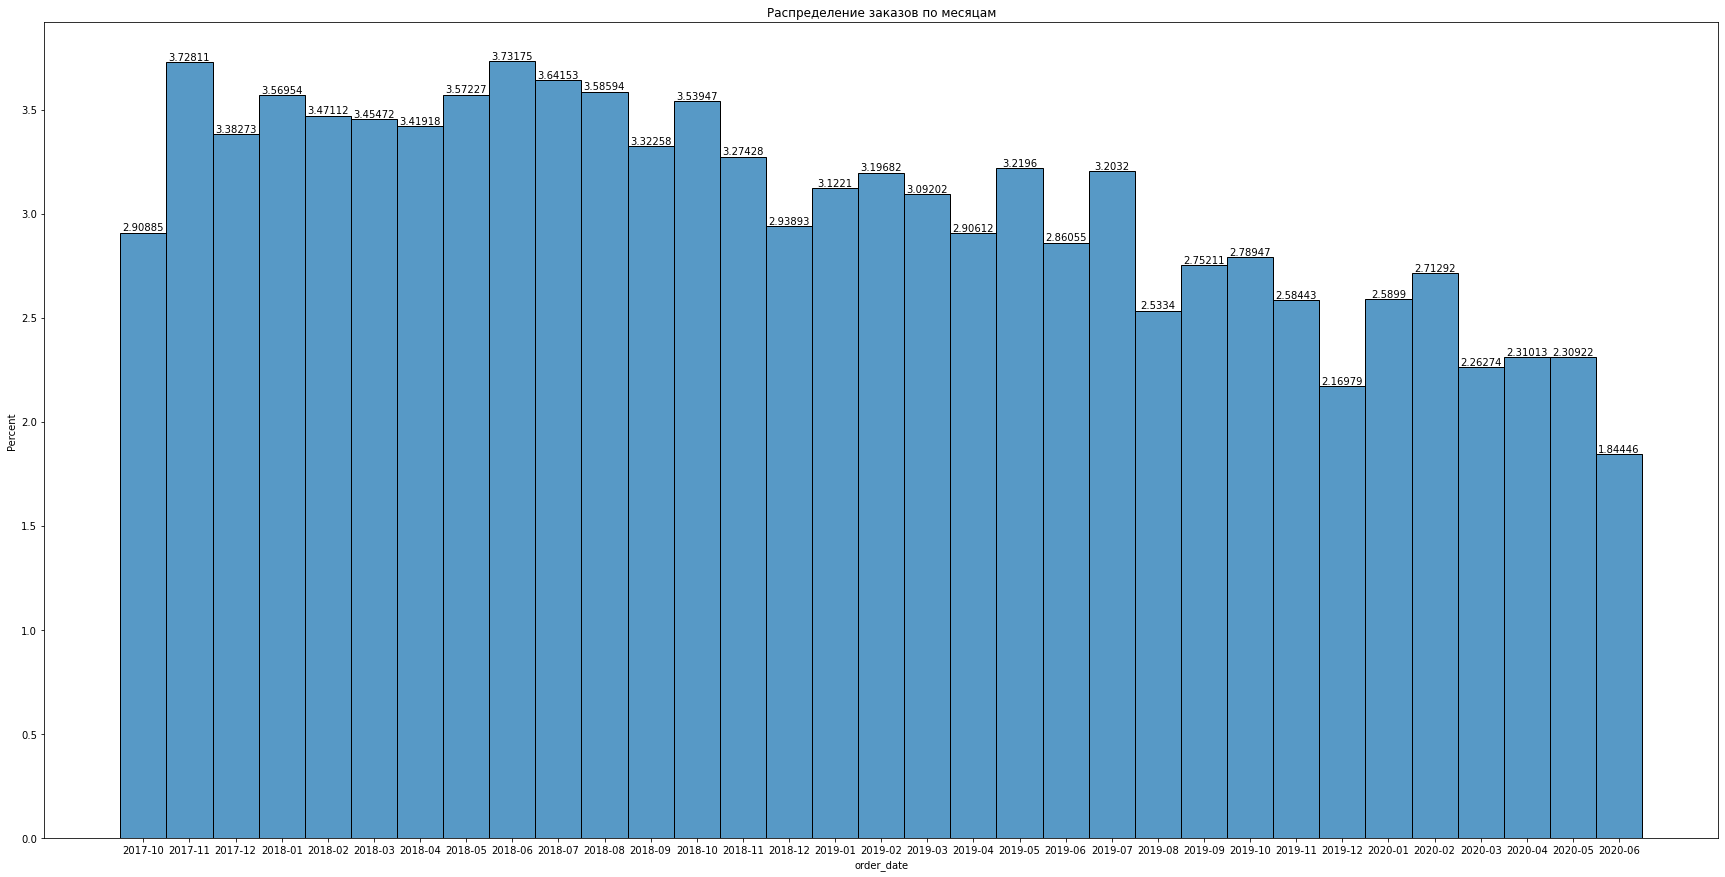

In [117]:
pylab.figure(figsize(30, 15))
plt.title('Распределение заказов по месяцам')
ax=sns.histplot(df1['order_date'].apply(lambda x: x.strftime("%Y-%m")).sort_values(), discrete=True, stat='percent')
ax.bar_label (ax.containers [ 0 ])

Очень информативным оказалось распределение заказов по дням недели: видно, что в выходной день заказов более чем в 50 раз меньше, чем в любой другой будний день:

[Text(0, 0, '18.1612'),
 Text(0, 0, '19.4242'),
 Text(0, 0, '19.16'),
 Text(0, 0, '19.6029'),
 Text(0, 0, '23.2453'),
 Text(0, 0, '0.308018'),
 Text(0, 0, '0.0984198')]

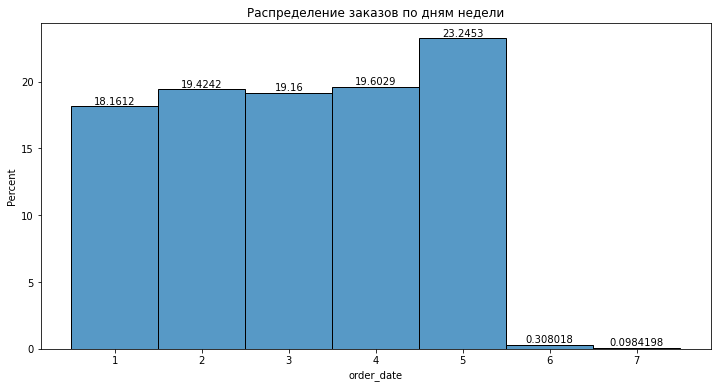

In [118]:
pylab.figure(figsize(12, 6))
plt.title('Распределение заказов по дням недели')
ax=sns.histplot(df1['order_date'].apply(lambda x: x.isoweekday()), discrete=True, stat='percent')
ax.bar_label (ax.containers [ 0 ])

In [119]:
df1['weekday']=df1['order_date'].apply(lambda x: str(x.isoweekday()))

/var/folders/m_/pktzsp9j7d10cx63t_w9_6pr0000gn/T/ipykernel_76663/1598146597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weekday']=df1['order_date'].apply(lambda x: str(x.isoweekday()))


Логарифмированная сумма заказа имеет примерно одинаковую медиану для всех дней, кроме воскресенья. Скорее всего это связано с тем, что у нас всего в районе 100 заказов в воскресенье:

Text(0, 0.5, 'Логарифм суммы заказа')

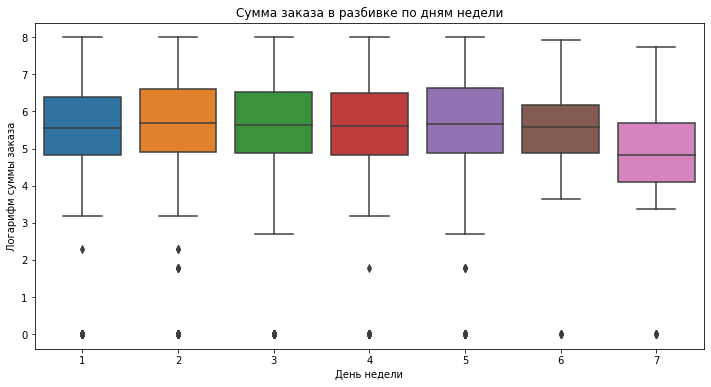

In [120]:
plt.figure(figsize=(12,6))

g = sns.boxplot(x='weekday', 
                y='log_sales_amount', 
                order=['1', '2', '3', '4', '5', '6', '7'],
                data=df1);

g.set_title('Сумма заказа в разбивке по дням недели')
g.set_xlabel('День недели')
g.set_ylabel('Логарифм суммы заказа')

Корреляционная матрица таблицы df1:

<AxesSubplot:>

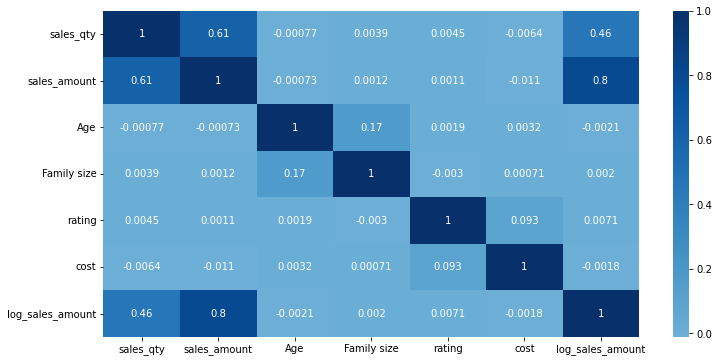

In [121]:
sns.heatmap(df1.corr(), 
            xticklabels=df1.corr().columns, yticklabels=df1.corr().columns, cmap='Blues', center=0, annot=True)

### Линейная регрессия

Построим линейную регрессию, где зависимой переменной будет сумма заказа(sales_amount):

In [122]:
df1_new=df1.drop(['user_id','r_id','name', 'restaurant_name', 'order_date', 'city', 'log_sales_amount'], axis=1)
df1_reg = pd.get_dummies(df1_new, drop_first=True)
df1_reg.head()

sales_qty  sales_amount  Age  Family size  rating    cost  Gender_Male  \
1          1           130   27            6     3.9   250.0            1   
2          1           875   24            3     3.8   100.0            1   
4          2          2676   24            3     3.9  1000.0            1   
5          1           583   22            3     3.7   250.0            1   
7          1            32   28            3     3.9   150.0            1   

   Marital Status_Prefer not to say  Marital Status_Single  \
1                                 0                      0   
2                                 0                      0   
4                                 0                      0   
5                                 0                      1   
7                                 0                      0   

   Occupation_House wife  ...  additional_food_Street Food  \
1                      0  ...                            0   
2                      0  ...                            0   
4                      0  ...                            0   
5                      0  ...                            0   
7                      0  ...                            0   

   additional_food_Sweet  additional_food_Tandoor  additional_food_Thalis  \
1                      0                        0                       0   
2                      0                        0                       0   
4                      0                        0                       0   
5                      0                        0                       0   
7                      0                        0                       0   

   weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  weekday_7  
1          0          0          1          0          0          0  
2          0          0          0          1          0          0  
4          1          0          0          0          0          0  
5          0          1          0          0          0          0  
7          0          0          0          0          0          0  

[5 rows x 95 columns]

In [123]:
cols = df1_reg.columns
cols = [i.replace(' ', '_') for i in cols]
cols = [i.replace('+', '') for i in cols]
cols = [i.replace('.', '_') for i in cols]
df1_reg.columns = cols

df1_reg1 = df1_reg.drop('sales_amount', axis=1)
text = ''
for i in list(df1_reg1.columns):
    text += f'+ {i} '
text = text[1:]
text

' sales_qty + Age + Family_size + rating + cost + Gender_Male + Marital_Status_Prefer_not_to_say + Marital_Status_Single + Occupation_House_wife + Occupation_Self_Employeed + Occupation_Student + Monthly_Income_25001_to_50000 + Monthly_Income_Below_Rs_10000 + Monthly_Income_More_than_50000 + Monthly_Income_No_Income + Educational_Qualifications_Ph_D + Educational_Qualifications_Post_Graduate + Educational_Qualifications_School + Educational_Qualifications_Uneducated + rating_count_10K_ratings + rating_count_1K_ratings + rating_count_20_ratings + rating_count_50_ratings + rating_count_500_ratings + rating_count_5K_ratings + rating_count_Too_Few_Ratings + cuisine_Arabian + cuisine_Asian + cuisine_Bengali + cuisine_Chinese + cuisine_Continental + cuisine_Indian + cuisine_Italian + cuisine_Maharashtrian + cuisine_Mughlai + cuisine_Other + cuisine_Punjabi + food_Beverage + food_Biryani + food_Burger + food_Chaat + food_Combo + food_Dessert + food_Fast_Food + food_Healthy_Food + food_Ice_Cre

Видим, что значимыми на 5% уровне являются коэффициенты: sales_qty, cost, Educational_Qualifications_School, rating_count_1K_ratings, rating_count_Too_Few_Ratings, cuisine_Arabian, cuisine_Bengali, food_Street_Food,    additional_food_Ice_Cream,  additional_food_No, additional_food_Pasta, additional_food_Street_Food, weekday_2,
weekday_3, weekday_4, weekday_5, weekday_7.
Однако модель крайне плохо объясняет зависимую переменную, так как R2=0.374<0.5. Скорее всего это связано с малым количеством числовых переменных, коррелирующих с sales_amount, и с нелинейной зависимостью между объясняющими переменными и зависимой переменной.

In [124]:
ols2 = smf.ols(f'sales_amount ~ {text}', data=df1_reg).fit()
print(ols2.summary())

                            OLS Regression Results                            
Dep. Variable:           sales_amount   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     698.0
Date:                Mon, 07 Aug 2023   Prob (F-statistic):               0.00
Time:                        15:27:02   Log-Likelihood:            -8.3887e+05
No. Observations:              109734   AIC:                         1.678e+06
Df Residuals:                  109639   BIC:                         1.679e+06
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

## Пользователи (users)

In [125]:
users

user_id                name  Age  Gender     Marital Status Occupation  \
0           1     Claire Ferguson   20  Female             Single    Student   
1           2      Jennifer Young   24  Female             Single    Student   
2           3   Jermaine Roberson   22    Male             Single    Student   
3           4    Rachel Carpenter   22  Female             Single    Student   
4           5        Shawn Parker   22    Male             Single    Student   
...       ...                 ...  ...     ...                ...        ...   
99995   99996         James Ellis   23  Female  Prefer not to say   Employee   
99996   99997  Justin Christensen   19    Male             Single    Student   
99997   99998        Mark Collier   21  Female             Single    Student   
99998   99999   Lori Henderson MD   23    Male             Single    Student   
99999  100000      Kathryn Morgan   24  Female             Single   Employee   

       Monthly Income Educational Qualifications  Family size  
0           No Income              Post Graduate            4  
1      Below Rs.10000                   Graduate            3  
2      Below Rs.10000              Post Graduate            3  
3           No Income                   Graduate            6  
4      Below Rs.10000              Post Graduate            4  
...               ...                        ...          ...  
99995  10001 to 25000                   Graduate            4  
99996       No Income                   Graduate            6  
99997       No Income                   Graduate            2  
99998       No Income                   Graduate            4  
99999  25001 to 50000                   Graduate            3  

[100000 rows x 9 columns]

Так как переменные sales_amount и sales_qty являются основными метриками, то на их основе получим три переменных для таблицы users:

    1) Средняя сумма заказов для каждого пользователя (average_sales_amount)
    2) Среднее количество блюд в заказе для каждого пользователя (average_sales_qty)
    3) Количество заказов для каждого пользователя (order_qty)

In [126]:
q=df1.groupby('user_id').agg({'sales_amount':['mean'], 'sales_qty':['mean']}).reset_index()
paying_users=set(q['user_id'])
q=pd.DataFrame(q)
q

user_id sales_amount sales_qty
                      mean      mean
0           1        836.0       2.5
1           2        296.5       1.5
2           4        102.0       1.0
3           6         83.0       1.0
4           8        241.0       1.0
...       ...          ...       ...
66827   99995        727.0       1.5
66828   99996        949.0       1.0
66829   99997        891.5       2.5
66830   99998        875.0       1.0
66831   99999         88.0       1.0

[66832 rows x 3 columns]

In [127]:
q1=df1.groupby(['user_id'])['user_id'].count()
q1=pd.DataFrame(q1)
q1.columns=['count']
q1.reset_index(inplace=True)
q1

user_id  count
0            1      2
1            2      2
2            4      1
3            6      1
4            8      1
...        ...    ...
66827    99995      2
66828    99996      2
66829    99997      2
66830    99998      1
66831    99999      1

[66832 rows x 2 columns]

In [128]:
sales_amount1=[0]*100000
sales_qty1=[0]*100000
order_qty1=[0]*100000
for i in tqdm(range(len(users['user_id']))):
    if users['user_id'][i] in paying_users:
        sales_amount1[i]=round(float(q[q['user_id']==users['user_id'][i]]['sales_amount']['mean']),2)
        sales_qty1[i]=round(float(q[q['user_id']==users['user_id'][i]]['sales_qty']['mean']),2)
        order_qty1[i]=int(q1[q1['user_id']==users['user_id'][i]]['count'])

100%|██████████████████████████████████| 100000/100000 [02:54<00:00, 572.14it/s]


In [129]:
users['average_sales_amount']=sales_amount1
users['average_sales_qty']=sales_qty1
users['order_qty']=order_qty1

Таблица users с новыми переменными:

In [130]:
users

user_id                name  Age  Gender     Marital Status Occupation  \
0           1     Claire Ferguson   20  Female             Single    Student   
1           2      Jennifer Young   24  Female             Single    Student   
2           3   Jermaine Roberson   22    Male             Single    Student   
3           4    Rachel Carpenter   22  Female             Single    Student   
4           5        Shawn Parker   22    Male             Single    Student   
...       ...                 ...  ...     ...                ...        ...   
99995   99996         James Ellis   23  Female  Prefer not to say   Employee   
99996   99997  Justin Christensen   19    Male             Single    Student   
99997   99998        Mark Collier   21  Female             Single    Student   
99998   99999   Lori Henderson MD   23    Male             Single    Student   
99999  100000      Kathryn Morgan   24  Female             Single   Employee   

       Monthly Income Educational Qualifications  Family size  \
0           No Income              Post Graduate            4   
1      Below Rs.10000                   Graduate            3   
2      Below Rs.10000              Post Graduate            3   
3           No Income                   Graduate            6   
4      Below Rs.10000              Post Graduate            4   
...               ...                        ...          ...   
99995  10001 to 25000                   Graduate            4   
99996       No Income                   Graduate            6   
99997       No Income                   Graduate            2   
99998       No Income                   Graduate            4   
99999  25001 to 50000                   Graduate            3   

       average_sales_amount  average_sales_qty  order_qty  
0                     836.0                2.5          2  
1                     296.5                1.5          2  
2                       0.0                0.0          0  
3                     102.0                1.0          1  
4                       0.0                0.0          0  
...                     ...                ...        ...  
99995                 949.0                1.0          2  
99996                 891.5                2.5          2  
99997                 875.0                1.0          1  
99998                  88.0                1.0          1  
99999                   0.0                0.0          0  

[100000 rows x 12 columns]

In [131]:
users.describe()

Age    Family size  average_sales_amount  average_sales_qty  \
count  100000.000000  100000.000000         100000.000000      100000.000000   
mean       24.628580       3.280990            365.541107           1.318797   
std         2.971743       1.349242            519.528455           1.907889   
min        18.000000       1.000000              0.000000           0.000000   
25%        23.000000       2.000000              0.000000           0.000000   
50%        24.000000       3.000000            166.670000           1.000000   
75%        26.000000       4.000000            491.000000           1.330000   
max        33.000000       6.000000           2972.000000          16.000000   

           order_qty  
count  100000.000000  
mean        1.097340  
std         1.041593  
min         0.000000  
25%         0.000000  
50%         1.000000  
75%         2.000000  
max         9.000000

### order_qty

[Text(0, 0, '33.168'),
 Text(0, 0, '36.775'),
 Text(0, 0, '20.324'),
 Text(0, 0, '7.229'),
 Text(0, 0, '1.997'),
 Text(0, 0, '0.421'),
 Text(0, 0, '0.073'),
 Text(0, 0, '0.012'),
 Text(0, 0, '0'),
 Text(0, 0, '0.001')]

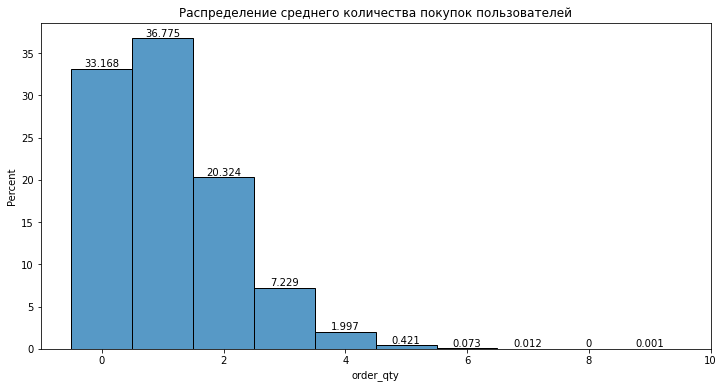

In [132]:
pylab.figure(figsize(12, 6))
plt.title('Распределение среднего количества покупок пользователей')
ax=sns.histplot(users['order_qty'], discrete=True, stat='percent')
ax.bar_label (ax.containers [ 0 ])

Видно, что распределение переменной order_qty не является нормальным.

### average_sales_amount

[Text(0, 0, '59.106'),
 Text(0, 0, '16.265'),
 Text(0, 0, '8.045'),
 Text(0, 0, '5.605'),
 Text(0, 0, '3.516'),
 Text(0, 0, '2.552'),
 Text(0, 0, '1.651'),
 Text(0, 0, '1.021'),
 Text(0, 0, '0.791'),
 Text(0, 0, '0.579'),
 Text(0, 0, '0.479'),
 Text(0, 0, '0.39')]

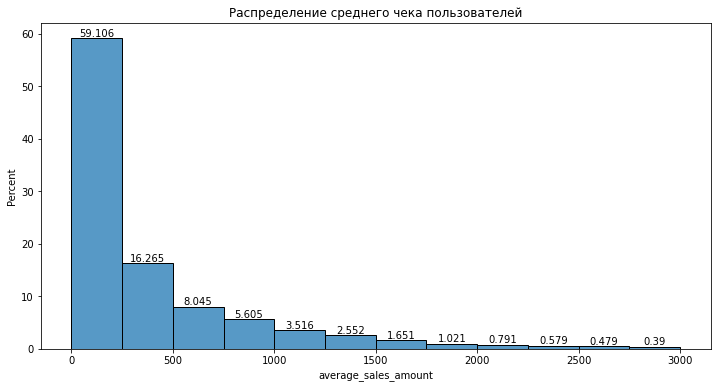

In [133]:
pylab.figure(figsize(12, 6))
plt.title('Распределение среднего чека пользователей')
ax=sns.histplot(users['average_sales_amount'], stat='percent', binwidth=250)
ax.bar_label (ax.containers [ 0 ])

Видно, что распределение переменной average_sales_amount не является нормальным. Логарифмирование переменной позволит убрать длинный правый "хвост". Теперь распределение выглядит близким к нормальному, если исключить пользователей, не сделавших ни одного заказа:

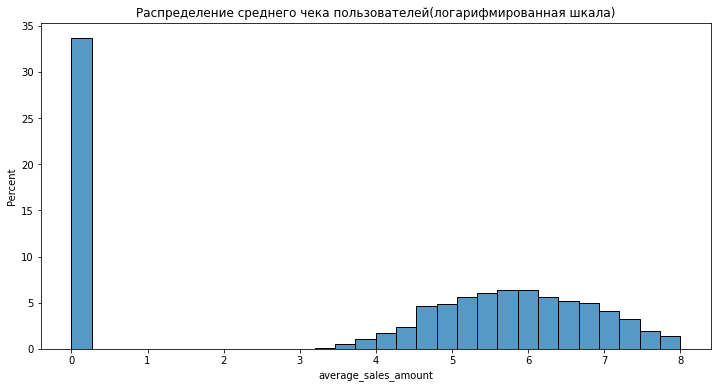

In [134]:
pylab.figure(figsize(12, 6))
plt.title('Распределение среднего чека пользователей(логарифмированная шкала)')
ax=sns.histplot(users['average_sales_amount'].apply(lambda w: np.log(w + 1)), stat='percent')

### average_sales_qty

[Text(0, 0, '33.168'),
 Text(0, 0, '46.804'),
 Text(0, 0, '7.88'),
 Text(0, 0, '4.013'),
 Text(0, 0, '2.449'),
 Text(0, 0, '1.616'),
 Text(0, 0, '1.08'),
 Text(0, 0, '1.04'),
 Text(0, 0, '0.544'),
 Text(0, 0, '0.235'),
 Text(0, 0, '0.248'),
 Text(0, 0, '0.287'),
 Text(0, 0, '0.14'),
 Text(0, 0, '0.291'),
 Text(0, 0, '0.048'),
 Text(0, 0, '0.157')]

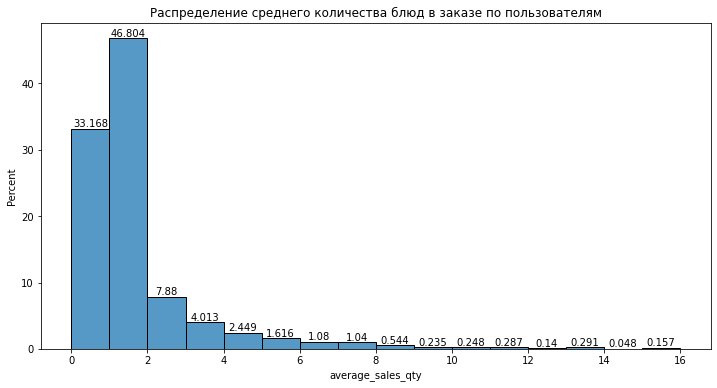

In [135]:
pylab.figure(figsize(12, 6))
plt.title('Распределение среднего количества блюд в заказе по пользователям')
ax=sns.histplot(users['average_sales_qty'], stat='percent', binwidth=1)
ax.bar_label (ax.containers [ 0 ])

Видно, что распределение переменной average_sales_qty не является нормальным.

### Age

[Text(0, 0, '0.258'),
 Text(0, 0, '1.032'),
 Text(0, 0, '2.319'),
 Text(0, 0, '5.927'),
 Text(0, 0, '14.69'),
 Text(0, 0, '18.82'),
 Text(0, 0, '12.888'),
 Text(0, 0, '13.402'),
 Text(0, 0, '9.02'),
 Text(0, 0, '5.411'),
 Text(0, 0, '3.865'),
 Text(0, 0, '3.604'),
 Text(0, 0, '2.32'),
 Text(0, 0, '2.062'),
 Text(0, 0, '4.124'),
 Text(0, 0, '0.258')]

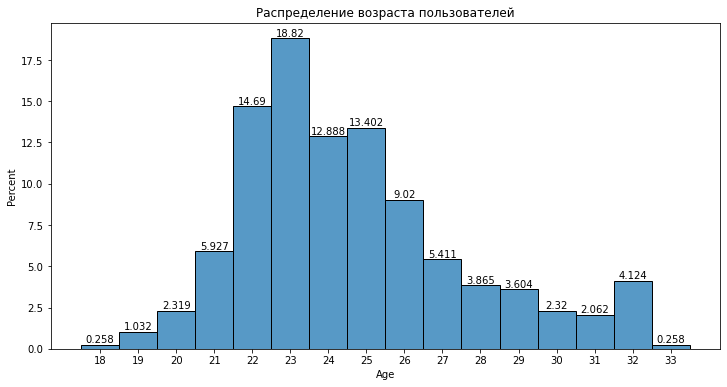

In [136]:
pylab.figure(figsize(12, 6))
plt.title('Распределение возраста пользователей')
plt.xticks(range(min(users['Age']), max(users['Age'])+1))
ax=sns.histplot(users['Age'], discrete=True, stat='percent', binwidth=1)
ax.bar_label (ax.containers [ 0 ])

Посмотрим распределение переменных average_sales_amount, average_sales_qty, order_qty по возрасту пользователя(Age):

In [137]:
d=users.groupby('Age').agg({'average_sales_amount':['median', 'mean', 'std'],
                            'average_sales_qty':['median', 'mean', 'std'],
                           'order_qty':['median', 'mean', 'std']}).reset_index()
d

Age average_sales_amount                         average_sales_qty  \
                     median        mean         std            median   
0   18              208.000  448.010620  595.574221               1.0   
1   19              177.000  357.352326  502.561294               1.0   
2   20              167.000  361.566451  513.848874               1.0   
3   21              159.500  357.753111  516.802035               1.0   
4   22              162.000  366.321494  521.077295               1.0   
5   23              164.000  365.380079  522.023004               1.0   
6   24              167.000  365.099846  510.447974               1.0   
7   25              166.710  360.820607  514.287892               1.0   
8   26              176.000  374.990798  522.434689               1.0   
9   27              164.500  362.814907  517.896911               1.0   
10  28              157.000  363.910818  531.853861               1.0   
11  29              178.250  391.760175  539.495082               1.0   
12  30              154.500  357.278737  515.860326               1.0   
13  31              167.000  372.982415  530.575975               1.0   
14  32              157.500  354.045102  516.796090               1.0   
15  33              144.335  348.584341  506.054695               1.0   

                       order_qty                      
        mean       std    median      mean       std  
0   1.567946  2.345919       1.0  1.174419  1.019558  
1   1.289302  1.744387       1.0  1.158915  1.078823  
2   1.302699  1.914571       1.0  1.068564  1.048870  
3   1.304184  1.938463       1.0  1.085709  1.048476  
4   1.324023  1.928544       1.0  1.085705  1.027337  
5   1.321870  1.924783       1.0  1.088363  1.038963  
6   1.306795  1.865291       1.0  1.109792  1.047993  
7   1.312706  1.888232       1.0  1.110058  1.044659  
8   1.338370  1.922043       1.0  1.115410  1.051446  
9   1.294537  1.854193       1.0  1.100536  1.039276  
10  1.326994  1.955019       1.0  1.071928  1.046537  
11  1.388776  1.953291       1.0  1.126526  1.048942  
12  1.324823  1.955496       1.0  1.081466  1.027774  
13  1.318865  1.832308       1.0  1.093113  1.022816  
14  1.281773  1.877121       1.0  1.080262  1.038716  
15  1.323372  1.884557       1.0  1.058140  1.029011

/Users/sergeyvikulin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


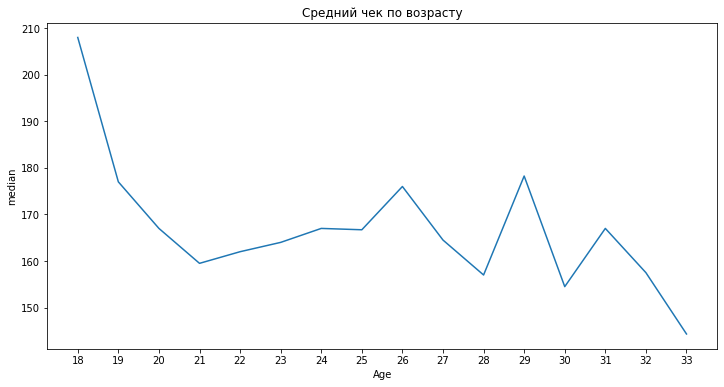

In [138]:
pylab.figure(figsize(12, 6))
plt.title('Средний чек по возрасту')
plt.xticks(range(min(users['Age']), max(users['Age'])+1))
ax=sns.lineplot(d['Age'],d['average_sales_amount']['median'])

Протестируем гипотезу о равенстве средних значений average_sales_amount для групп: 

    1)Пользователи младше 25 лет (включая 25 лет)
    2)Пользователи старше 25 лет

Мы видим, что наши группы независимы, но распределения групп не являются нормальными, поэтому мы не можем применить t-test. Однако для того, чтобы сделать распределения нормальными, воспользуемся бакетным преобразованием:
Разобьем каждую из групп случайным образом на N равных по числу элементов бакетов. Посчитаем средние величины для каждого бакета. Распределения получившихся средних величин будут распределены близко к нормальному по ЦПТ (главное, чтобы количество элементов в каждом бакете превышало 30!). Теперь применим t-test о равенстве средних для бакетов разных групп. Получившийся результат можно обобщить и на первоначальную гипотезу:

In [139]:
kstest(users[users['Age']<=25]['average_sales_amount'], 'norm', 
       args=(users[users['Age']<=25]['average_sales_amount'].mean(),
             users[users['Age']<=25]['average_sales_amount'].std(ddof=1)))

KstestResult(statistic=0.24087222474149278, pvalue=0.0, statistic_location=0.0, statistic_sign=-1)

In [140]:
kstest(users[users['Age']>25]['average_sales_amount'], 'norm', 
       args=(users[users['Age']>25]['average_sales_amount'].mean(),
             users[users['Age']>25]['average_sales_amount'].std(ddof=1)))

KstestResult(statistic=0.2407542706604377, pvalue=0.0, statistic_location=0.0, statistic_sign=-1)

Разбиваем группы случайным образом на 200 бакетов:

In [141]:
from sklearn.model_selection import KFold
y1 = pd.DataFrame(users[users['Age']<=25], columns=users.columns).reset_index(drop=True)
y2 = pd.DataFrame(users[users['Age']>25], columns=users.columns).reset_index(drop=True)
kf1 = KFold(n_splits=200, random_state=42, shuffle=True)
kf2 = KFold(n_splits=200, random_state=42, shuffle=True)
r1 = list(kf1.split(y1))
r2 = list(kf2.split(y2))
s1=[0]*200
s2=[0]*200
for j in range(len(r1)):
    for n in range(len(r1[j][1])):
        s1[j]=s1[j]+float(y1[y1.index==int(r1[j][1][n])]['average_sales_amount'])
for i in range(len(s1)):
    s1[i]=round(s1[i]/len(r1[i][1]),2)
for j in range(len(r2)):
    for n in range(len(r2[j][1])):
        s2[j]=s2[j]+float(y2[y2.index==int(r2[j][1][n])]['average_sales_amount'])
for i in range(len(s2)):
    s2[i]=round(s2[i]/len(r2[i][1]),2)
print('Количество элементов в бакете для users[Age]<=25:', {len(r1[-1][1])})
print('Количество элементов в бакете для users[Age]>25:', {len(r2[-1][1])})

Количество элементов в бакете для users[Age]<=25: {346}
Количество элементов в бакете для users[Age]>25: {153}


Согласно тесту Колмогорова-Смирнова и тесту Шапиро-Уилка нельзя отвергнуть гипотезу на любом разумном уровне значимости о том, что распределение бакетов первой группы является нормальным:

ShapiroResult(statistic=0.9906549453735352, pvalue=0.22227585315704346)
KstestResult(statistic=0.056645242578081345, pvalue=0.5238303948897258, statistic_location=376.68, statistic_sign=1)


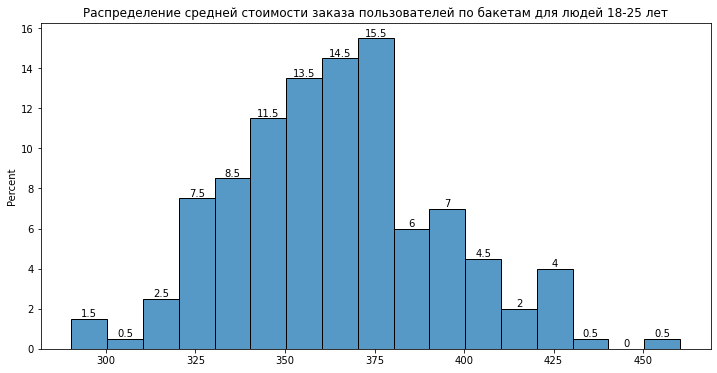

In [142]:
from scipy.stats import shapiro
pylab.figure(figsize(12, 6))
plt.title('Распределение средней стоимости заказа пользователей по бакетам для людей 18-25 лет')
ax=sns.histplot(s1, stat='percent', binwidth=10)
ax.bar_label (ax.containers [ 0 ])
print(shapiro(s1))
print(kstest(s1, 'norm', args=(mean(s1),std(s1,ddof=1))))

Согласно тесту Колмогорова-Смирнова и тесту Шапиро-Уилка нельзя отвергнуть гипотезу на любом разумном уровне значимости о том, что распределение бакетов второй группы является нормальным:

ShapiroResult(statistic=0.9946557283401489, pvalue=0.6989004015922546)
KstestResult(statistic=0.054649619510331204, pvalue=0.5698513611205686, statistic_location=370.09, statistic_sign=1)


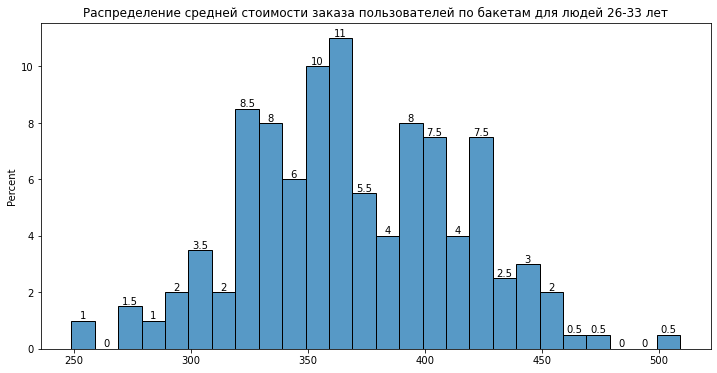

In [143]:
from scipy.stats import shapiro
pylab.figure(figsize(12, 6))
from scipy.stats import shapiro
plt.title('Распределение средней стоимости заказа пользователей по бакетам для людей 26-33 лет')
ax=sns.histplot(s2, stat='percent', binwidth=10)
ax.bar_label (ax.containers [ 0 ])
print(shapiro(s2))
print(kstest(s2, 'norm', args=(mean(s2),std(s2,ddof=1))))

Убедившись в нормальности распределений, проведем t-test о равенстве средних:

In [144]:
from scipy.stats import ttest_ind
ttest_ind(s1,s2)

Ttest_indResult(statistic=-1.2755512929810875, pvalue=0.20285816735201231)

На любом разумном уровне значимости нельзя отвергнуть гипотезу о равенстве средних. Следовательно, равенство средних значений average_sales_amount для групп: 

    1)Пользователи младше 25 лет (включая 25 лет)
    2)Пользователи старше 25 лет
    
**нельзя отвергнуть.**

### Gender

[Text(0, 0, '42.782'), Text(0, 0, '57.218')]

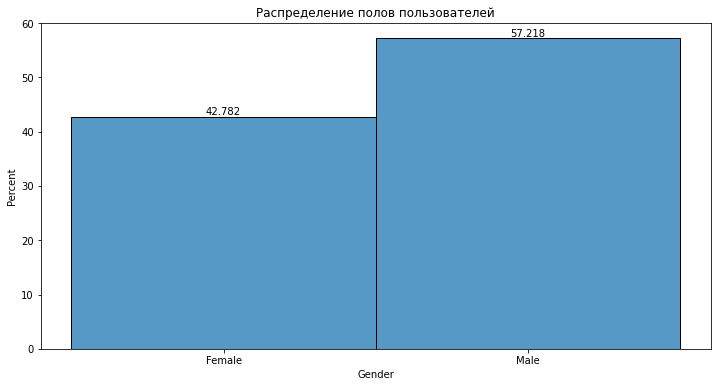

In [145]:
plt.title('Распределение полов пользователей')
ax=sns.histplot(users['Gender'], stat='percent', binwidth=1)
ax.bar_label (ax.containers [ 0 ])

Посмотрим распределение переменных average_sales_amount, average_sales_qty, order_qty по полу пользователя(Gender):

In [146]:
d=users.groupby('Gender').agg({'average_sales_amount':['median', 'mean', 'std'],
                            'average_sales_qty':['median', 'mean', 'std'],
                              'order_qty':['median', 'mean', 'std']}).reset_index()
x1=users[users['Gender']=='Female']['average_sales_amount']
x2=users[users['Gender']=='Male']['average_sales_amount']
d

Gender average_sales_amount                         average_sales_qty  \
                        median        mean         std            median   
0  Female               167.00  368.273942  521.918185               1.0   
1    Male               163.29  363.497760  517.729583               1.0   

                      order_qty                      
       mean       std    median      mean       std  
0  1.322865  1.903067       1.0  1.102800  1.041212  
1  1.315754  1.911498       1.0  1.093257  1.041868

Протестируем гипотезу о равенстве средних значений average_sales_amount для групп: 

    1) Женщины(Female)
    2) Мужчины(Male)

Мы видим, что наши группы независимы, но распределения групп не являются нормальными, поэтому мы не можем применить t-test. Поэтому применим бакетное преобразование.

In [147]:
kstest(users[users['Gender']=='Female']['average_sales_amount'], 'norm', 
       args=(users[users['Gender']=='Female']['average_sales_amount'].mean(),
             users[users['Gender']=='Female']['average_sales_amount'].std(ddof=1)))

KstestResult(statistic=0.24021341407658564, pvalue=0.0, statistic_location=0.0, statistic_sign=-1)

In [148]:
kstest(users[users['Gender']=='Male']['average_sales_amount'], 'norm', 
       args=(users[users['Gender']=='Male']['average_sales_amount'].mean(),
             users[users['Gender']=='Male']['average_sales_amount'].std(ddof=1)))

KstestResult(statistic=0.24130850951227095, pvalue=0.0, statistic_location=0.0, statistic_sign=-1)

Разбиваем группы случайным образом на 200 бакетов:

In [149]:
from sklearn.model_selection import KFold
y1 = pd.DataFrame(users[users['Gender']=='Female'], columns=users.columns).reset_index(drop=True)
y2 = pd.DataFrame(users[users['Gender']=='Male'], columns=users.columns).reset_index(drop=True)
kf1 = KFold(n_splits=200, random_state=45, shuffle=True)
kf2 = KFold(n_splits=200, random_state=45, shuffle=True)
r1 = list(kf1.split(y1))
r2 = list(kf2.split(y2))
s1=[0]*200
s2=[0]*200
for j in range(len(r1)):
    for n in range(len(r1[j][1])):
        s1[j]=s1[j]+float(y1[y1.index==int(r1[j][1][n])]['average_sales_amount'])
for i in range(len(s1)):
    s1[i]=round(s1[i]/len(r1[i][1]),2)
for j in range(len(r2)):
    for n in range(len(r2[j][1])):
        s2[j]=s2[j]+float(y2[y2.index==int(r2[j][1][n])]['average_sales_amount'])
for i in range(len(s2)):
    s2[i]=round(s2[i]/len(r2[i][1]),2)
print('Количество элементов в бакете для users[Gender]=Female', {len(r1[-1][1])})
print('Количество элементов в бакете для users[Gender]=Male', {len(r2[-1][1])})

Количество элементов в бакете для users[Gender]=Female {213}
Количество элементов в бакете для users[Gender]=Male {286}


Согласно тесту Колмогорова-Смирнова и тесту Шапиро-Уилка нельзя отвергнуть гипотезу на любом разумном уровне значимости о том, что распределение бакетов первой группы является нормальным:

ShapiroResult(statistic=0.9905624389648438, pvalue=0.21558284759521484)
KstestResult(statistic=0.044889113301512185, pvalue=0.7979609917335659, statistic_location=338.41, statistic_sign=1)


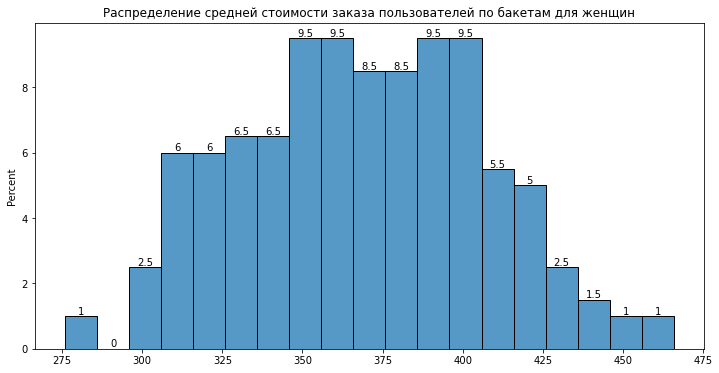

In [150]:
from scipy.stats import shapiro
pylab.figure(figsize(12, 6))
from scipy.stats import shapiro
plt.title('Распределение средней стоимости заказа пользователей по бакетам для женщин')
ax=sns.histplot(s1, stat='percent', binwidth=10)
ax.bar_label (ax.containers [ 0 ])
print(shapiro(s1))
print(kstest(s1, 'norm', args=(mean(s1),std(s1,ddof=1))))

Согласно тесту Колмогорова-Смирнова и тесту Шапиро-Уилка нельзя отвергнуть гипотезу на любом разумном уровне значимости о том, что распределение бакетов второй группы является нормальным:

ShapiroResult(statistic=0.9913708567619324, pvalue=0.2805687487125397)
KstestResult(statistic=0.039584401196438426, pvalue=0.9001569061950172, statistic_location=316.31, statistic_sign=1)


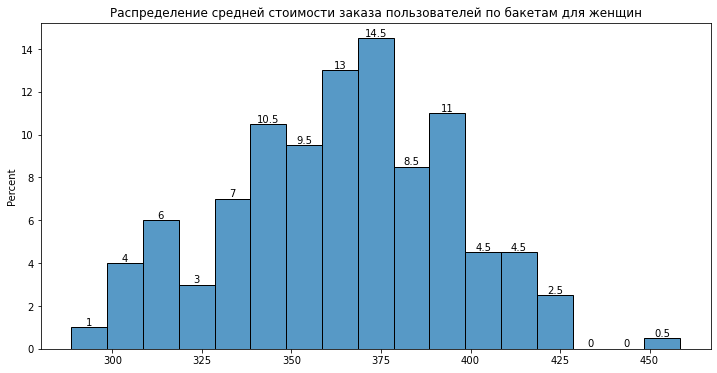

In [151]:
from scipy.stats import shapiro
pylab.figure(figsize(12, 6))
from scipy.stats import shapiro
plt.title('Распределение средней стоимости заказа пользователей по бакетам для женщин')
ax=sns.histplot(s2, stat='percent', binwidth=10)
ax.bar_label (ax.containers [ 0 ])
print(shapiro(s2))
print(kstest(s2, 'norm', args=(mean(s2),std(s2,ddof=1))))

Убедившись в нормальности распределений, проведем t-test о равенстве средних:

In [152]:
from scipy.stats import ttest_ind
ttest_ind(s1,s2)

Ttest_indResult(statistic=1.3759865376046474, pvalue=0.16959956184839434)

На любом разумном уровне значимости нельзя отвергнуть гипотезу о равенстве средних. Следовательно, равенство средних значений average_sales_amount для групп: 

    1) Женщины(Female)
    2) Мужчины(Male)
    
**нельзя отвергнуть.**

### Family size

[Text(0, 0, '6.186'),
 Text(0, 0, '26.026'),
 Text(0, 0, '30.155'),
 Text(0, 0, '16.241'),
 Text(0, 0, '13.92'),
 Text(0, 0, '7.472')]

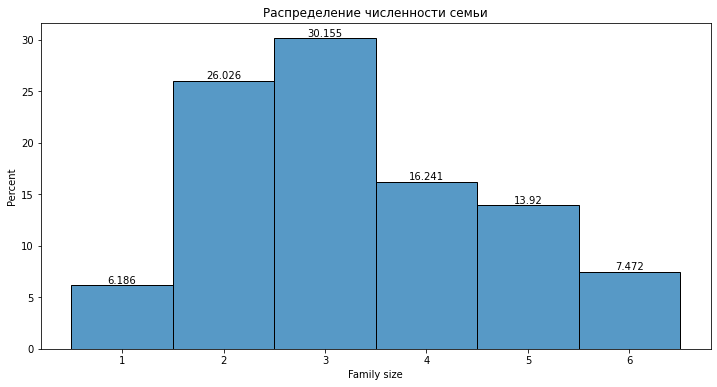

In [153]:
plt.title('Распределение численности семьи')
ax=sns.histplot(users['Family size'], discrete=True, stat='percent', binwidth=1)
ax.bar_label (ax.containers [ 0 ])

Посмотрим распределение переменных average_sales_amount, average_sales_qty, order_qty по размеру семьи пользователя(Family size):

In [154]:
d=users.groupby('Family size').agg({'average_sales_amount':['median', 'mean', 'std'],
                            'average_sales_qty':['median', 'mean', 'std'],
                                   'order_qty':['median', 'mean', 'std']}).reset_index()
d

Family size average_sales_amount                         average_sales_qty  \
                            median        mean         std            median   
0           1               162.00  363.447953  517.346037               1.0   
1           2               167.00  366.343641  521.094051               1.0   
2           3               167.00  361.921576  514.523761               1.0   
3           4               163.67  368.710783  522.440447               1.0   
4           5               167.00  369.002583  521.919994               1.0   
5           6               162.00  365.748009  525.202106               1.0   

                      order_qty                      
       mean       std    median      mean       std  
0  1.298951  1.887010       1.0  1.098771  1.032116  
1  1.319925  1.903953       1.0  1.100092  1.050799  
2  1.304613  1.877223       1.0  1.093119  1.037509  
3  1.331173  1.949463       1.0  1.091189  1.037533  
4  1.338427  1.927696       1.0  1.103161  1.034496  
5  1.325064  1.932992       1.0  1.106130  1.055725

/Users/sergeyvikulin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


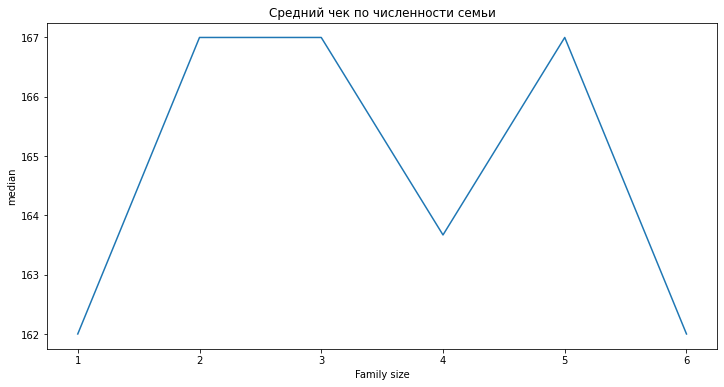

In [155]:
pylab.figure(figsize(12, 6))
plt.title('Средний чек по численности семьи')
ax=sns.lineplot(d['Family size'],d['average_sales_amount']['median'])

Протестируем гипотезу о равенстве средних значений average_sales_amount для групп: 

    1)Пользователи с размером семьи меньшим 3 (включая 3)
    2)Пользователи с размером семьи большим 3

Мы видим, что наши группы независимы, но распределения групп не являются нормальными, поэтому мы не можем применить t-test. Поэтому применим бакетное преобразование.

In [156]:
kstest(users[users['Family size']<=3]['average_sales_amount'], 'norm', 
       args=(users[users['Family size']<=3]['average_sales_amount'].mean(),
             users[users['Family size']<=3]['average_sales_amount'].std(ddof=1)))

KstestResult(statistic=0.2409796484994729, pvalue=0.0, statistic_location=0.0, statistic_sign=-1)

In [157]:
kstest(users[users['Family size']>3]['average_sales_amount'], 'norm', 
       args=(users[users['Family size']>3]['average_sales_amount'].mean(),
             users[users['Family size']>3]['average_sales_amount'].std(ddof=1)))

KstestResult(statistic=0.24060344175484227, pvalue=0.0, statistic_location=0.0, statistic_sign=-1)

Разбиваем группы случайным образом на 200 бакетов:

In [158]:
y1 = pd.DataFrame(users[users['Family size']<=3], columns=users.columns).reset_index(drop=True)
y2 = pd.DataFrame(users[users['Family size']>3], columns=users.columns).reset_index(drop=True)
kf1 = KFold(n_splits=200, random_state=58, shuffle=True)
kf2 = KFold(n_splits=200, random_state=58, shuffle=True)
r1 = list(kf1.split(y1))
r2 = list(kf2.split(y2))
s1=[0]*200
s2=[0]*200
for j in range(len(r1)):
    for n in range(len(r1[j][1])):
        s1[j]=s1[j]+float(y1[y1.index==int(r1[j][1][n])]['average_sales_qty'])
for i in range(len(s1)):
    s1[i]=round(s1[i]/len(r1[i][1]),2)
for j in range(len(r2)):
    for n in range(len(r2[j][1])):
        s2[j]=s2[j]+float(y2[y2.index==int(r2[j][1][n])]['average_sales_qty'])
for i in range(len(s2)):
    s2[i]=round(s2[i]/len(r2[i][1]),2)
print('Количество элементов в бакете для users[Family size]<=3', {len(r1[-1][1])})
print('Количество элементов в бакете для users[Family size]>3', {len(r2[-1][1])})

Количество элементов в бакете для users[Family size]<=3 {311}
Количество элементов в бакете для users[Family size]>3 {188}


Согласно тесту Колмогорова-Смирнова и тесту Шапиро-Уилка нельзя отвергнуть гипотезу на любом разумном уровне значимости о том, что распределение бакетов первой группы является нормальным:

ShapiroResult(statistic=0.9906896948814392, pvalue=0.22483299672603607)
KstestResult(statistic=0.04588293599535642, pvalue=0.7760271210629581, statistic_location=1.21, statistic_sign=1)


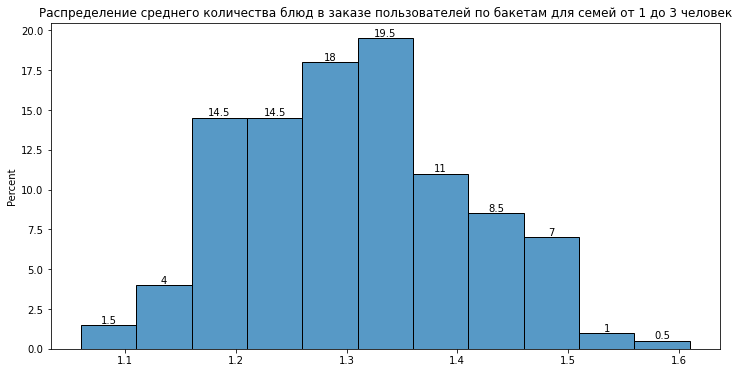

In [159]:
from scipy.stats import shapiro
pylab.figure(figsize(12, 6))
from scipy.stats import shapiro
plt.title('Распределение среднего количества блюд в заказе пользователей по бакетам для семей от 1 до 3 человек')
ax=sns.histplot(s1, stat='percent', binwidth=0.05)
ax.bar_label (ax.containers [ 0 ])
print(shapiro(s1))
print(kstest(s1, 'norm', args=(mean(s1),std(s1,ddof=1))))

Согласно тесту Колмогорова-Смирнова и тесту Шапиро-Уилка нельзя отвергнуть гипотезу на любом разумном уровне значимости о том, что распределение бакетов второй группы является нормальным:

ShapiroResult(statistic=0.9914240837097168, pvalue=0.285382479429245)
KstestResult(statistic=0.05099627680860297, pvalue=0.6564988800561102, statistic_location=1.34, statistic_sign=1)


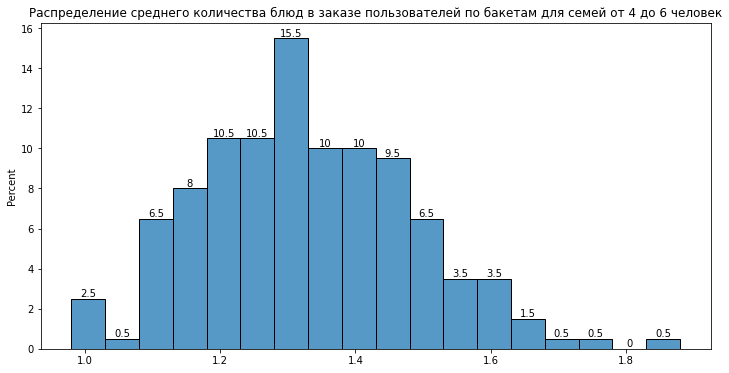

In [160]:
from scipy.stats import shapiro
pylab.figure(figsize(12, 6))
from scipy.stats import shapiro
plt.title('Распределение среднего количества блюд в заказе пользователей по бакетам для семей от 4 до 6 человек')
ax=sns.histplot(s2, stat='percent', binwidth=0.05)
ax.bar_label (ax.containers [ 0 ])
print(shapiro(s2))
print(kstest(s2, 'norm', args=(mean(s2),std(s2,ddof=1))))

Убедившись в нормальности распределений, проведем t-test о равенстве средних:

In [161]:
from scipy.stats import ttest_ind
ttest_ind(s1,s2)

Ttest_indResult(statistic=-1.6548796677669213, pvalue=0.09873721926973879)

На 10% уровне значимости можно отвергнуть гипотезу о равенстве средних. Следовательно, равенство средних значений average_sales_qty для групп: 

    1)Пользователи с размером семьи меньшим 3 (включая 3)
    2)Пользователи с размером семьи большим 3
    
**можно отвергнуть на 10% уровне значимости.**

Построим 90% доверительный интервал для разности средних. Видим, что с 90%-ной вероятностью семьи до 3 человек(включительно) в среднем покупают меньше, чем семьи от 4 до 6 человек, в интервале от 0 до 0.04 блюд в заказе.

In [162]:
diff=mean(s1)-mean(s2)
diff_sd=np.sqrt(var(s1, ddof=1)/200+var(s2, ddof=1)/200)
left, right=st.norm.interval(0.9, loc=diff, scale=diff_sd)
print(f'90% confidence interval: [{left} ; {right}]')

90% confidence interval: [-0.04336822825128443 ; -0.00013177174871589065]


### Occupation

[Text(0, 0, '53.357'),
 Text(0, 0, '30.408'),
 Text(0, 0, '13.913'),
 Text(0, 0, '2.322')]

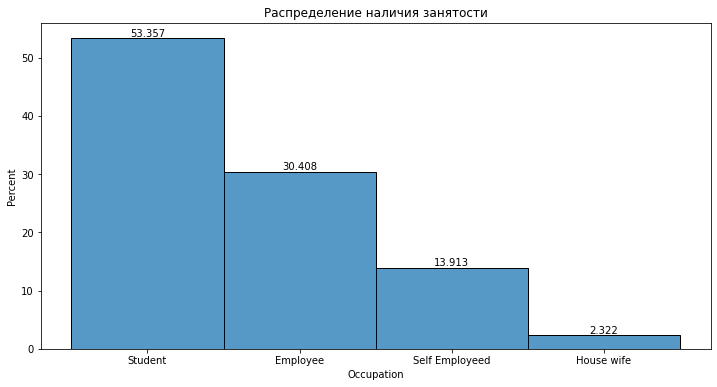

In [163]:
plt.title('Распределение наличия занятости')
ax=sns.histplot(users['Occupation'], discrete=True, stat='percent', binwidth=1)
ax.bar_label (ax.containers [ 0 ])

Посмотрим распределение переменных average_sales_amount, average_sales_qty, order_qty по типу занятости пользователя(Occupation):

In [164]:
d=users.groupby('Occupation').agg({'average_sales_amount':['median', 'mean', 'std'],
                            'average_sales_qty':['median', 'mean', 'std'],
                                  'order_qty':['median', 'mean', 'std']}).reset_index()
d

Occupation average_sales_amount                          \
                                median        mean         std   
0        Employee               167.00  365.484720  518.838115   
1      House wife               171.25  368.705965  530.088229   
2  Self Employeed               167.00  367.509795  520.577383   
3         Student               164.50  364.922170  519.196553   

  average_sales_qty                     order_qty                      
             median      mean       std    median      mean       std  
0               1.0  1.314325  1.891591       1.0  1.100007  1.049360  
1               1.0  1.343407  1.982140       1.0  1.091731  1.020991  
2               1.0  1.320403  1.891253       1.0  1.105944  1.038707  
3               1.0  1.319856  1.918179       1.0  1.093821  1.038796

/Users/sergeyvikulin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


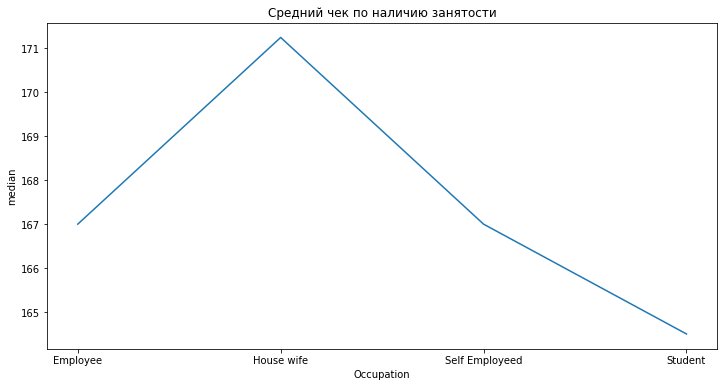

In [165]:
pylab.figure(figsize(12, 6))
plt.title('Средний чек по наличию занятости')
ax=sns.lineplot(d['Occupation'],d['average_sales_amount']['median'])

Протестируем гипотезу о равенстве средних значений average_sales_amount для групп: 

    1) Наемные сотруднки(занятые)
    2) Студенты

Мы видим, что наши группы независимы, но распределения групп не являются нормальными, поэтому мы не можем применить t-test. Поэтому применим бакетное преобразование.

In [166]:
kstest(users[users['Occupation']=='Employee']['average_sales_amount'], 'norm', 
       args=(users[users['Occupation']=='Employee']['average_sales_amount'].mean(),
             users[users['Occupation']=='Employee']['average_sales_amount'].std(ddof=1)))

KstestResult(statistic=0.2405827621870429, pvalue=0.0, statistic_location=0.0, statistic_sign=-1)

In [167]:
kstest(users[users['Occupation']=='Student']['average_sales_amount'], 'norm', 
       args=(users[users['Occupation']=='Student']['average_sales_amount'].mean(),
             users[users['Occupation']=='Student']['average_sales_amount'].std(ddof=1)))

KstestResult(statistic=0.24107169197596573, pvalue=0.0, statistic_location=0.0, statistic_sign=-1)

Разбиваем группы случайным образом на 200 бакетов:

In [168]:
from sklearn.model_selection import KFold
y1 = pd.DataFrame(users[users['Occupation']=='Employee'], columns=users.columns).reset_index(drop=True)
y2 = pd.DataFrame(users[users['Occupation']=='Student'], columns=users.columns).reset_index(drop=True)
kf1 = KFold(n_splits=200, random_state=51, shuffle=True)
kf2 = KFold(n_splits=200, random_state=51, shuffle=True)
r1 = list(kf1.split(y1))
r2 = list(kf2.split(y2))
s1=[0]*200
s2=[0]*200
for j in range(len(r1)):
    for n in range(len(r1[j][1])):
        s1[j]=s1[j]+float(y1[y1.index==int(r1[j][1][n])]['average_sales_amount'])
for i in range(len(s1)):
    s1[i]=round(s1[i]/len(r1[i][1]),2)
for j in range(len(r2)):
    for n in range(len(r2[j][1])):
        s2[j]=s2[j]+float(y2[y2.index==int(r2[j][1][n])]['average_sales_amount'])
for i in range(len(s2)):
    s2[i]=round(s2[i]/len(r2[i][1]),2)
print('Количество элементов в бакете для users[Occupation]=Employee', {len(r1[-1][1])})
print('Количество элементов в бакете для users[Occupation]=Student', {len(r2[-1][1])})

Количество элементов в бакете для users[Occupation]=Employee {152}
Количество элементов в бакете для users[Occupation]=Student {266}


Согласно тесту Колмогорова-Смирнова и тесту Шапиро-Уилка нельзя отвергнуть гипотезу на любом разумном уровне значимости о том, что распределение бакетов первой группы является нормальным:

ShapiroResult(statistic=0.9945717453956604, pvalue=0.6862832903862)
KstestResult(statistic=0.029554997140973094, pvalue=0.9928342934671179, statistic_location=381.38, statistic_sign=1)


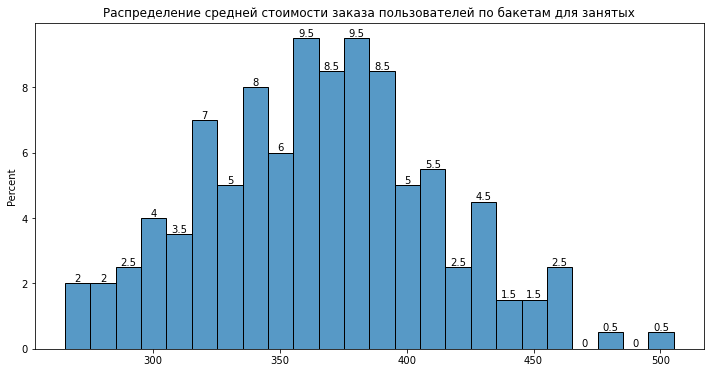

In [169]:
from scipy.stats import shapiro
pylab.figure(figsize(12, 6))
from scipy.stats import shapiro
plt.title('Распределение средней стоимости заказа пользователей по бакетам для занятых')
ax=sns.histplot(s1, stat='percent', binwidth=10)
ax.bar_label (ax.containers [ 0 ])
print(shapiro(s1))
print(kstest(s1, 'norm', args=(mean(s1),std(s1,ddof=1))))

Согласно тесту Колмогорова-Смирнова и тесту Шапиро-Уилка нельзя отвергнуть гипотезу на любом разумном уровне значимости о том, что распределение бакетов второй группы является нормальным:

ShapiroResult(statistic=0.9925459623336792, pvalue=0.4034837484359741)
KstestResult(statistic=0.04392701346192379, pvalue=0.8185230287799585, statistic_location=336.84, statistic_sign=1)


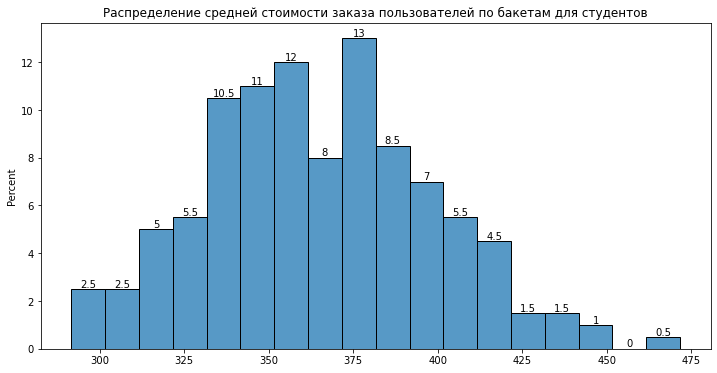

In [170]:
from scipy.stats import shapiro
pylab.figure(figsize(12, 6))
from scipy.stats import shapiro
plt.title('Распределение средней стоимости заказа пользователей по бакетам для студентов')
ax=sns.histplot(s2, stat='percent', binwidth=10)
ax.bar_label (ax.containers [ 0 ])
print(shapiro(s2))
print(kstest(s2, 'norm', args=(mean(s2),std(s2,ddof=1))))

Убедившись в нормальности распределений, проведем t-test о равенстве средних:

In [171]:
from scipy.stats import ttest_ind
ttest_ind(s1,s2)

Ttest_indResult(statistic=0.1399922932683187, pvalue=0.8887368962105751)

На любом разумном уровне значимости нельзя отвергнуть гипотезу о равенстве средних. Следовательно, равенство средних значений average_sales_amount для групп: 

    1) Наемные сотруднки(занятые)
    2) Студенты
    
**нельзя отвергнуть.**

### Monthly Income

[Text(0, 0, '48.204'),
 Text(0, 0, '6.442'),
 Text(0, 0, '11.599'),
 Text(0, 0, '17.779'),
 Text(0, 0, '15.976')]

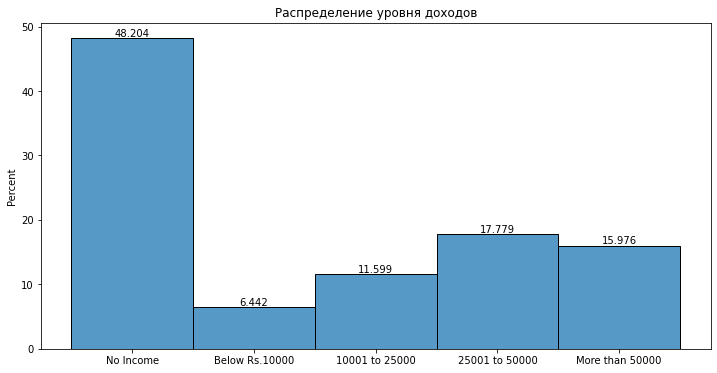

In [172]:
plt.title('Распределение уровня доходов')
income = pd.Categorical(users['Monthly Income'], ['No Income','Below Rs.10000', '10001 to 25000', '25001 to 50000', 'More than 50000'])
ax=sns.histplot(income, discrete=True, stat='percent', binwidth=1)
ax.bar_label (ax.containers [ 0 ])

Посмотрим распределение переменных average_sales_amount, average_sales_qty, order_qty по уровню дохода пользователя(Monthly Income):

In [173]:
d=pd.DataFrame(users.groupby('Monthly Income').agg({'average_sales_amount':['median', 'mean', 'std'],
                            'average_sales_qty':['median', 'mean', 'std'],
                                    'order_qty':['median', 'mean', 'std']}).reset_index())
a = copy(d[0:1])
d[0:1]=d[4:5]
d[4:5]=d[3:4]
d[3:4]=d[1:2]
d[1:2]=d[2:3]
d[2:3] = a
d


Monthly Income average_sales_amount                          \
                                 median        mean         std   
0        No Income               164.00  363.839556  518.359810   
1   Below Rs.10000               169.00  370.136559  520.145652   
2   10001 to 25000               166.67  366.497126  524.557762   
3   25001 to 50000               166.50  369.192486  524.075965   
4  More than 50000               167.00  364.064571  514.052417   

  average_sales_qty                     order_qty                      
             median      mean       std    median      mean       std  
0               1.0  1.318030  1.922120       1.0  1.094453  1.040345  
1               1.0  1.332644  1.891526       1.0  1.104005  1.038037  
2               1.0  1.318157  1.934975       1.0  1.091732  1.041988  
3               1.0  1.308922  1.853445       1.0  1.096518  1.045225  
4               1.0  1.326979  1.911446       1.0  1.108350  1.042491

/Users/sergeyvikulin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


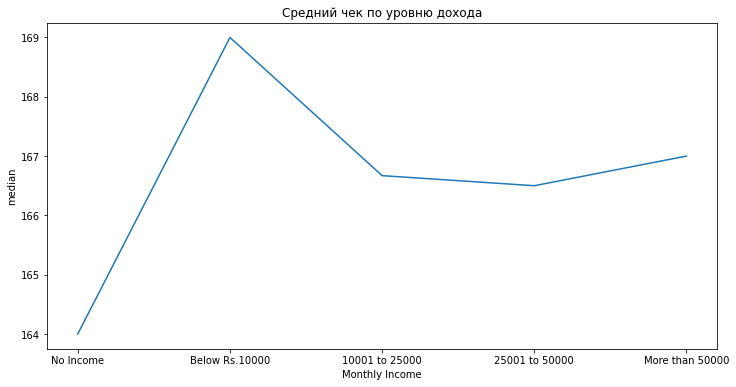

In [174]:
pylab.figure(figsize(12, 6))
plt.title('Средний чек по уровню дохода')
ax=sns.lineplot(d['Monthly Income'],d['average_sales_amount']['median'])

Протестируем гипотезу о равенстве средних значений average_sales_amount для групп: 

    1)Пользователи с отсутствием ежемесячного дохода
    2)Пользователи, у которых есть ежемесячный доход

Мы видим, что наши группы независимы, но распределения групп не являются нормальными, поэтому мы не можем применить t-test. Поэтому применим бакетное преобразование.

In [175]:
kstest(users[users['Monthly Income']=='No Income']['average_sales_amount'], 'norm', 
       args=(users[users['Monthly Income']=='No Income']['average_sales_amount'].mean(),
             users[users['Monthly Income']=='No Income']['average_sales_amount'].std(ddof=1)))

KstestResult(statistic=0.24136907671207275, pvalue=0.0, statistic_location=0.0, statistic_sign=-1)

In [176]:
kstest(users[users['Monthly Income']!='No Income']['average_sales_amount'], 'norm', 
       args=(users[users['Monthly Income']!='No Income']['average_sales_amount'].mean(),
             users[users['Monthly Income']!='No Income']['average_sales_amount'].std(ddof=1)))

KstestResult(statistic=0.240350138832214, pvalue=0.0, statistic_location=0.0, statistic_sign=-1)

Разбиваем группы случайным образом на 200 бакетов:

In [177]:
from sklearn.model_selection import KFold
y1 = pd.DataFrame(users[users['Monthly Income']=='No Income'], columns=users.columns).reset_index(drop=True)
y2 = pd.DataFrame(users[users['Monthly Income']!='No Income'], columns=users.columns).reset_index(drop=True)
kf1 = KFold(n_splits=200, random_state=56, shuffle=True)
kf2 = KFold(n_splits=200, random_state=56, shuffle=True)
r1 = list(kf1.split(y1))
r2 = list(kf2.split(y2))
s1=[0]*200
s2=[0]*200
for j in range(len(r1)):
    for n in range(len(r1[j][1])):
        s1[j]=s1[j]+float(y1[y1.index==int(r1[j][1][n])]['average_sales_amount'])
for i in range(len(s1)):
    s1[i]=round(s1[i]/len(r1[i][1]),2)
for j in range(len(r2)):
    for n in range(len(r2[j][1])):
        s2[j]=s2[j]+float(y2[y2.index==int(r2[j][1][n])]['average_sales_amount'])
for i in range(len(s2)):
    s2[i]=round(s2[i]/len(r2[i][1]),2)
print('Количество элементов в бакете для users[Monthly Income]=No Income', {len(r1[-1][1])})
print('Количество элементов в бакете для users[Monthly Income]!=No Income', {len(r2[-1][1])})

Количество элементов в бакете для users[Monthly Income]=No Income {241}
Количество элементов в бакете для users[Monthly Income]!=No Income {258}


Согласно тесту Колмогорова-Смирнова и тесту Шапиро-Уилка нельзя отвергнуть гипотезу на любом разумном уровне значимости о том, что распределение бакетов первой группы является нормальным:

ShapiroResult(statistic=0.9937919974327087, pvalue=0.5700592994689941)
KstestResult(statistic=0.03631552069924604, pvalue=0.9458776929549456, statistic_location=351.23, statistic_sign=1)


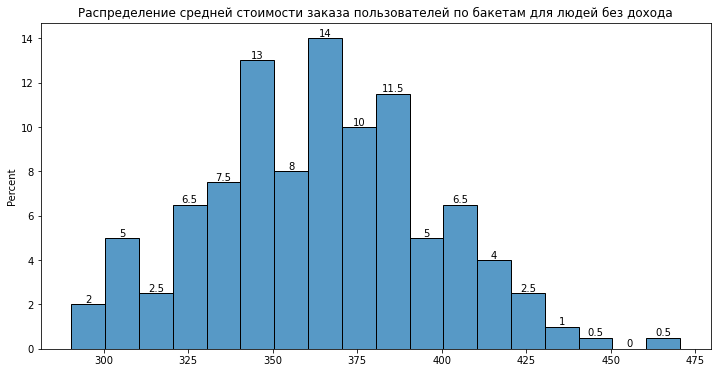

In [178]:
from scipy.stats import shapiro
pylab.figure(figsize(12, 6))
from scipy.stats import shapiro
plt.title('Распределение средней стоимости заказа пользователей по бакетам для людей без дохода')
ax=sns.histplot(s1, stat='percent', binwidth=10)
ax.bar_label (ax.containers [ 0 ])
print(shapiro(s1))
print(kstest(s1, 'norm', args=(mean(s1),std(s1,ddof=1))))

Согласно тесту Колмогорова-Смирнова и тесту Шапиро-Уилка нельзя отвергнуть гипотезу на любом разумном уровне значимости о том, что распределение бакетов второй группы является нормальным:

ShapiroResult(statistic=0.9935641884803772, pvalue=0.5372946858406067)
KstestResult(statistic=0.04388147313392754, pvalue=0.8194780175893425, statistic_location=395.29, statistic_sign=1)


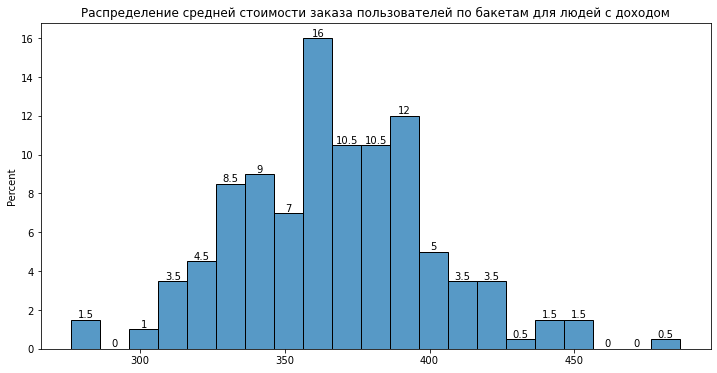

In [179]:
from scipy.stats import shapiro
pylab.figure(figsize(12, 6))
from scipy.stats import shapiro
plt.title('Распределение средней стоимости заказа пользователей по бакетам для людей с доходом')
ax=sns.histplot(s2, stat='percent', binwidth=10)
ax.bar_label (ax.containers [ 0 ])
print(shapiro(s2))
print(kstest(s2, 'norm', args=(mean(s2),std(s2,ddof=1))))

Убедившись в нормальности распределений, проведем t-test о равенстве средних:

In [180]:
from scipy.stats import ttest_ind
ttest_ind(s1,s2)

Ttest_indResult(statistic=-0.9721157860364715, pvalue=0.3315833719410115)

На любом разумном уровне значимости нельзя отвергнуть гипотезу о равенстве средних. Следовательно, равенство средних значений average_sales_amount для групп: 

    1)Пользователи с отсутствием ежемесячного дохода
    2)Пользователи, у которых есть ежемесячный доход
    
**нельзя отвергнуть.**

### Marital Status

[Text(0, 0, '69.077'), Text(0, 0, '27.831'), Text(0, 0, '3.092')]

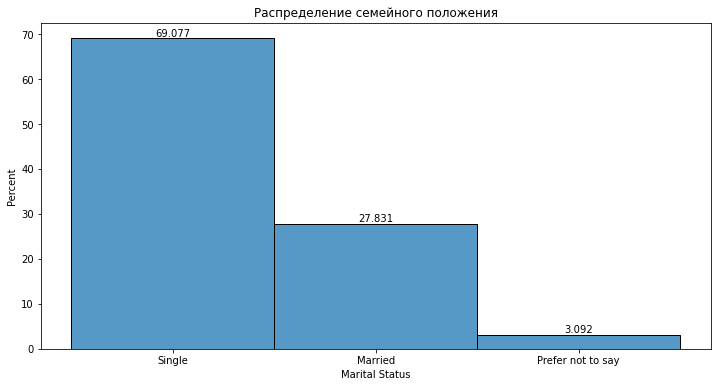

In [181]:
plt.title('Распределение семейного положения')
ax=sns.histplot(users['Marital Status'], discrete=True, stat='percent', binwidth=1)
ax.bar_label (ax.containers [ 0 ])

Посмотрим распределение переменных average_sales_amount, average_sales_qty, order_qty по семейному положению пользователя(Marital Status):

In [182]:
d=users.groupby('Marital Status').agg({'average_sales_amount':['median','mean','std'],
                            'average_sales_qty':['median','mean','std'],
                            'order_qty':['median', 'mean', 'std']}).reset_index()
d

Marital Status average_sales_amount                          \
                                   median        mean         std   
0            Married               167.00  367.435046  522.150209   
1  Prefer not to say               171.25  367.792736  515.438380   
2             Single               166.50  364.677255  518.656275   

  average_sales_qty                     order_qty                      
             median      mean       std    median      mean       std  
0               1.0  1.325641  1.907798       1.0  1.103446  1.043316  
1               1.0  1.296562  1.869311       1.0  1.114166  1.062386  
2               1.0  1.317034  1.909650       1.0  1.094127  1.039954

/Users/sergeyvikulin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


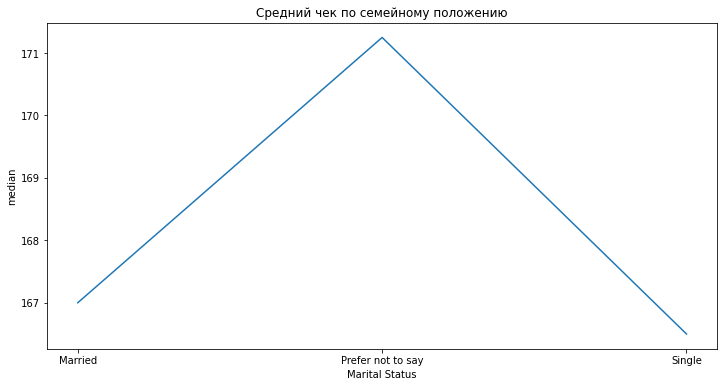

In [183]:
pylab.figure(figsize(12, 6))
plt.title('Средний чек по семейному положению')
ax=sns.lineplot(d['Marital Status'],d['average_sales_amount']['median'])

Протестируем гипотезу о равенстве средних значений average_sales_qty для групп: 

    1)Пользователи в браке
    2)Пользователи не в браке

Мы видим, что наши группы независимы, но распределения групп не являются нормальными, поэтому мы не можем применить t-test. Поэтому применим бакетное преобразование.

In [184]:
kstest(users[users['Marital Status']=='Married']['average_sales_qty'], 'norm', 
       args=(users[users['Marital Status']=='Married']['average_sales_qty'].mean(),
             users[users['Marital Status']=='Married']['average_sales_qty'].std(ddof=1)))

KstestResult(statistic=0.3093490976006889, pvalue=0.0, statistic_location=1.0, statistic_sign=1)

In [185]:
kstest(users[users['Marital Status']=='Single']['average_sales_qty'], 'norm', 
       args=(users[users['Marital Status']=='Single']['average_sales_qty'].mean(),
             users[users['Marital Status']=='Single']['average_sales_qty'].std(ddof=1)))

KstestResult(statistic=0.31083610159566316, pvalue=0.0, statistic_location=1.0, statistic_sign=1)

Разбиваем группы случайным образом на 200 бакетов:

In [186]:
from sklearn.model_selection import KFold
y1 = pd.DataFrame(users[users['Marital Status']=='Married'], columns=users.columns).reset_index(drop=True)
y2 = pd.DataFrame(users[users['Marital Status']=='Single'], columns=users.columns).reset_index(drop=True)
kf1 = KFold(n_splits=200, random_state=66, shuffle=True)
kf2 = KFold(n_splits=200, random_state=66, shuffle=True)
r1 = list(kf1.split(y1))
r2 = list(kf2.split(y2))
s1=[0]*200
s2=[0]*200
for j in range(len(r1)):
    for n in range(len(r1[j][1])):
        s1[j]=s1[j]+float(y1[y1.index==int(r1[j][1][n])]['average_sales_qty'])
for i in range(len(s1)):
    s1[i]=round(s1[i]/len(r1[i][1]),2)
for j in range(len(r2)):
    for n in range(len(r2[j][1])):
        s2[j]=s2[j]+float(y2[y2.index==int(r2[j][1][n])]['average_sales_qty'])
for i in range(len(s2)):
    s2[i]=round(s2[i]/len(r2[i][1]),2)
print('Количество элементов в бакете для users[Marital Status]=Married', {len(r1[-1][1])})
print('Количество элементов в бакете для users[Marital Status]=Single', {len(r2[-1][1])})

Количество элементов в бакете для users[Marital Status]=Married {139}
Количество элементов в бакете для users[Marital Status]=Single {345}


Согласно тесту Колмогорова-Смирнова и тесту Шапиро-Уилка нельзя отвергнуть гипотезу на любом разумном уровне значимости о том, что распределение бакетов первой группы является нормальным:

ShapiroResult(statistic=0.9913792610168457, pvalue=0.2813267111778259)
KstestResult(statistic=0.05640493232147559, pvalue=0.5292979855786857, statistic_location=1.25, statistic_sign=1)


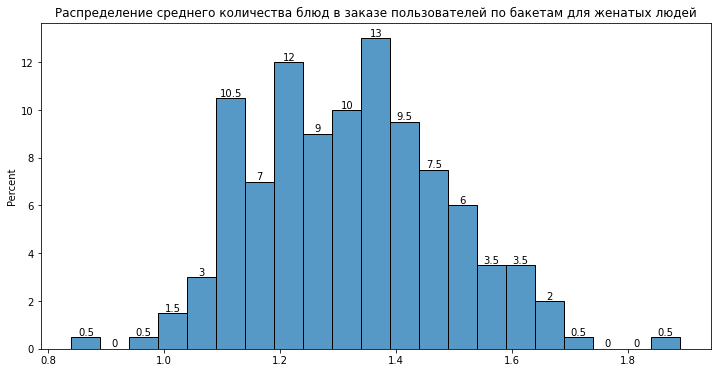

In [187]:
from scipy.stats import shapiro
pylab.figure(figsize(12, 6))
from scipy.stats import shapiro
plt.title('Распределение среднего количества блюд в заказе пользователей по бакетам для женатых людей')
ax=sns.histplot(s1, stat='percent', binwidth=0.05)
ax.bar_label (ax.containers [ 0 ])
print(shapiro(s1))
print(kstest(s1, 'norm', args=(mean(s1),std(s1,ddof=1))))

Согласно тесту Колмогорова-Смирнова и тесту Шапиро-Уилка нельзя отвергнуть гипотезу на любом разумном уровне значимости о том, что распределение бакетов второй группы является нормальным:

ShapiroResult(statistic=0.9906591176986694, pvalue=0.2225802093744278)
KstestResult(statistic=0.05211716855319892, pvalue=0.6297441155629462, statistic_location=1.27, statistic_sign=1)


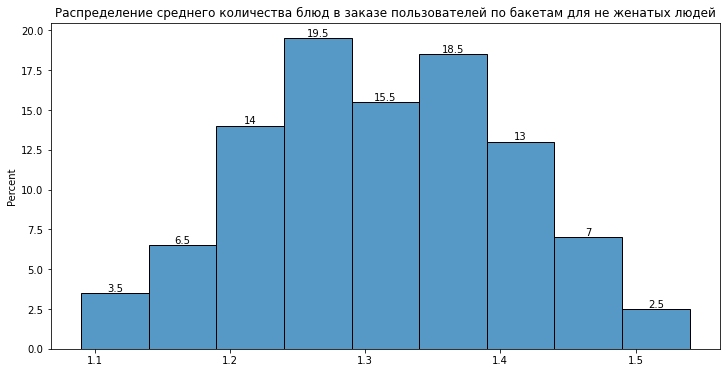

In [188]:
from scipy.stats import shapiro
pylab.figure(figsize(12, 6))
from scipy.stats import shapiro
plt.title('Распределение среднего количества блюд в заказе пользователей по бакетам для не женатых людей')
ax=sns.histplot(s2, stat='percent', binwidth=0.05)
ax.bar_label (ax.containers [ 0 ])
print(shapiro(s2))
print(kstest(s2, 'norm', args=(mean(s2),std(s2,ddof=1))))

Убедившись в нормальности распределений, проведем t-test о равенстве средних:

In [189]:
from scipy.stats import ttest_ind
ttest_ind(s1,s2)

Ttest_indResult(statistic=0.6545839374006517, pvalue=0.5131137592038422)

На любом разумном уровне значимости нельзя отвергнуть гипотезу о равенстве средних. Следовательно, равенство средних значений average_sales_amount для групп: 

    1)Пользователи в браке
    2)Пользователи не в браке
    
**нельзя отвергнуть.**

### Educational Qualifications

[Text(0, 0, '0.516'),
 Text(0, 0, '3.094'),
 Text(0, 0, '45.61'),
 Text(0, 0, '44.852'),
 Text(0, 0, '5.928')]

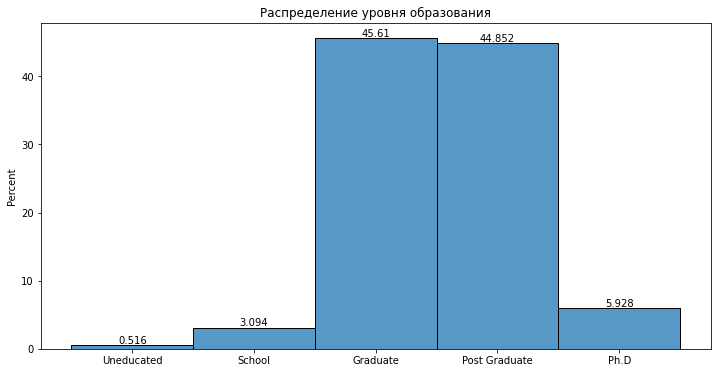

In [190]:
plt.title('Распределение уровня образования')
grades=pd.Categorical(users['Educational Qualifications'],['Uneducated', 'School', 'Graduate', 'Post Graduate','Ph.D'])
ax=sns.histplot(grades, discrete=True, stat='percent', binwidth=1)
ax.bar_label (ax.containers [ 0 ])

Посмотрим распределение переменных average_sales_amount, average_sales_qty, order_qty по уровню образования пользователя(Educational Qualifications):

In [191]:
d=users.groupby('Educational Qualifications').agg({'average_sales_amount':['median', 'mean', 'std'],
                            'average_sales_qty':['median', 'mean', 'std'],
                            'order_qty':['median', 'mean', 'std']}).reset_index()
a = copy(d[0:1])
d[0:1]=d[4:5]
d[4:5]=d[1:2]
d[1:2]=d[3:4]
d[3:4]=d[2:3]
d[2:3] = a
d


Educational Qualifications average_sales_amount                          \
                                           median        mean         std   
0                 Uneducated               160.75  382.000581  567.920335   
1                     School               167.00  353.373649  498.379373   
2                   Graduate               166.50  364.638210  519.595577   
3              Post Graduate               164.50  365.567551  518.674993   
4                       Ph.D               176.00  377.205752  531.675526   

  average_sales_qty                     order_qty                      
             median      mean       std    median      mean       std  
0               1.0  1.380911  1.995631       1.0  1.071705  1.010956  
1               1.0  1.300633  1.857532       1.0  1.103749  1.032560  
2               1.0  1.313831  1.896425       1.0  1.100417  1.047263  
3               1.0  1.317887  1.914244       1.0  1.092304  1.038144  
4               1.0  1.367962  1.964777       1.0  1.110661  1.031265

/Users/sergeyvikulin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


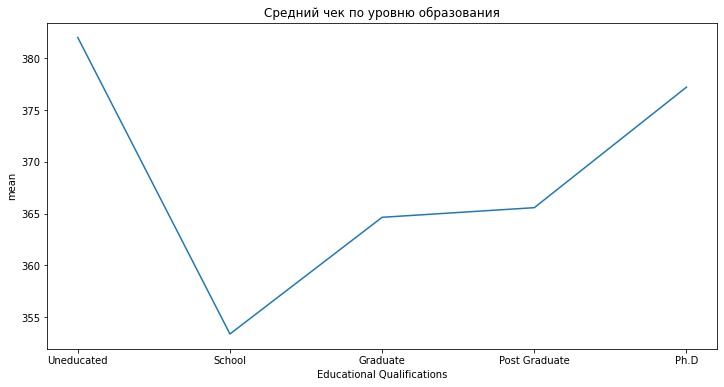

In [192]:
pylab.figure(figsize(12, 6))
plt.title('Средний чек по уровню образования')
ax=sns.lineplot(d['Educational Qualifications'],d['average_sales_amount']['mean'])

Протестируем гипотезу о равенстве средних значений average_sales_amount для групп: 

    1)Пользователи с PhD
    2)Пользователи со средним образованием(окончившие только школу)

Мы видим, что наши группы независимы, но распределения групп не являются нормальными, поэтому мы не можем применить t-test. Поэтому применим бакетное преобразование.

In [193]:
kstest(users[users['Educational Qualifications']=='Ph.D']['average_sales_amount'], 'norm', 
       args=(users[users['Educational Qualifications']=='Ph.D']['average_sales_amount'].mean(),
             users[users['Educational Qualifications']=='Ph.D']['average_sales_amount'].std(ddof=1)))

KstestResult(statistic=0.23901764610176268, pvalue=1.697245880707206e-298, statistic_location=0.0, statistic_sign=-1)

In [194]:
kstest(users[users['Educational Qualifications']=='School']['average_sales_amount'], 'norm', 
       args=(users[users['Educational Qualifications']=='School']['average_sales_amount'].mean(),
             users[users['Educational Qualifications']=='School']['average_sales_amount'].std(ddof=1)))

KstestResult(statistic=0.23914812269023, pvalue=3.3756071770258634e-156, statistic_location=0.0, statistic_sign=-1)

Разбиваем группы случайным образом на 100 бакетов:

In [195]:
from sklearn.model_selection import KFold
y1 = pd.DataFrame(users[users['Educational Qualifications']=='Ph.D'], columns=users.columns).reset_index(drop=True)
y2 = pd.DataFrame(users[users['Educational Qualifications']=='School'], columns=users.columns).reset_index(drop=True)
kf1 = KFold(n_splits=100, random_state=60, shuffle=True)
kf2 = KFold(n_splits=100, random_state=60, shuffle=True)
r1 = list(kf1.split(y1))
r2 = list(kf2.split(y2))
s1=[0]*100
s2=[0]*100
for j in range(len(r1)):
    for n in range(len(r1[j][1])):
        s1[j]=s1[j]+float(y1[y1.index==int(r1[j][1][n])]['average_sales_amount'])
for i in range(len(s1)):
    s1[i]=round(s1[i]/len(r1[i][1]),2)
for j in range(len(r2)):
    for n in range(len(r2[j][1])):
        s2[j]=s2[j]+float(y2[y2.index==int(r2[j][1][n])]['average_sales_amount'])
for i in range(len(s2)):
    s2[i]=round(s2[i]/len(r2[i][1]),2)
print('Количество элементов в бакете для users[Educational Qualifications]=Ph.D', {len(r1[-1][1])})
print('Количество элементов в бакете для users[Educational Qualifications]=School', {len(r2[-1][1])})

Количество элементов в бакете для users[Educational Qualifications]=Ph.D {59}
Количество элементов в бакете для users[Educational Qualifications]=School {30}


   Согласно тесту Колмогорова-Смирнова и тесту Шапиро-Уилка нельзя отвергнуть гипотезу на любом разумном уровне значимости о том, что распределение бакетов первой группы является нормальным:

ShapiroResult(statistic=0.984531819820404, pvalue=0.2936961352825165)
KstestResult(statistic=0.07397071120886436, pvalue=0.6176425465280035, statistic_location=332.84, statistic_sign=-1)


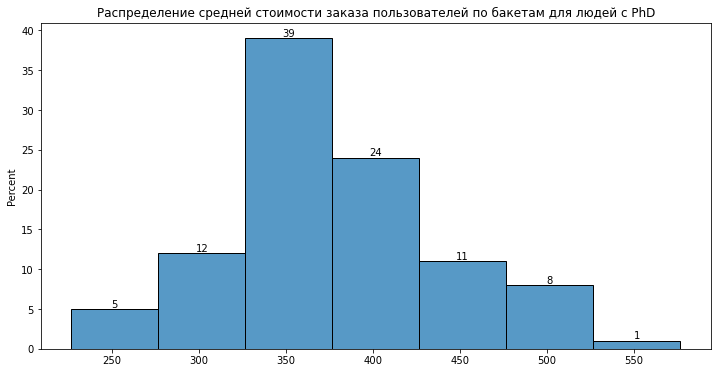

In [196]:
from scipy.stats import shapiro
pylab.figure(figsize(12, 6))
plt.title('Распределение средней стоимости заказа пользователей по бакетам для людей с PhD')
ax=sns.histplot(s1, stat='percent', binwidth=50)
ax.bar_label (ax.containers [ 0 ])
print(shapiro(s1))
print(kstest(s1, 'norm', args=(mean(s1),std(s1,ddof=1))))

Согласно тесту Колмогорова-Смирнова и тесту Шапиро-Уилка нельзя отвергнуть гипотезу на любом разумном уровне значимости о том, что распределение бакетов второй группы является нормальным:

ShapiroResult(statistic=0.9899399280548096, pvalue=0.6597354412078857)
KstestResult(statistic=0.05921929294695544, pvalue=0.8537326669761167, statistic_location=350.92, statistic_sign=-1)


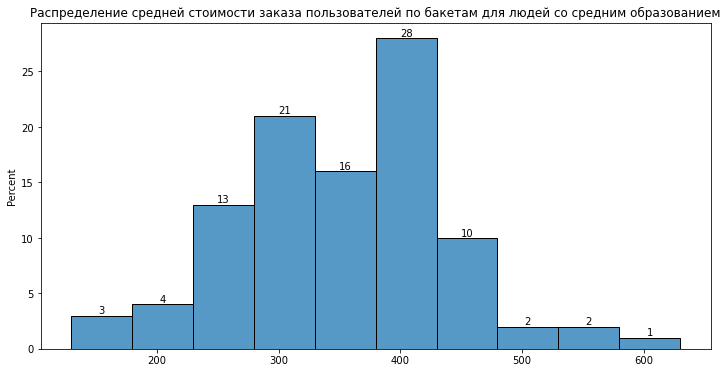

In [197]:
from scipy.stats import shapiro
pylab.figure(figsize(12, 6))
from scipy.stats import shapiro
plt.title('Распределение средней стоимости заказа пользователей по бакетам для людей со средним образованием')
ax=sns.histplot(s2, stat='percent', binwidth=50)
ax.bar_label (ax.containers [ 0 ])
print(shapiro(s2))
print(kstest(s2, 'norm', args=(mean(s2),std(s2,ddof=1))))

Убедившись в нормальности распределений, проведем t-test о равенстве средних:

In [198]:
from scipy.stats import ttest_ind
ttest_ind(s1,s2)

Ttest_indResult(statistic=2.215940845612467, pvalue=0.027834561041090892)

На 5% уровне значимости можно отвергнуть гипотезу о равенстве средних. Следовательно, равенство средних значений average_sales_qty для групп: 

    1)Пользователи с PhD
    2)Пользователи со средним образованием(окончившие только школу)
    
**можно отвергнуть на 5% уровне значимости.**

Построим 95% доверительный интервал для разности средних. Видим, что с 95%-ной вероятностью пользователи с PhD в среднем трятят больше на заказ, чем пользователи со средним образованием, в интервале от 2.77 до 45.1 рупий.

In [199]:
diff=mean(s1)-mean(s2)
diff_sd=np.sqrt(var(s1, ddof=1)/100+var(s2, ddof=1)/100)
left, right=st.norm.interval(0.95, loc=diff, scale=diff_sd)
print(f'95% confidence interval: [{left} ; {right}]')

95% confidence interval: [2.7650513086536357 ; 45.107948691346294]


Посмотрим корреляционную матрицу таблицы users. Видно, что переменные order_qty, average_sales_amount, average_sales_qty положительно коррелируют между собой. Это интуитивно объяснимо тем, что, чем больше количество блюд в заказе, тем больше сумма заказа, и наоборот. Чем больше количество заказов у пользователя, тем более вероятно, что у него будет средний чек, выше медианного, и количество блюд в заказе выше медианного. Также слегка коррелируют переменные age, Family size, это может объясняться тем, что люди маловероятно заведут ребенка в молодом возрасте, соответственно, у них размер семьи будет меньше.

Корреляционная матрица таблицы users:

<AxesSubplot:>

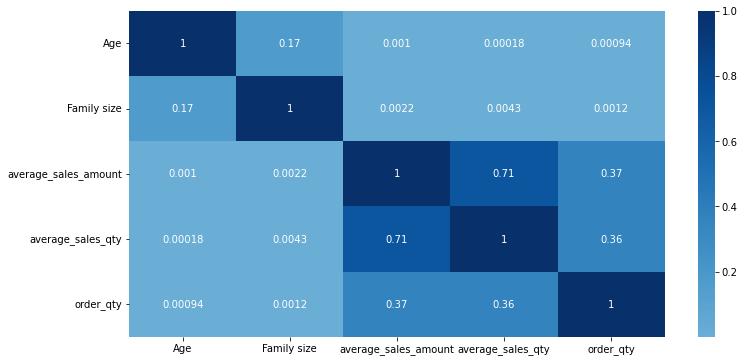

In [200]:
sns.heatmap(users.corr(), 
            xticklabels=users.corr().columns, yticklabels=users.corr().columns, cmap='Blues', center=0, annot=True)

### Сегментация пользователей

Будем сегментировать клиентов, которые сделали хотя бы один заказ, по RFM.

    Recency (Свежесть) - число дней насколько давно пользователь что-то у нас покупал
    Frequency (Частота) - насколько много заказов пользовать сделал
    Monetary (Деньги) - сколько в среднем денег потратил

Клиенты, которые пришли недавно, много и часто покупали - лучшие клиенты.



In [201]:
recency=pd.DataFrame(df1.groupby('user_id').agg({'order_date':['max']}).reset_index())
recency.columns=['user_id', 'order_date']
recency['order_date']=recency['order_date'].apply(lambda x: (datetime.date(2020, 6, 26)-x).days)
recency

user_id  order_date
0            1         590
1            2         693
2            4         506
3            6         623
4            8         371
...        ...         ...
66827    99995         235
66828    99996          15
66829    99997           8
66830    99998         268
66831    99999         365

[66832 rows x 2 columns]

Сегментируем пользователей на 4 группы по каждому из трех параметров, 444-наиболее привлекательный кластер с точки зрения RFM, 111-наименее привлекательный кластер:

In [202]:
rfm=pd.DataFrame({'user_id':q['user_id'], 
                  'recency':recency['order_date'],
                  'frequency': q1['count'],
                  'monetary':q['sales_amount']['mean']})
rfm

user_id  recency  frequency  monetary
0            1      590          2     836.0
1            2      693          2     296.5
2            4      506          1     102.0
3            6      623          1      83.0
4            8      371          1     241.0
...        ...      ...        ...       ...
66827    99995      235          2     727.0
66828    99996       15          2     949.0
66829    99997        8          2     891.5
66830    99998      268          1     875.0
66831    99999      365          1      88.0

[66832 rows x 4 columns]

In [203]:
rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, ['4','3','2','1'])
rfm['f_quartile'] = rfm['frequency']
for i in range(len(rfm)):
    if rfm['f_quartile'][i]>3:
        rfm['f_quartile'][i] = 4
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 4, ['1','2','3','4'])
rfm['RFM_Score'] = rfm.r_quartile.astype(str) + rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm

/var/folders/m_/pktzsp9j7d10cx63t_w9_6pr0000gn/T/ipykernel_76663/1943901737.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['f_quartile'][i] = 4


user_id  recency  frequency  monetary r_quartile  f_quartile  \
0            1      590          2     836.0          2           2   
1            2      693          2     296.5          1           2   
2            4      506          1     102.0          2           1   
3            6      623          1      83.0          2           1   
4            8      371          1     241.0          3           1   
...        ...      ...        ...       ...        ...         ...   
66827    99995      235          2     727.0          3           2   
66828    99996       15          2     949.0          4           2   
66829    99997        8          2     891.5          4           2   
66830    99998      268          1     875.0          3           1   
66831    99999      365          1      88.0          3           1   

      m_quartile RFM_Score  
0              4       224  
1              2       122  
2              1       211  
3              1       211  
4              2       312  
...          ...       ...  
66827          3       323  
66828          4       424  
66829          4       424  
66830          4       314  
66831          1       311  

[66832 rows x 8 columns]

Самые многочисленные кластеры:

In [204]:
rfm['RFM_Score'].value_counts()[:10]

111    4460
112    3298
211    3289
114    3073
113    2679
212    2338
311    2303
214    2017
411    2014
213    1942
Name: RFM_Score, dtype: int64

Визуализация самых многочисленных кластеров:

In [205]:
clusters = rfm['RFM_Score'].value_counts()
big_clusters = clusters[clusters > 1941].index.values
big_clusters

array(['111', '112', '211', '114', '113', '212', '311', '214', '411',
       '213'], dtype=object)

In [206]:
import plotly.express as px

px.scatter_3d(
    rfm[rfm.RFM_Score.isin(big_clusters)],
    x='recency',
    y='frequency',
    z='monetary',
    color='RFM_Score'
)

## Рестораны (restaurant)

In [207]:
restaurant

r_id           restaurant_name      city  rating     rating_count  \
0       567335            AB FOODS POINT    Abohar     3.9  Too Few Ratings   
1       531342         Janta Sweet House    Abohar     4.4      50+ ratings   
2       158203         theka coffee desi    Abohar     3.8     100+ ratings   
3       187912                 Singh Hut    Abohar     3.7      20+ ratings   
4       543530             GRILL MASTERS    Abohar     3.9  Too Few Ratings   
...        ...                       ...       ...     ...              ...   
148536  553122          The Food Delight  Yavatmal     3.9  Too Few Ratings   
148537  562647  MAITRI FOODS & BEVERAGES  Yavatmal     3.9  Too Few Ratings   
148538  559435           Cafe Bella Ciao  Yavatmal     3.9  Too Few Ratings   
148539  418989               GRILL ZILLA  Yavatmal     3.9  Too Few Ratings   
148540  447770            Lazeez kitchen  Yavatmal     3.9  Too Few Ratings   

         cost      cuisine       food additional_cuisine additional_food  
0       200.0        Other   Beverage                 No           Pizza  
1       200.0        Other     Bakery                 No           Sweet  
2       100.0        Other   Beverage                 No              No  
3       250.0       Indian  Fast Food                 No              No  
4       250.0      Italian  Fast Food           American              No  
...       ...          ...        ...                ...             ...  
148536  200.0        Other      Snack                 No       Fast Food  
148537  300.0        Other      Pizza                 No              No  
148538  300.0        Other      Snack                 No       Fast Food  
148539  250.0  Continental      Other                 No              No  
148540  200.0        Other      Pizza                 No              No  

[148541 rows x 10 columns]

Так как переменные sales_amount и sales_qty являются основными метриками, то на их основе получим три переменных для таблицы users:

    1) Средняя сумма заказов для каждого ресторана (average_sales_amount)
    2) Среднее количество блюд в заказе для каждого ресторана (average_sales_qty)
    3) Количество заказов для каждого ресторана (order_qty)

In [208]:
q=df1.groupby('r_id').agg({'sales_amount':['mean'], 'sales_qty':['mean']}).reset_index()
active_restaurant=set(q['r_id'])
q=pd.DataFrame(q)
q

r_id sales_amount sales_qty
                       mean      mean
0          218        537.0       3.0
1          219        972.0       4.0
2          223        171.0       1.0
3          227        764.0       3.0
4          229        588.0       2.0
...        ...          ...       ...
109661  580867       2611.0       5.0
109662  580908          0.0       1.0
109663  580910        574.0       1.0
109664  580940        565.0       1.0
109665  580961        690.0       7.0

[109666 rows x 3 columns]

In [209]:
q1=df1.groupby(['r_id'])['r_id'].count()
q1=pd.DataFrame(q1)
q1.columns=['count']
q1.reset_index(inplace=True)
q1

r_id  count
0          218      1
1          219      1
2          223      1
3          227      1
4          229      1
...        ...    ...
109661  580867      1
109662  580908      1
109663  580910      1
109664  580940      1
109665  580961      1

[109666 rows x 2 columns]

In [210]:
sales_amount2=[0]*148541
sales_qty2=[0]*148541
order_qty2=[0]*148541
for i in tqdm(range(len(restaurant['r_id']))):
    if restaurant['r_id'][i] in active_restaurant:
        sales_amount2[i]=round(float(q[q['r_id']==restaurant['r_id'][i]]['sales_amount']['mean']),2)
        sales_qty2[i]=round(float(q[q['r_id']==restaurant['r_id'][i]]['sales_qty']['mean']),2)
        order_qty2[i]=float(q1[q1['r_id']==restaurant['r_id'][i]]['count'])

100%|██████████████████████████████████| 148541/148541 [05:22<00:00, 461.19it/s]


Таблица restaurant с новыми переменными:

In [211]:
restaurant['average_sales_amount']=sales_amount2
restaurant['average_sales_qty']=sales_qty2
restaurant['order_qty']=order_qty2
restaurant

r_id           restaurant_name      city  rating     rating_count  \
0       567335            AB FOODS POINT    Abohar     3.9  Too Few Ratings   
1       531342         Janta Sweet House    Abohar     4.4      50+ ratings   
2       158203         theka coffee desi    Abohar     3.8     100+ ratings   
3       187912                 Singh Hut    Abohar     3.7      20+ ratings   
4       543530             GRILL MASTERS    Abohar     3.9  Too Few Ratings   
...        ...                       ...       ...     ...              ...   
148536  553122          The Food Delight  Yavatmal     3.9  Too Few Ratings   
148537  562647  MAITRI FOODS & BEVERAGES  Yavatmal     3.9  Too Few Ratings   
148538  559435           Cafe Bella Ciao  Yavatmal     3.9  Too Few Ratings   
148539  418989               GRILL ZILLA  Yavatmal     3.9  Too Few Ratings   
148540  447770            Lazeez kitchen  Yavatmal     3.9  Too Few Ratings   

         cost      cuisine       food additional_cuisine additional_food  \
0       200.0        Other   Beverage                 No           Pizza   
1       200.0        Other     Bakery                 No           Sweet   
2       100.0        Other   Beverage                 No              No   
3       250.0       Indian  Fast Food                 No              No   
4       250.0      Italian  Fast Food           American              No   
...       ...          ...        ...                ...             ...   
148536  200.0        Other      Snack                 No       Fast Food   
148537  300.0        Other      Pizza                 No              No   
148538  300.0        Other      Snack                 No       Fast Food   
148539  250.0  Continental      Other                 No              No   
148540  200.0        Other      Pizza                 No              No   

        average_sales_amount  average_sales_qty  order_qty  
0                        0.0                0.0        0.0  
1                        0.0                0.0        0.0  
2                      875.0                1.0        1.0  
3                      583.0                1.0        1.0  
4                        0.0                0.0        0.0  
...                      ...                ...        ...  
148536                   0.0                0.0        0.0  
148537                1477.0                1.0        1.0  
148538                 708.0                1.0        1.0  
148539                2282.0                1.0        1.0  
148540                   0.0                0.0        0.0  

[148541 rows x 13 columns]

In [212]:
restaurant.describe()

rating           cost  average_sales_amount  average_sales_qty  \
count  148541.000000  148541.000000         148541.000000      148541.000000   
mean        3.897709     287.600714            403.000704           1.455487   
std         0.295893     796.379285            599.028396           2.202891   
min         1.000000       1.000000              0.000000           0.000000   
25%         3.900000     200.000000              0.000000           0.000000   
50%         3.900000     250.000000            162.000000           1.000000   
75%         3.900000     300.000000            468.000000           1.000000   
max         5.000000  300350.000000           2972.000000          16.000000   

           order_qty  
count  148541.000000  
mean        0.738746  
std         0.440361  
min         0.000000  
25%         0.000000  
50%         1.000000  
75%         1.000000  
max         2.000000

Удалим странный выброс в переменной cost :

In [213]:
a=list(restaurant['cost'])
a.sort(reverse=True)
a[:10]

[300350.0,
 8000.0,
 6000.0,
 5023.0,
 5000.0,
 3999.0,
 3500.0,
 3500.0,
 3360.0,
 3200.0]

In [214]:
restaurant=restaurant[restaurant['cost']<300000]
restaurant

r_id           restaurant_name      city  rating     rating_count  \
0       567335            AB FOODS POINT    Abohar     3.9  Too Few Ratings   
1       531342         Janta Sweet House    Abohar     4.4      50+ ratings   
2       158203         theka coffee desi    Abohar     3.8     100+ ratings   
3       187912                 Singh Hut    Abohar     3.7      20+ ratings   
4       543530             GRILL MASTERS    Abohar     3.9  Too Few Ratings   
...        ...                       ...       ...     ...              ...   
148536  553122          The Food Delight  Yavatmal     3.9  Too Few Ratings   
148537  562647  MAITRI FOODS & BEVERAGES  Yavatmal     3.9  Too Few Ratings   
148538  559435           Cafe Bella Ciao  Yavatmal     3.9  Too Few Ratings   
148539  418989               GRILL ZILLA  Yavatmal     3.9  Too Few Ratings   
148540  447770            Lazeez kitchen  Yavatmal     3.9  Too Few Ratings   

         cost      cuisine       food additional_cuisine additional_food  \
0       200.0        Other   Beverage                 No           Pizza   
1       200.0        Other     Bakery                 No           Sweet   
2       100.0        Other   Beverage                 No              No   
3       250.0       Indian  Fast Food                 No              No   
4       250.0      Italian  Fast Food           American              No   
...       ...          ...        ...                ...             ...   
148536  200.0        Other      Snack                 No       Fast Food   
148537  300.0        Other      Pizza                 No              No   
148538  300.0        Other      Snack                 No       Fast Food   
148539  250.0  Continental      Other                 No              No   
148540  200.0        Other      Pizza                 No              No   

        average_sales_amount  average_sales_qty  order_qty  
0                        0.0                0.0        0.0  
1                        0.0                0.0        0.0  
2                      875.0                1.0        1.0  
3                      583.0                1.0        1.0  
4                        0.0                0.0        0.0  
...                      ...                ...        ...  
148536                   0.0                0.0        0.0  
148537                1477.0                1.0        1.0  
148538                 708.0                1.0        1.0  
148539                2282.0                1.0        1.0  
148540                   0.0                0.0        0.0  

[148540 rows x 13 columns]

### order_qty

[Text(0, 0, '26.1707'), Text(0, 0, '73.7835'), Text(0, 0, '0.0457789')]

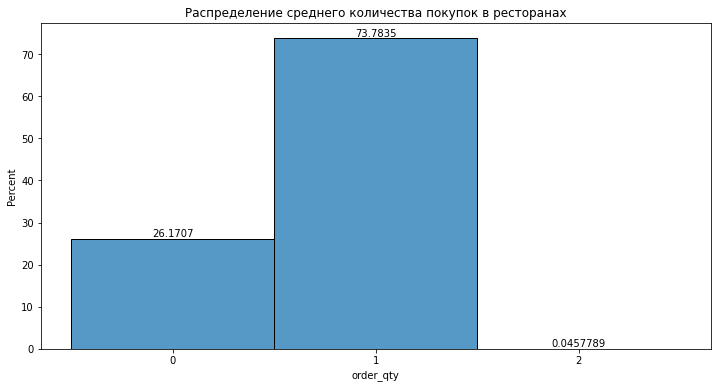

In [215]:
pylab.figure(figsize(12, 6))
plt.title('Распределение среднего количества покупок в ресторанах')
plt.xticks(range(0,3))
ax=sns.histplot(restaurant['order_qty'], discrete=True, stat='percent')
ax.bar_label (ax.containers [ 0 ])

### average_sales_amount

[Text(0, 0, '55.3891'),
 Text(0, 0, '16.0495'),
 Text(0, 0, '8.03689'),
 Text(0, 0, '4.41767'),
 Text(0, 0, '3.37081'),
 Text(0, 0, '2.29972'),
 Text(0, 0, '1.89646'),
 Text(0, 0, '1.63121'),
 Text(0, 0, '1.45954'),
 Text(0, 0, '1.3148'),
 Text(0, 0, '1.10812'),
 Text(0, 0, '0.896728'),
 Text(0, 0, '0.791033'),
 Text(0, 0, '0.78632'),
 Text(0, 0, '0.55204')]

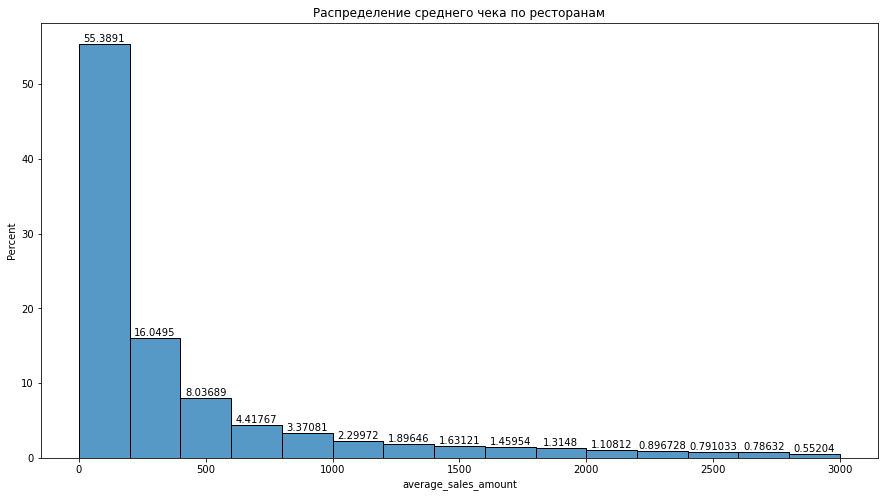

In [216]:
pylab.figure(figsize(15, 8))
plt.title('Распределение среднего чека по ресторанам')
ax=sns.histplot(restaurant['average_sales_amount'], stat='percent', binwidth=200)
ax.bar_label (ax.containers [ 0 ])

Видно, что распределение переменной average_sales_amount не является нормальным. Логарифмирование переменной позволит убрать длинный правый "хвост". Теперь распределение выглядит близким к нормальному, если исключить пользователей, не сделавших ни одного заказа:

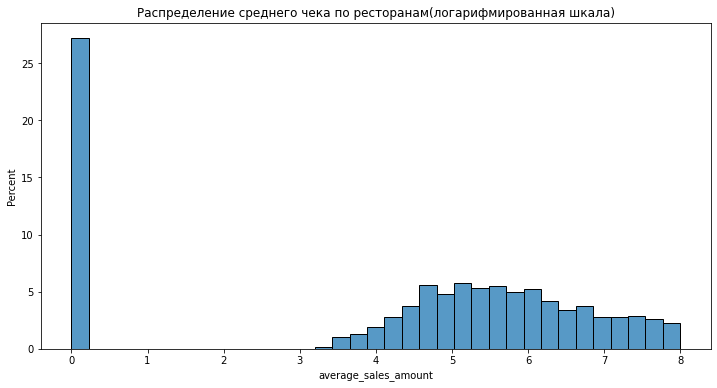

In [217]:
pylab.figure(figsize(12, 6))
plt.title('Распределение среднего чека по ресторанам(логарифмированная шкала)')
ax=sns.histplot(restaurant['average_sales_amount'].apply(lambda w: np.log(w + 1)), stat='percent')

### average_sales_qty

[Text(0, 0, '26.1707'),
 Text(0, 0, '53.9653'),
 Text(0, 0, '7.1745'),
 Text(0, 0, '3.77541'),
 Text(0, 0, '1.84125'),
 Text(0, 0, '1.52619'),
 Text(0, 0, '1.02464'),
 Text(0, 0, '1.23536'),
 Text(0, 0, '0.660428'),
 Text(0, 0, '0.396526'),
 Text(0, 0, '0.440285'),
 Text(0, 0, '0.55002'),
 Text(0, 0, '0.280732'),
 Text(0, 0, '0.550693'),
 Text(0, 0, '0.0854989'),
 Text(0, 0, '0.322472')]

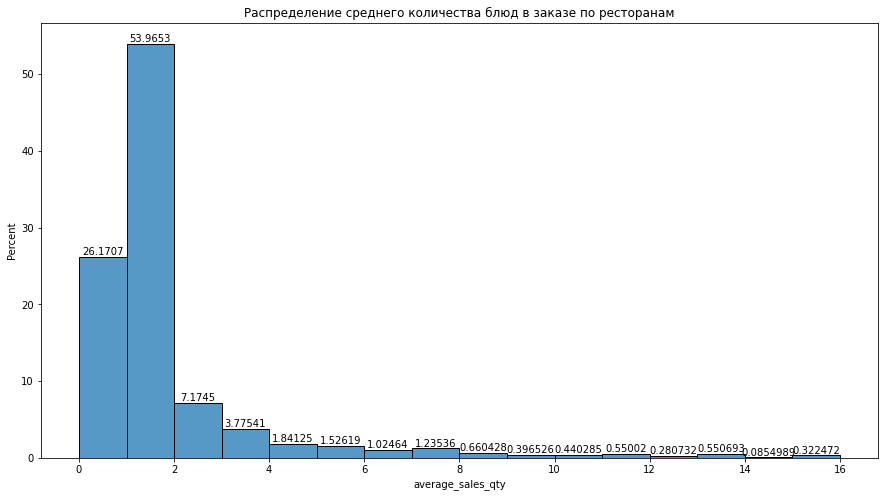

In [218]:
pylab.figure(figsize(15, 8))
plt.title('Распределение среднего количества блюд в заказе по ресторанам')
ax=sns.histplot(restaurant['average_sales_qty'], stat='percent', binwidth=1)
ax.bar_label (ax.containers [ 0 ])

Видно, что распределение переменной average_sales_qty не является нормальным.

### city

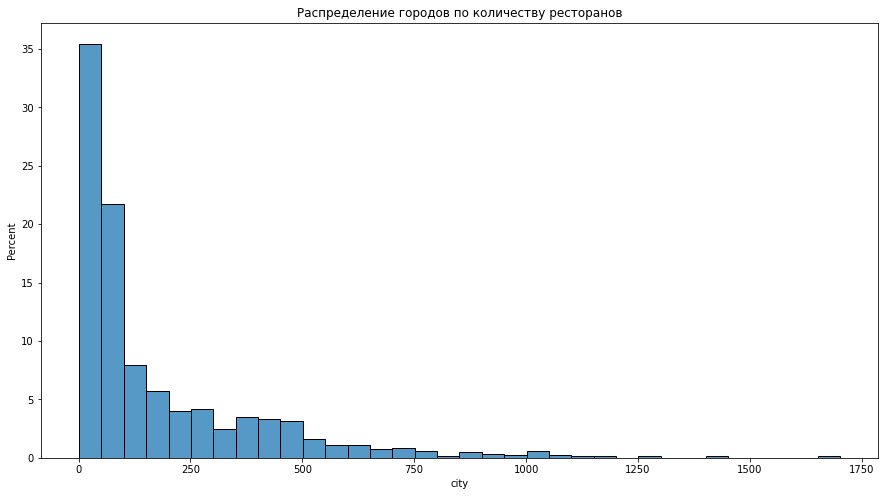

In [219]:
plt.title('Распределение городов по количеству ресторанов')
ax=sns.histplot(restaurant['city'].value_counts(), stat='percent', binwidth=50)

Видно, что распределение количества ресторанов по городам не является нормальным.

Самые распространенные города:

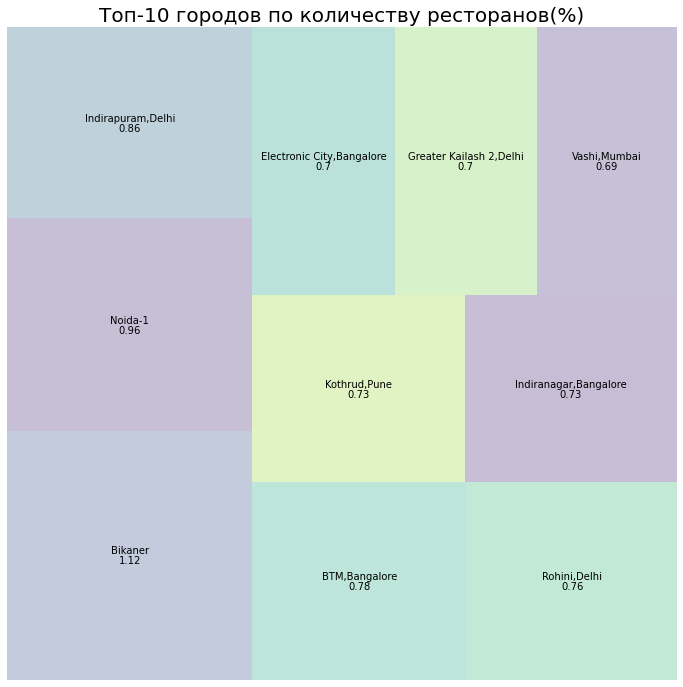

In [220]:
import squarify
city_tree = restaurant['city'].value_counts()
city_tree = round((city_tree[:10] / len(restaurant['city']) * 100),2)

plt.figure(figsize=(12,12))

g = squarify.plot(
    sizes=city_tree.values, 
    label=city_tree.index, 
    value=city_tree.values,
    alpha=.3
)

g.set_title("Топ-10 городов по количеству ресторанов(%)", fontsize=20)
g.set_axis_off();

### rating

[Text(0, 0, '0.0127912'),
 Text(0, 0, '0.0814595'),
 Text(0, 0, '0.315067'),
 Text(0, 0, '1.1438'),
 Text(0, 0, '4.39747'),
 Text(0, 0, '72.9844'),
 Text(0, 0, '18.0483'),
 Text(0, 0, '3.0167')]

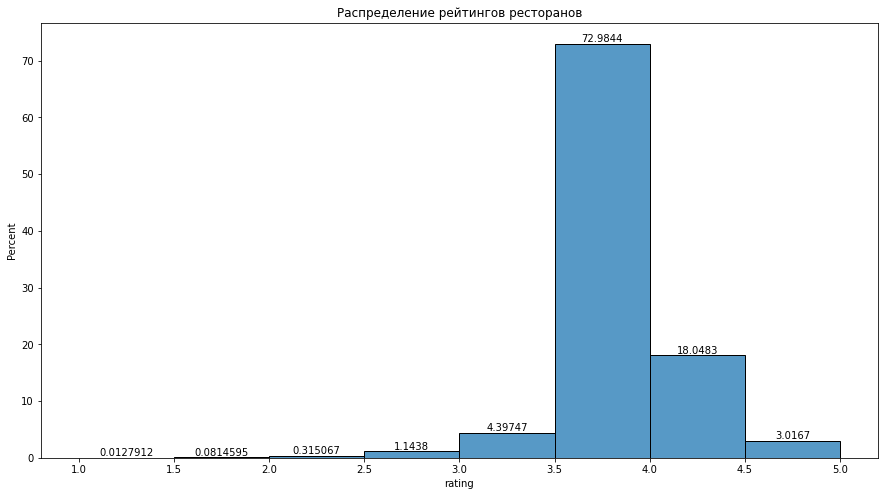

In [221]:
plt.title('Распределение рейтингов ресторанов')
ax=sns.histplot(restaurant['rating'], stat='percent', binwidth=0.5)
ax.bar_label (ax.containers [ 0 ])

Видно, что распределение переменной rating не является нормальным.

Посмотрим распределение переменных average_sales_amount, average_sales_qty, order_qty по рейтингу ресторана(rating):

In [222]:
d=restaurant.groupby('rating').agg({'average_sales_amount':['median', 'mean', 'std'],
                            'average_sales_qty':['median', 'mean', 'std'],
                                   'order_qty':['median', 'mean', 'std']}).reset_index()
d

rating average_sales_amount                           average_sales_qty  \
                        median         mean          std            median   
0     1.0               2264.0  2264.000000          NaN               7.0   
1     1.1                194.0   194.000000          NaN               1.0   
2     1.2                162.0   667.750000  1129.870900               3.0   
3     1.3                  0.0   298.000000   516.151141               0.0   
4     1.4                396.0   741.700000   758.366380               1.0   
5     1.5                139.0   682.333333  1043.435446               1.0   
6     1.6                236.0   322.411765   414.088315               1.0   
7     1.7                106.0   254.846154   496.252598               1.0   
8     1.8                245.0   541.407407   701.769317               1.0   
9     1.9                176.0   262.543478   295.138288               1.0   
10    2.0                113.5   282.444444   480.065896               1.0   
11    2.1                 97.0   241.409836   403.421673               1.0   
12    2.2                144.0   327.303371   588.480891               1.0   
13    2.3                106.0   314.867188   494.198474               1.0   
14    2.4                185.0   415.415254   594.387285               1.0   
15    2.5                144.0   407.891403   592.274212               1.0   
16    2.6                148.0   362.740385   538.874386               1.0   
17    2.7                134.0   456.981538   694.409692               1.0   
18    2.8                157.0   398.788584   601.135146               1.0   
19    2.9                150.5   395.730932   572.443815               1.0   
20    3.0                148.0   414.174622   627.699977               1.0   
21    3.1                153.0   430.556890   638.973406               1.0   
22    3.2                148.0   382.754576   581.905885               1.0   
23    3.3                153.0   404.542476   606.411481               1.0   
24    3.4                153.0   401.103246   599.912957               1.0   
25    3.5                157.0   402.728653   596.641194               1.0   
26    3.6                153.0   406.175726   610.433542               1.0   
27    3.7                162.0   415.344345   614.739423               1.0   
28    3.8                162.0   415.035826   618.136887               1.0   
29    3.9                162.0   396.835531   591.911515               1.0   
30    4.0                162.0   416.926439   621.842322               1.0   
31    4.1                167.0   415.179161   608.326081               1.0   
32    4.2                162.0   419.304930   618.345927               1.0   
33    4.3                171.0   420.280483   608.001883               1.0   
34    4.4                181.0   425.088282   610.636131               1.0   
35    4.5                167.0   416.748594   604.487604               1.0   
36    4.6                176.0   405.803598   583.078894               1.0   
37    4.7                159.5   418.504630   621.436005               1.0   
38    4.8                187.5   371.514793   512.210820               1.0   
39    4.9                125.0   389.551724   580.733615               1.0   
40    5.0                185.0   480.253589   701.142329               1.0   

                       order_qty                      
        mean       std    median      mean       std  
0   7.000000       NaN       1.0  1.000000       NaN  
1   1.000000       NaN       1.0  1.000000       NaN  
2   3.250000  3.774917       0.5  0.500000  0.577350  
3   1.333333  2.309401       0.0  0.333333  0.577350  
4   3.400000  4.812022       1.0  0.900000  0.316228  
5   2.055556  2.979779       1.0  0.833333  0.383482  
6   1.823529  2.068674       1.0  0.705882  0.469668  
7   1.615385  3.150092       1.0  0.769231  0.438529  
8   2.037037  2.295170       1.0  0.888889  0.320256  
9   0.978261  0.977278       1.0  0.717391 

/Users/sergeyvikulin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



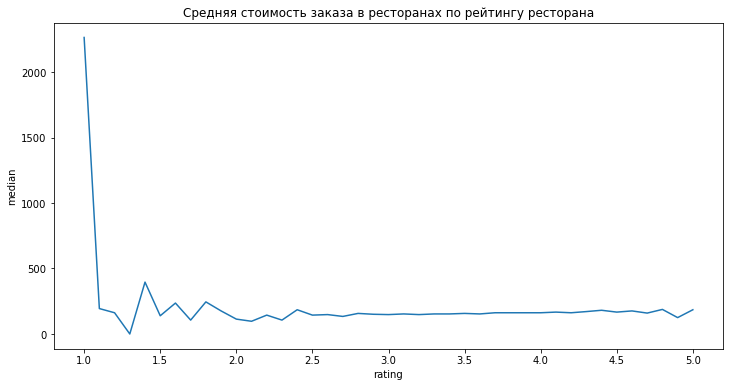

In [223]:
pylab.figure(figsize(12, 6))
plt.title('Средняя стоимость заказа в ресторанах по рейтингу ресторана')
ax=sns.lineplot(d['rating'],d['average_sales_amount']['median'])

Протестируем гипотезу о равенстве средних значений average_sales_amount для групп: 

    1)Рестораны с рейтингом меньше 3.9
    2)Рестораны с рейтингом больше 3.9

Мы видим, что наши группы независимы, но распределения групп не являются нормальными, поэтому мы не можем применить t-test. Поэтому применим бакетное преобразование.

In [224]:
kstest(restaurant[restaurant['rating']<3.9]['average_sales_amount'], 'norm', 
       args=(restaurant[restaurant['rating']<3.9]['average_sales_amount'].mean(),
             restaurant[restaurant['rating']<3.9]['average_sales_amount'].std(ddof=1)))

KstestResult(statistic=0.2516524521387442, pvalue=0.0, statistic_location=0.0, statistic_sign=-1)

In [225]:
kstest(restaurant[restaurant['rating']>3.9]['average_sales_amount'], 'norm', 
       args=(restaurant[restaurant['rating']>3.9]['average_sales_amount'].mean(),
             restaurant[restaurant['rating']>3.9]['average_sales_amount'].std(ddof=1)))

KstestResult(statistic=0.24736681387103793, pvalue=0.0, statistic_location=0.0, statistic_sign=-1)

Разбиваем группы случайным образом на 200 бакетов:

In [226]:
from sklearn.model_selection import KFold
y1 = pd.DataFrame(restaurant[restaurant['rating']<3.9], columns=restaurant.columns).reset_index(drop=True)
y2 = pd.DataFrame(restaurant[restaurant['rating']>3.9], columns=restaurant.columns).reset_index(drop=True)
kf1 = KFold(n_splits=200, random_state=72, shuffle=True)
kf2 = KFold(n_splits=200, random_state=72, shuffle=True)
r1 = list(kf1.split(y1))
r2 = list(kf2.split(y2))
s1=[0]*200
s2=[0]*200
for j in range(len(r1)):
    for n in range(len(r1[j][1])):
        s1[j]=s1[j]+float(y1[y1.index==int(r1[j][1][n])]['average_sales_amount'])
for i in range(len(s1)):
    s1[i]=round(s1[i]/len(r1[i][1]),2)
for j in range(len(r2)):
    for n in range(len(r2[j][1])):
        s2[j]=s2[j]+float(y2[y2.index==int(r2[j][1][n])]['average_sales_amount'])
for i in range(len(s2)):
    s2[i]=round(s2[i]/len(r2[i][1]),2)
print('Количество элементов в бакете для restaurant[rating]<3.9', {len(r1[-1][1])})
print('Количество элементов в бакете для restaurant[rating]>3.9', {len(r2[-1][1])})

Количество элементов в бакете для restaurant[rating]<3.9 {123}
Количество элементов в бакете для restaurant[rating]>3.9 {156}


Согласно тесту Колмогорова-Смирнова и тесту Шапиро-Уилка нельзя отвергнуть гипотезу на любом разумном уровне значимости о том, что распределение бакетов первой группы является нормальным:

ShapiroResult(statistic=0.9966056942939758, pvalue=0.9412864446640015)
KstestResult(statistic=0.04512782836189799, pvalue=0.7927523148048989, statistic_location=379.35, statistic_sign=1)


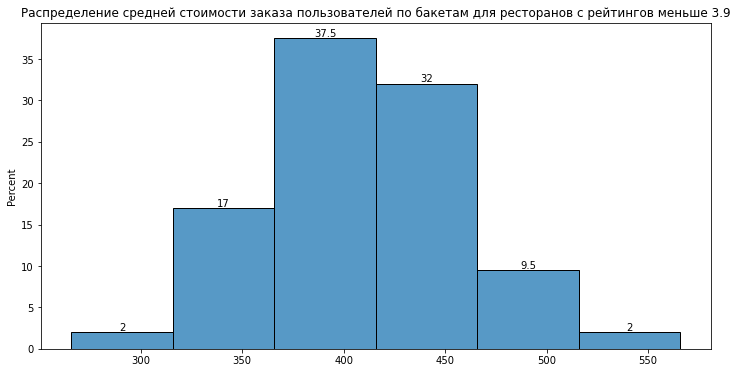

In [227]:
from scipy.stats import shapiro
pylab.figure(figsize(12, 6))
from scipy.stats import shapiro
plt.title('Распределение средней стоимости заказа пользователей по бакетам для ресторанов с рейтингов меньше 3.9')
ax=sns.histplot(s1, stat='percent', binwidth=50)
ax.bar_label (ax.containers [ 0 ])
print(shapiro(s1))
print(kstest(s1, 'norm', args=(mean(s1),std(s1,ddof=1))))

Согласно тесту Колмогорова-Смирнова и тесту Шапиро-Уилка нельзя отвергнуть гипотезу на любом разумном уровне значимости о том, что распределение бакетов второй группы является нормальным:

ShapiroResult(statistic=0.9958863854408264, pvalue=0.8693669438362122)
KstestResult(statistic=0.0391620624438509, pvalue=0.9069048119700448, statistic_location=453.23, statistic_sign=-1)


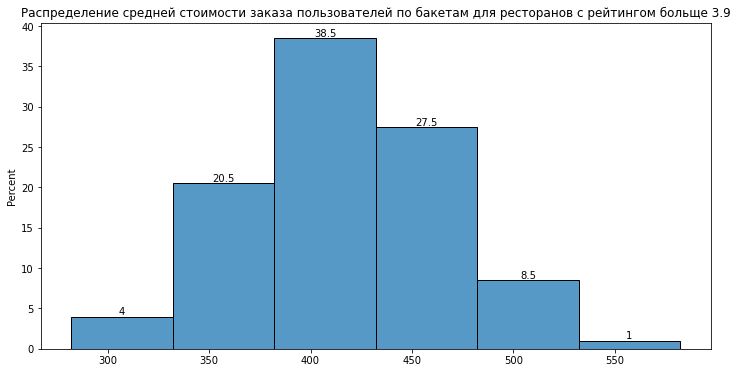

In [228]:
from scipy.stats import shapiro
pylab.figure(figsize(12, 6))
from scipy.stats import shapiro
plt.title('Распределение средней стоимости заказа пользователей по бакетам для ресторанов с рейтингом больще 3.9')
ax=sns.histplot(s2, stat='percent', binwidth=50)
ax.bar_label (ax.containers [ 0 ])
print(shapiro(s2))
print(kstest(s2, 'norm', args=(mean(s2),std(s2,ddof=1))))

Убедившись в нормальности распределений, проведем t-test о равенстве средних:

In [229]:
from scipy.stats import ttest_ind
ttest_ind(s1,s2)

Ttest_indResult(statistic=-2.043597112934184, pvalue=0.04165128392051794)

На 5% уровне значимости можно отвергнуть гипотезу о равенстве средних. Следовательно, равенство средних значений average_sales_qty для групп: 

    1)Рестораны с рейтингом меньше 3.9
    2)Рестораны с рейтингом больше 3.9
    
**можно отвергнуть на 5% уровне значимости.**

Построим 95% доверительный интервал для разности средних. Видим, что с 95%-ной вероятностью рестораны с рейтингом меньше 3.9 в среднем получают меньше за заказ, чем рестораны с рейтингом меньше 3.9, в интервале от 0.42 до 20 рупий.

In [230]:
diff=mean(s1)-mean(s2)
diff_sd=np.sqrt(var(s1, ddof=1)/200+var(s2, ddof=1)/200)
left, right=st.norm.interval(0.95, loc=diff, scale=diff_sd)
print(f'95% confidence interval: [{left} ; {right}]')

95% confidence interval: [-20.016854229506137 ; -0.41814577049392376]


### rating_count

[Text(0, 0, '58.6367'),
 Text(0, 0, '14.5658'),
 Text(0, 0, '8.08469'),
 Text(0, 0, '13.8333'),
 Text(0, 0, '2.95947'),
 Text(0, 0, '1.84395'),
 Text(0, 0, '0.0659755'),
 Text(0, 0, '0.0100983')]

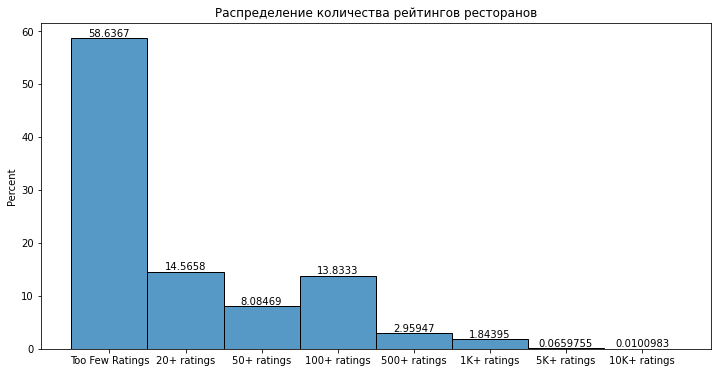

In [231]:
plt.title('Распределение количества рейтингов ресторанов')
grades=pd.Categorical(restaurant['rating_count'],
['Too Few Ratings', '20+ ratings', '50+ ratings', '100+ ratings','500+ ratings', '1K+ ratings', '5K+ ratings', '10K+ ratings'])
ax=sns.histplot(grades, stat='percent', binwidth=1)
ax.bar_label (ax.containers [ 0 ])

Посмотрим распределение переменных average_sales_amount, average_sales_qty, order_qty по количеству рейтингов ресторана(rating_count):

In [232]:
d=restaurant.groupby('rating_count').agg({'average_sales_amount':['median', 'mean', 'std'],
                            'average_sales_qty':['median', 'mean', 'std'],
                                'order_qty':['median', 'mean', 'std']}).reset_index()
a = copy(d[0:1])
d[0:1]=d[7:8]
d[7:8]=d[1:2]
d[1:2]=d[3:4]
d[3:4]=a
a=copy(d[2:3])
d[2:3]=d[4:5]
d[4:5]=d[5:6]
d[5:6]=a
d

rating_count average_sales_amount                          \
                                 median        mean         std   
0  Too Few Ratings                162.0  395.392238  590.006098   
1      20+ ratings                162.0  410.093409  606.385846   
2      50+ ratings                162.0  415.683571  612.283661   
3     100+ ratings                167.0  418.711164  617.370734   
4     500+ ratings                157.0  416.342357  617.615641   
5      1K+ ratings                157.0  394.620664  592.525114   
6      5K+ ratings                139.0  423.724490  638.586790   
7     10K+ ratings                130.0  188.333333  295.798596   

  average_sales_qty                     order_qty                      
             median      mean       std    median      mean       std  
0               1.0  1.443398  2.180744       1.0  0.744061  0.436995  
1               1.0  1.460760  2.213983       1.0  0.732760  0.444197  
2               1.0  1.448497  2.199341       1.0  0.730036  0.445644  
3               1.0  1.479025  2.236399       1.0  0.731263  0.445067  
4               1.0  1.488626  2.269270       1.0  0.727707  0.447230  
5               1.0  1.590727  2.440692       1.0  0.731654  0.443180  
6               1.0  1.785714  2.605506       1.0  0.683673  0.467433  
7               1.0  0.933333  1.222799       1.0  0.666667  0.487950

/Users/sergeyvikulin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



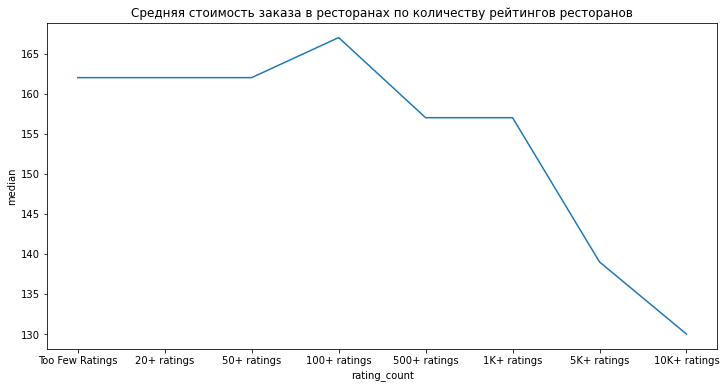

In [233]:
pylab.figure(figsize(12, 6))
plt.title('Средняя стоимость заказа в ресторанах по количеству рейтингов ресторанов')
ax=sns.lineplot(d['rating_count'],d['average_sales_amount']['median'])

Протестируем гипотезу о равенстве средних значений average_sales_amount для групп: 

    1)Рестораны с малым количеством рейтингов(отзывов) до 20
    2)Рестораны количеством рейтингов(отзывов), большим 20

Мы видим, что наши группы независимы, но распределения групп не являются нормальными, поэтому мы не можем применить t-test. Поэтому применим бакетное преобразование.

In [234]:
kstest(restaurant[restaurant['rating_count']=='Too Few Ratings']['average_sales_amount'], 'norm', 
       args=(restaurant[restaurant['rating_count']=='Too Few Ratings']['average_sales_amount'].mean(),
             restaurant[restaurant['rating_count']=='Too Few Ratings']['average_sales_amount'].std(ddof=1)))

KstestResult(statistic=0.25138127529197063, pvalue=0.0, statistic_location=0.0, statistic_sign=-1)

In [235]:
kstest(restaurant[restaurant['rating_count']!='Too Few Ratings']['average_sales_amount'], 'norm', 
       args=(restaurant[restaurant['rating_count']!='Too Few Ratings']['average_sales_amount'].mean(),
             restaurant[restaurant['rating_count']!='Too Few Ratings']['average_sales_amount'].std(ddof=1)))

KstestResult(statistic=0.24928018298007254, pvalue=0.0, statistic_location=0.0, statistic_sign=-1)

Разбиваем группы случайным образом на 200 бакетов:

In [236]:
from sklearn.model_selection import KFold
y1 = pd.DataFrame(restaurant[restaurant['rating_count']=='Too Few Ratings'], columns=restaurant.columns).reset_index(drop=True)
y2 = pd.DataFrame(restaurant[restaurant['rating_count']!='Too Few Ratings'], columns=restaurant.columns).reset_index(drop=True)
kf1 = KFold(n_splits=200, random_state=65, shuffle=True)
kf2 = KFold(n_splits=200, random_state=65, shuffle=True)
r1 = list(kf1.split(y1))
r2 = list(kf2.split(y2))
s1=[0]*200
s2=[0]*200
for j in range(len(r1)):
    for n in range(len(r1[j][1])):
        s1[j]=s1[j]+float(y1[y1.index==int(r1[j][1][n])]['average_sales_amount'])
for i in range(len(s1)):
    s1[i]=round(s1[i]/len(r1[i][1]),2)
for j in range(len(r2)):
    for n in range(len(r2[j][1])):
        s2[j]=s2[j]+float(y2[y2.index==int(r2[j][1][n])]['average_sales_amount'])
for i in range(len(s2)):
    s2[i]=round(s2[i]/len(r2[i][1]),2)
print('Количество элементов в бакете для restaurant[rating_count]=Too Few Ratings', {len(r1[-1][1])})
print('Количество элементов в бакете для restaurant[rating_count]!=Too Few Ratings', {len(r2[-1][1])})

Количество элементов в бакете для restaurant[rating_count]=Too Few Ratings {435}
Количество элементов в бакете для restaurant[rating_count]!=Too Few Ratings {307}


Согласно тесту Колмогорова-Смирнова и тесту Шапиро-Уилка нельзя отвергнуть гипотезу на любом разумном уровне значимости о том, что распределение бакетов первой группы является нормальным:

ShapiroResult(statistic=0.9941502809524536, pvalue=0.6229770183563232)
KstestResult(statistic=0.051574355657846876, pvalue=0.6426953833210147, statistic_location=378.9, statistic_sign=-1)


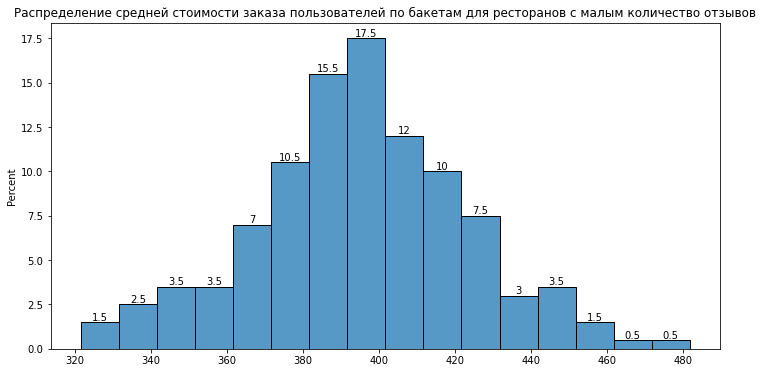

In [237]:
from scipy.stats import shapiro
pylab.figure(figsize(12, 6))
from scipy.stats import shapiro
plt.title('Распределение средней стоимости заказа пользователей по бакетам для ресторанов с малым количество отзывов')
ax=sns.histplot(s1, stat='percent', binwidth=10)
ax.bar_label (ax.containers [ 0 ])
print(shapiro(s1))
print(kstest(s1, 'norm', args=(mean(s1),std(s1,ddof=1))))

Согласно тесту Колмогорова-Смирнова и тесту Шапиро-Уилка нельзя отвергнуть гипотезу на любом разумном уровне значимости о том, что распределение бакетов второй группы является нормальным:

ShapiroResult(statistic=0.9934116005897522, pvalue=0.5158337354660034)
KstestResult(statistic=0.05084851178119776, pvalue=0.6600269489894901, statistic_location=412.77, statistic_sign=1)


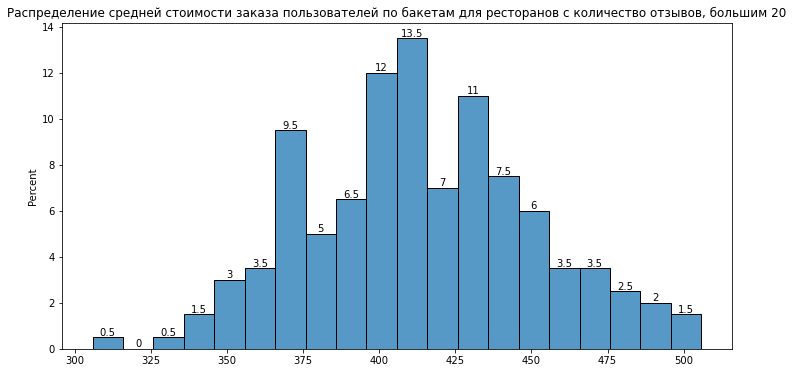

In [238]:
from scipy.stats import shapiro
pylab.figure(figsize(12, 6))
from scipy.stats import shapiro
plt.title('Распределение средней стоимости заказа пользователей по бакетам для ресторанов с количество отзывов, большим 20')
ax=sns.histplot(s2, stat='percent', binwidth=10)
ax.bar_label (ax.containers [ 0 ])
print(shapiro(s2))
print(kstest(s2, 'norm', args=(mean(s2),std(s2,ddof=1))))

Убедившись в нормальности распределений, проведем t-test о равенстве средних:

In [239]:
from scipy.stats import ttest_ind
ttest_ind(s1,s2)

Ttest_indResult(statistic=-5.5699579055546575, pvalue=4.698529995412126e-08)

На 1% уровне значимости можно отвергнуть гипотезу о равенстве средних. Следовательно, равенство средних значений average_sales_qty для групп: 

    1)Рестораны с малым количеством рейтингов(отзывов) до 20
    2)Рестораны количеством рейтингов(отзывов), большим 20
    
**можно отвергнуть на 1% уровне значимости.**

Построим 99% доверительный интервал для разности средних. Видим, что с 99%-ной вероятностью рестораны с количеством рейтингов,  меньшим 20, в среднем получают меньше за заказ, чем рестораны с количеством рейтингов,  большим 20, в интервале от 9.89 до 26.9 рупий.

In [240]:
diff=mean(s1)-mean(s2)
diff_sd=np.sqrt(var(s1, ddof=1)/200+var(s2, ddof=1)/200)
left, right=st.norm.interval(0.99, loc=diff, scale=diff_sd)
print(f'99% confidence interval: [{left} ; {right}]')

99% confidence interval: [-26.90623572091854 ; -9.889864279081369]


### cost

[Text(0, 0, '0.548578'),
 Text(0, 0, '5.16955'),
 Text(0, 0, '10.2946'),
 Text(0, 0, '30.2705'),
 Text(0, 0, '15.381'),
 Text(0, 0, '23.3134'),
 Text(0, 0, '4.85629'),
 Text(0, 0, '9.03631'),
 Text(0, 0, '1.12982')]

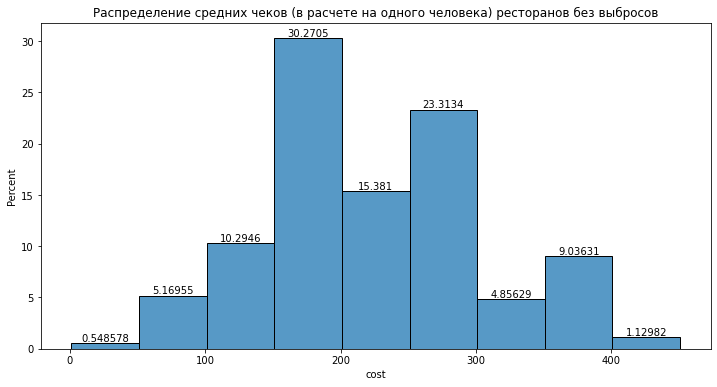

In [241]:
IQR = restaurant['cost'].quantile(0.75) - restaurant ['cost'].quantile(0.25)
plt.title('Распределение средних чеков (в расчете на одного человека) ресторанов без выбросов')
ax=sns.histplot(restaurant[restaurant['cost']<=restaurant['cost'].quantile(0.75)+1.5*IQR]['cost'], stat='percent', binwidth=50)
ax.bar_label (ax.containers [ 0 ])

Видно, что распределение переменной cost не является нормальным.

### average_number_of_people

In [242]:
restaurant['average_number_of_people']=restaurant['average_sales_amount']/restaurant['cost']

/var/folders/m_/pktzsp9j7d10cx63t_w9_6pr0000gn/T/ipykernel_76663/3578281804.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[Text(0, 0, '68.352'),
 Text(0, 0, '16.3094'),
 Text(0, 0, '7.84694'),
 Text(0, 0, '4.65023'),
 Text(0, 0, '2.84143')]

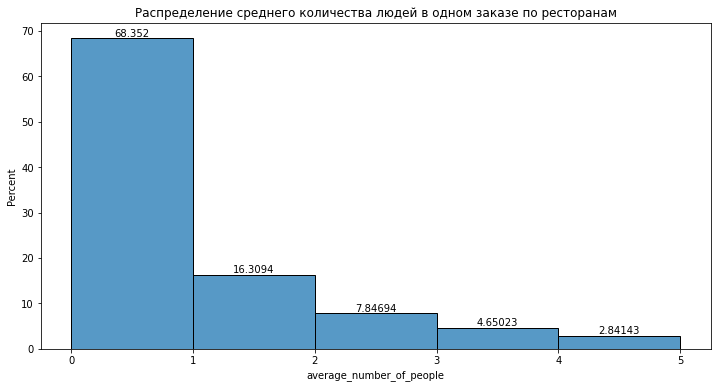

In [243]:
plt.title('Распределение среднего количества людей в одном заказе по ресторанам')
ax=sns.histplot(restaurant[restaurant['average_number_of_people']<=2.5*restaurant['average_number_of_people'].quantile(0.75)-1.5*restaurant['average_number_of_people'].quantile(0.25)]
                ['average_number_of_people'], stat='percent', binwidth=1)
ax.bar_label (ax.containers [ 0 ])

Видно, что распределение переменной average_number_of_people не является нормальным.

### cuisine

In [244]:
b=list(restaurant['cuisine'])+list(restaurant[restaurant['additional_cuisine']!='No']['additional_cuisine'])

[Text(0, 0, '28.9457'),
 Text(0, 0, '36.2721'),
 Text(0, 0, '3.40724'),
 Text(0, 0, '2.25142'),
 Text(0, 0, '20.7202'),
 Text(0, 0, '2.44292'),
 Text(0, 0, '1.40018'),
 Text(0, 0, '0.534158'),
 Text(0, 0, '1.56383'),
 Text(0, 0, '0.923411'),
 Text(0, 0, '0.450056'),
 Text(0, 0, '1.08877')]

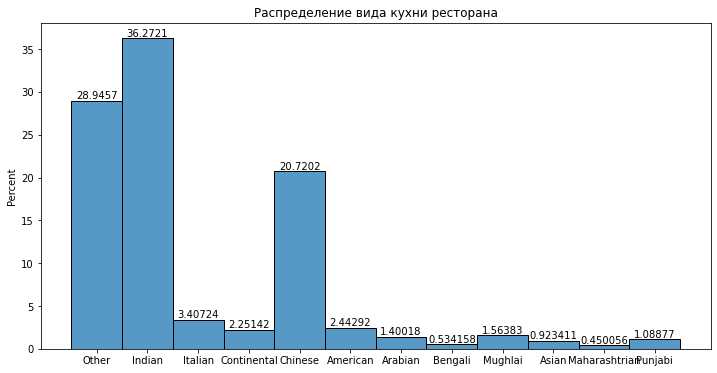

In [245]:
plt.title('Распределение вида кухни ресторана')
ax=sns.histplot(b, stat='percent')
ax.bar_label (ax.containers [ 0 ])

### additional_cuisine

[Text(0, 0, '81.5282'), Text(0, 0, '18.4718')]

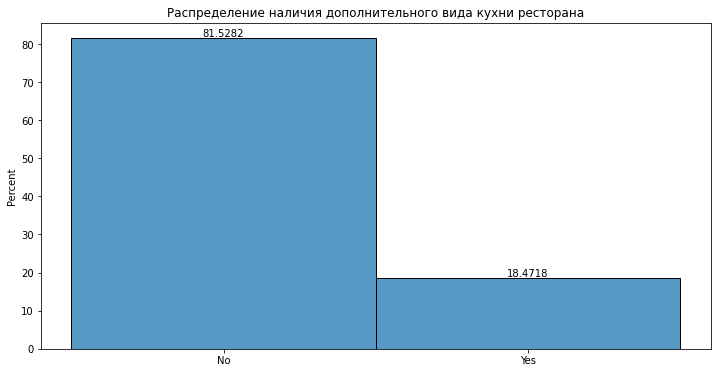

In [246]:
a=np.where(restaurant['additional_cuisine']=='No', 'No', 'Yes')
pylab.figure(figsize(12, 6))
plt.title('Распределение наличия дополнительного вида кухни ресторана')
ax=sns.histplot(a, stat='percent')
ax.bar_label (ax.containers [ 0 ])

Посмотрим распределение переменных average_sales_amount, average_sales_qty, order_qty по кухне ресторана(cuisine):

In [247]:
d=restaurant.groupby('cuisine').agg({'average_sales_amount':['median', 'mean', 'std'],
                            'average_sales_qty':['median', 'mean', 'std'],
                                'order_qty':['median', 'mean', 'std']}).reset_index()
d

cuisine average_sales_amount                          \
                                median        mean         std   
0        American                162.0  403.483628  595.335359   
1         Arabian                155.0  401.865155  609.907262   
2           Asian                169.0  393.515152  580.920882   
3         Bengali                176.0  321.036717  475.008012   
4         Chinese                162.0  396.815731  588.616951   
5     Continental                167.0  419.078803  613.751118   
6          Indian                157.0  404.001396  605.284100   
7         Italian                162.0  397.187899  588.805918   
8   Maharashtrian                148.0  338.873479  541.071262   
9         Mughlai                167.0  385.337737  569.185507   
10          Other                162.0  408.258874  603.158423   
11        Punjabi                118.0  384.260563  578.224560   

   average_sales_qty                     order_qty                      
              median      mean       std    median      mean       std  
0                1.0  1.463415  2.221540       1.0  0.738390  0.441860  
1                1.0  1.649165  2.471051       1.0  0.755370  0.429996  
2                1.0  1.418182  2.177734       1.0  0.739394  0.439632  
3                1.0  1.207343  1.346870       1.0  0.822894  0.382171  
4                1.0  1.446782  2.187557       1.0  0.745578  0.437051  
5                1.0  1.509822  2.328490       1.0  0.739150  0.440238  
6                1.0  1.444046  2.194478       1.0  0.733371  0.443123  
7                1.0  1.447684  2.164509       1.0  0.746406  0.435111  
8                1.0  1.167883  1.567518       1.0  0.761557  0.426651  
9                1.0  1.392238  1.914427       1.0  0.771263  0.420193  
10               1.0  1.470189  2.224515       1.0  0.736169  0.441647  
11               1.0  1.443662  2.436543       1.0  0.665493  0.472651

/Users/sergeyvikulin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



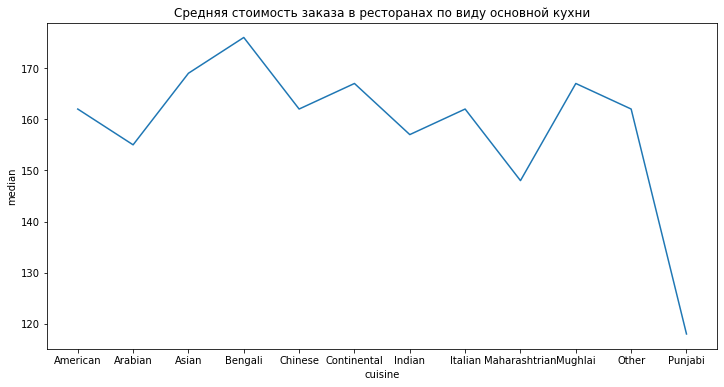

In [248]:
pylab.figure(figsize(12, 6))
plt.title('Средняя стоимость заказа в ресторанах по виду основной кухни')
ax=sns.lineplot(d['cuisine'],d['average_sales_amount']['median'])

Протестируем гипотезу о равенстве средних значений average_sales_amount для групп: 

    1)Рестораны с китайской кухней
    2)Рестораны с индийской кухней

Мы видим, что наши группы независимы, но распределения групп не являются нормальными, поэтому мы не можем применить t-test. Поэтому применим бакетное преобразование.

In [249]:
kstest(restaurant[restaurant['cuisine']=='Chinese']['average_sales_amount'], 'norm', 
       args=(restaurant[restaurant['cuisine']=='Chinese']['average_sales_amount'].mean(),
             restaurant[restaurant['cuisine']=='Chinese']['average_sales_amount'].std(ddof=1)))

KstestResult(statistic=0.25010818572222204, pvalue=0.0, statistic_location=0.0, statistic_sign=-1)

In [250]:
kstest(restaurant[restaurant['cuisine']=='Indian']['average_sales_amount'], 'norm', 
       args=(restaurant[restaurant['cuisine']=='Indian']['average_sales_amount'].mean(),
             restaurant[restaurant['cuisine']=='Indian']['average_sales_amount'].std(ddof=1)))

KstestResult(statistic=0.2522399826759278, pvalue=0.0, statistic_location=0.0, statistic_sign=-1)

Разбиваем группы случайным образом на 200 бакетов:

In [251]:
from sklearn.model_selection import KFold
y1 = pd.DataFrame(restaurant[restaurant['cuisine']=='Chinese'], columns=restaurant.columns).reset_index(drop=True)
y2 = pd.DataFrame(restaurant[restaurant['cuisine']=='Indian'], columns=restaurant.columns).reset_index(drop=True)
kf1 = KFold(n_splits=200, random_state=84, shuffle=True)
kf2 = KFold(n_splits=200, random_state=84, shuffle=True)
r1 = list(kf1.split(y1))
r2 = list(kf2.split(y2))
s1=[0]*200
s2=[0]*200
for j in range(len(r1)):
    for n in range(len(r1[j][1])):
        s1[j]=s1[j]+float(y1[y1.index==int(r1[j][1][n])]['average_sales_amount'])
for i in range(len(s1)):
    s1[i]=round(s1[i]/len(r1[i][1]),2)
for j in range(len(r2)):
    for n in range(len(r2[j][1])):
        s2[j]=s2[j]+float(y2[y2.index==int(r2[j][1][n])]['average_sales_amount'])
for i in range(len(s2)):
    s2[i]=round(s2[i]/len(r2[i][1]),2)
print('Количество элементов в бакете для restaurant[cuisine]=Chinese', {len(r1[-1][1])})
print('Количество элементов в бакете для restaurant[cuisine]=Indian', {len(r2[-1][1])})

Количество элементов в бакете для restaurant[cuisine]=Chinese {182}
Количество элементов в бакете для restaurant[cuisine]=Indian {232}


Согласно тесту Колмогорова-Смирнова и тесту Шапиро-Уилка нельзя отвергнуть гипотезу на любом разумном уровне значимости о том, что распределение бакетов первой группы является нормальным:

ShapiroResult(statistic=0.9963505268096924, pvalue=0.9190735220909119)
KstestResult(statistic=0.02987954844321057, pvalue=0.9918331699460745, statistic_location=346.21, statistic_sign=-1)


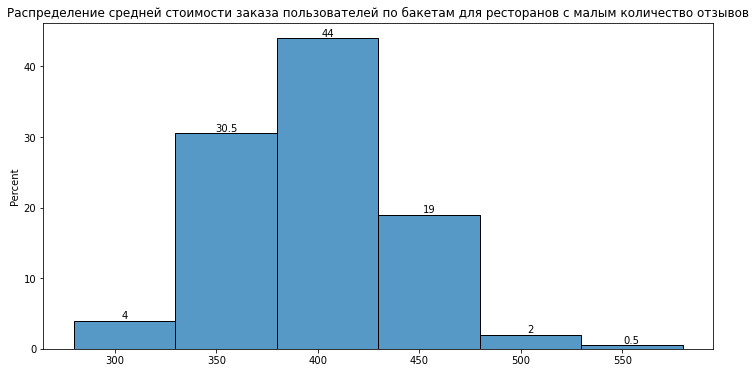

In [252]:
from scipy.stats import shapiro
pylab.figure(figsize(12, 6))
from scipy.stats import shapiro
plt.title('Распределение средней стоимости заказа пользователей по бакетам для ресторанов с малым количество отзывов')
ax=sns.histplot(s1, stat='percent', binwidth=50)
ax.bar_label (ax.containers [ 0 ])
print(shapiro(s1))
print(kstest(s1, 'norm', args=(mean(s1),std(s1,ddof=1))))

Согласно тесту Колмогорова-Смирнова и тесту Шапиро-Уилка нельзя отвергнуть гипотезу на любом разумном уровне значимости о том, что распределение бакетов второй группы является нормальным:

ShapiroResult(statistic=0.9927178621292114, pvalue=0.4243970215320587)
KstestResult(statistic=0.05583766118800565, pvalue=0.5422904117380398, statistic_location=397.02, statistic_sign=1)


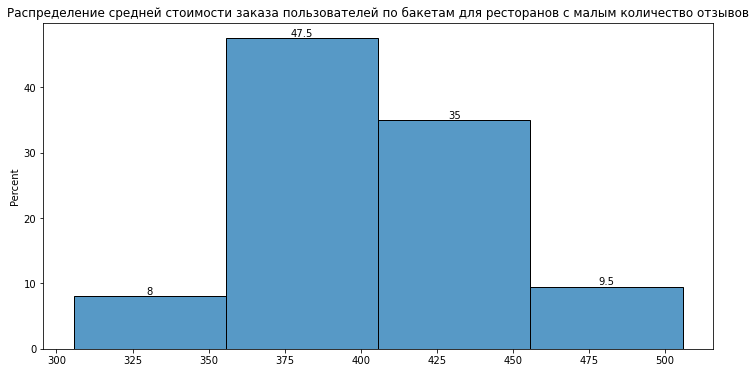

In [253]:
from scipy.stats import shapiro
pylab.figure(figsize(12, 6))
from scipy.stats import shapiro
plt.title('Распределение средней стоимости заказа пользователей по бакетам для ресторанов с малым количество отзывов')
ax=sns.histplot(s2, stat='percent', binwidth=50)
ax.bar_label (ax.containers [ 0 ])
print(shapiro(s2))
print(kstest(s2, 'norm', args=(mean(s2),std(s2,ddof=1))))

Убедившись в нормальности распределений, проведем t-test о равенстве средних:

In [254]:
from scipy.stats import ttest_ind
ttest_ind(s1,s2)

Ttest_indResult(statistic=-1.822248974092912, pvalue=0.06916750035138637)

На 10% уровне значимости можно отвергнуть гипотезу о равенстве средних. Следовательно, равенство средних значений average_sales_amount для групп: 

    1)Рестораны с китайской кухней
    2)Рестораны с индийской кухней
    
**можно отвергнуть на 10% уровне значимости.**

Построим 90% доверительный интервал для разности средних. Видим, что с 90%-ной вероятностью рестораны с китайской кухней в среднем получают меньше за заказ, чем рестораны с индийской кухней, в интервале от 0.7 до 13.67 рупий.

In [255]:
diff=mean(s1)-mean(s2)
diff_sd=np.sqrt(var(s1, ddof=1)/200+var(s2, ddof=1)/200)
left, right=st.norm.interval(0.9, loc=diff, scale=diff_sd)
print(f'90% confidence interval: [{left} ; {right}]')

90% confidence interval: [-13.665405422371883 ; -0.6991945776280026]


### food

In [256]:
b=list(restaurant['food'])+list(restaurant[restaurant['additional_food']!='No']['additional_food'])

[Text(0, 0, '8.03808'),
 Text(0, 0, '4.97888'),
 Text(0, 0, '7.82516'),
 Text(0, 0, '34.691'),
 Text(0, 0, '9.70597'),
 Text(0, 0, '6.30485'),
 Text(0, 0, '1.32203'),
 Text(0, 0, '5.54554'),
 Text(0, 0, '3.01527'),
 Text(0, 0, '1.03588'),
 Text(0, 0, '0.987439'),
 Text(0, 0, '8.18115'),
 Text(0, 0, '1.12713'),
 Text(0, 0, '1.71013'),
 Text(0, 0, '0.944066'),
 Text(0, 0, '0.576241'),
 Text(0, 0, '0.608911'),
 Text(0, 0, '0.675379'),
 Text(0, 0, '0.70467'),
 Text(0, 0, '0.503577'),
 Text(0, 0, '0.513153'),
 Text(0, 0, '1.00546')]

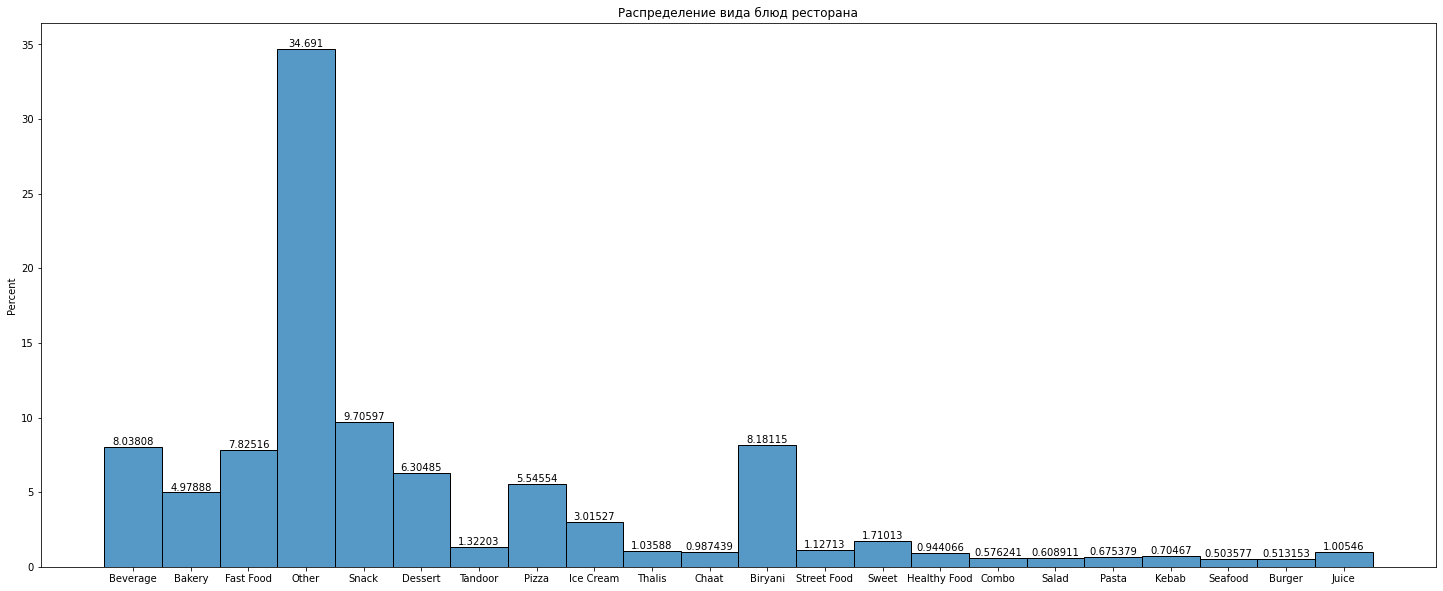

In [257]:
pylab.figure(figsize(25, 10))
plt.title('Распределение вида блюд ресторана')
ax=sns.histplot(b, stat='percent')
ax.bar_label (ax.containers [ 0 ])

### additional_food

[Text(0, 0, '19.5166'), Text(0, 0, '80.4834')]

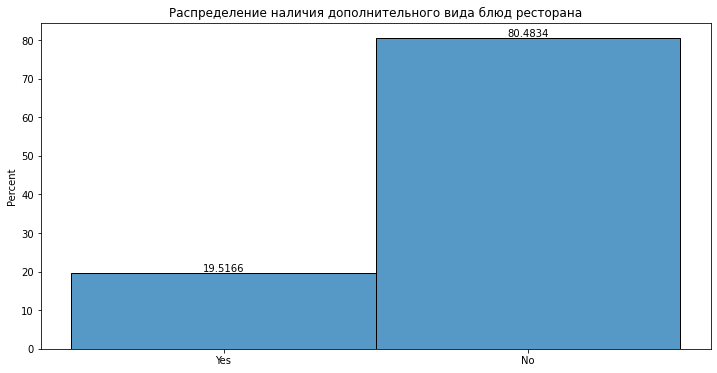

In [258]:
a=np.where(restaurant['additional_food']=='No', 'No', 'Yes')
pylab.figure(figsize(12, 6))
plt.title('Распределение наличия дополнительного вида блюд ресторана')
ax=sns.histplot(a, stat='percent')
ax.bar_label (ax.containers [ 0 ])

Посмотрим распределение переменных average_sales_amount, average_sales_qty, order_qty по виду блюд ресторана(food):

In [259]:
d=restaurant.groupby('food').agg({'average_sales_amount':['median', 'mean', 'std'],
                            'average_sales_qty':['median', 'mean', 'std'],
                                 'order_qty':['median', 'mean', 'std']}).reset_index()
d

food average_sales_amount                          \
                               median        mean         std   
0         Bakery                157.0  390.831425  585.403434   
1       Beverage                157.0  406.399853  607.505559   
2        Biryani                162.0  410.523377  611.442761   
3         Burger                167.0  419.842391  599.528414   
4          Chaat                167.0  465.715895  663.647690   
5          Combo                176.0  408.714286  600.341592   
6        Dessert                171.0  418.211570  613.540166   
7      Fast Food                157.0  391.477051  580.620531   
8   Healthy Food                181.0  419.503724  628.532649   
9      Ice Cream                167.0  428.300070  630.765830   
10         Juice                144.0  448.234375  685.672458   
11         Kebab                171.0  378.112308  553.291380   
12         Other                157.0  399.385650  595.403370   
13         Pasta                194.0  413.559078  566.197696   
14         Pizza                162.0  405.333381  603.177984   
15         Salad                201.5  414.018072  565.780171   
16       Seafood                157.0  415.330275  619.566618   
17         Snack                167.0  402.104782  593.168454   
18   Street Food                157.0  407.230431  608.258631   
19         Sweet                167.0  395.386785  564.664283   
20       Tandoor                167.0  417.855184  623.340701   
21        Thalis                144.0  369.844735  566.951578   

   average_sales_qty                     order_qty                      
              median      mean       std    median      mean       std  
0                1.0  1.403738  2.145902       1.0  0.740421  0.441112  
1                1.0  1.450151  2.234558       1.0  0.731444  0.443410  
2                1.0  1.517974  2.312539       1.0  0.731478  0.444479  
3                1.0  1.744565  2.542529       1.0  0.744565  0.437295  
4                1.0  1.750939  2.777784       1.0  0.737171  0.443282  
5                1.0  1.499248  2.232782       1.0  0.753383  0.431366  
6                1.0  1.496970  2.218755       1.0  0.740937  0.439902  
7                1.0  1.434190  2.151984       1.0  0.748507  0.434581  
8                1.0  1.513966  2.222542       1.0  0.744879  0.436132  
9                1.0  1.500351  2.340217       1.0  0.720309  0.449005  
10               1.0  1.626953  2.408298       1.0  0.726562  0.446159  
11               1.0  1.492308  2.330365       1.0  0.758462  0.428346  
12               1.0  1.448496  2.195981       1.0  0.739555  0.440137  
13               1.0  1.495677  2.207936       1.0  0.749280  0.434054  
14               1.0  1.425667  2.121335       1.0  0.730786  0.443908  
15               1.0  1.620482  2.295524       1.0  0.786145  0.410645  
16               1.0  1.550459  2.328869       1.0  0.766710  0.423202  
17               1.0  1.425251  2.136264       1.0  0.742615  0.437737  
18               1.0  1.351837  2.130676       1.0  0.719649  0.452894  
19               1.0  1.491499  2.171567       1.0  0.747295  0.436506  
20               1.0  1.508475  2.270197       1.0  0.739282  0.440270  
21               1.0  1.264128  1.894969       1.0  0.727543  0.445356

/Users/sergeyvikulin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



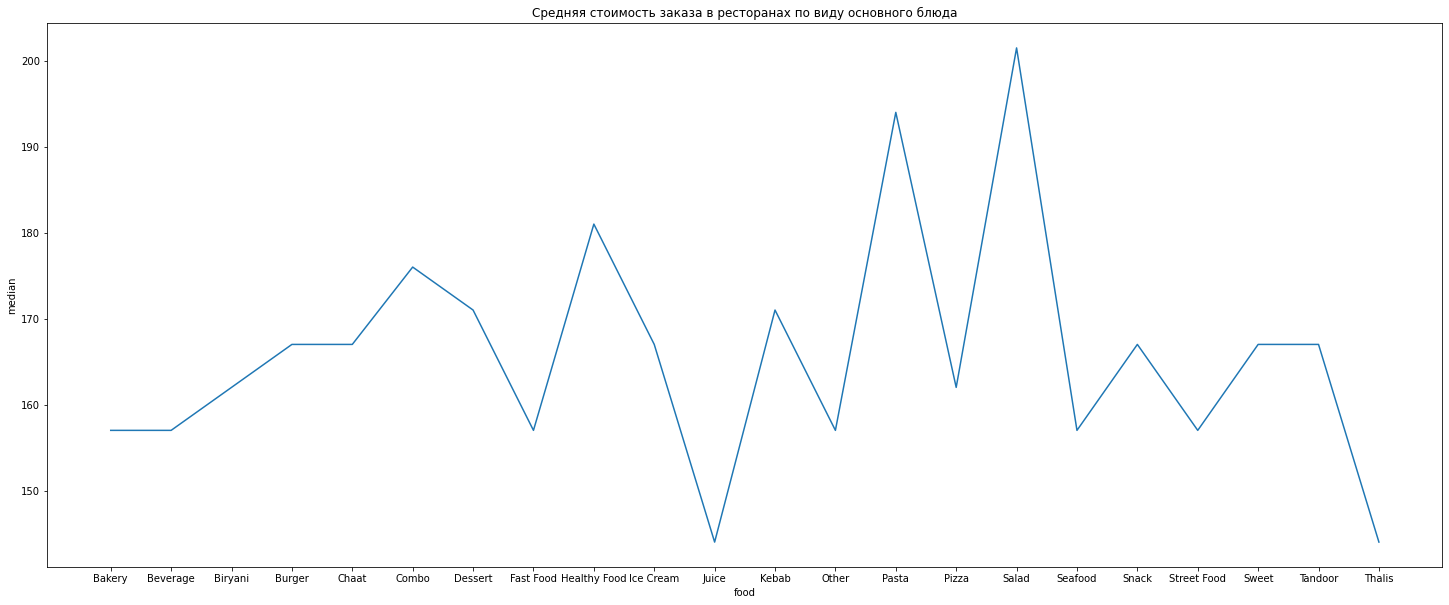

In [260]:
pylab.figure(figsize(25, 10))
plt.title('Средняя стоимость заказа в ресторанах по виду основного блюда')
ax=sns.lineplot(d['food'],d['average_sales_amount']['median'])

Протестируем гипотезу о равенстве средних значений average_sales_amount для групп: 

    1)Рестораны-пекарни
    2)Фастфуд-рестораны

Мы видим, что наши группы независимы, но распределения групп не являются нормальными, поэтому мы не можем применить t-test. Поэтому применим бакетное преобразование.

In [261]:
kstest(restaurant[restaurant['food']=='Bakery']['average_sales_amount'], 'norm', 
       args=(restaurant[restaurant['food']=='Bakery']['average_sales_amount'].mean(),
             restaurant[restaurant['food']=='Bakery']['average_sales_amount'].std(ddof=1)))

KstestResult(statistic=0.25218570277381114, pvalue=2.2448683286267434e-240, statistic_location=0.0, statistic_sign=-1)

In [262]:
kstest(restaurant[restaurant['food']=='Fast Food']['average_sales_amount'], 'norm', 
       args=(restaurant[restaurant['food']=='Fast Food']['average_sales_amount'].mean(),
             restaurant[restaurant['food']=='Fast Food']['average_sales_amount'].std(ddof=1)))

KstestResult(statistic=0.25007966489681205, pvalue=0.0, statistic_location=0.0, statistic_sign=-1)

Разбиваем группы случайным образом на 100 бакетов:

In [263]:
from sklearn.model_selection import KFold
y1 = pd.DataFrame(restaurant[restaurant['food']=='Bakery'], columns=restaurant.columns).reset_index(drop=True)
y2 = pd.DataFrame(restaurant[restaurant['food']=='Fast Food'], columns=restaurant.columns).reset_index(drop=True)
kf1 = KFold(n_splits=100, random_state=92, shuffle=True)
kf2 = KFold(n_splits=100, random_state=92, shuffle=True)
r1 = list(kf1.split(y1))
r2 = list(kf2.split(y2))
s1=[0]*100
s2=[0]*100
for j in range(len(r1)):
    for n in range(len(r1[j][1])):
        s1[j]=s1[j]+float(y1[y1.index==int(r1[j][1][n])]['average_sales_amount'])
for i in range(len(s1)):
    s1[i]=round(s1[i]/len(r1[i][1]),2)
for j in range(len(r2)):
    for n in range(len(r2[j][1])):
        s2[j]=s2[j]+float(y2[y2.index==int(r2[j][1][n])]['average_sales_amount'])
for i in range(len(s2)):
    s2[i]=round(s2[i]/len(r2[i][1]),2)
print('Количество элементов в бакете для restaurant[food]=Bakery', {len(r1[-1][1])})
print('Количество элементов в бакете для restaurant[food]=Fast Food', {len(r2[-1][1])})

Количество элементов в бакете для restaurant[food]=Bakery {42}
Количество элементов в бакете для restaurant[food]=Fast Food {100}


Согласно тесту Колмогорова-Смирнова и тесту Шапиро-Уилка нельзя отвергнуть гипотезу на любом разумном уровне значимости о том, что распределение бакетов первой группы является нормальным:

ShapiroResult(statistic=0.9905816912651062, pvalue=0.7115703225135803)
KstestResult(statistic=0.0418428042980159, pvalue=0.9918319015787888, statistic_location=423.12, statistic_sign=1)


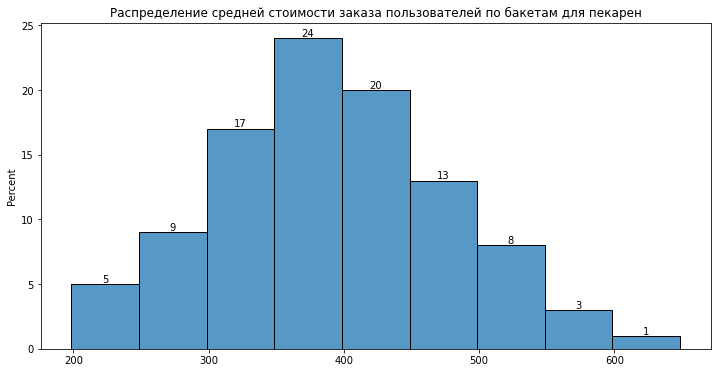

In [264]:
from scipy.stats import shapiro
pylab.figure(figsize(12, 6))
from scipy.stats import shapiro
plt.title('Распределение средней стоимости заказа пользователей по бакетам для пекарен')
ax=sns.histplot(s1, stat='percent', binwidth=50)
ax.bar_label (ax.containers [ 0 ])
print(shapiro(s1))
print(kstest(s1, 'norm', args=(mean(s1),std(s1,ddof=1))))

Согласно тесту Колмогорова-Смирнова и тесту Шапиро-Уилка нельзя отвергнуть гипотезу на любом разумном уровне значимости о том, что распределение бакетов второй группы является нормальным:

ShapiroResult(statistic=0.9914184212684631, pvalue=0.7776750922203064)
KstestResult(statistic=0.04753913124091658, pvalue=0.9695589869621637, statistic_location=362.83, statistic_sign=-1)


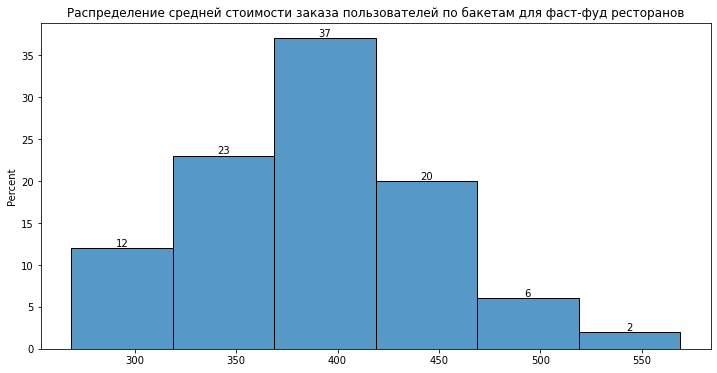

In [265]:
from scipy.stats import shapiro
pylab.figure(figsize(12, 6))
from scipy.stats import shapiro
plt.title('Распределение средней стоимости заказа пользователей по бакетам для фаст-фуд ресторанов')
ax=sns.histplot(s2, stat='percent', binwidth=50)
ax.bar_label (ax.containers [ 0 ])
print(shapiro(s2))
print(kstest(s2, 'norm', args=(mean(s2),std(s2,ddof=1))))

Убедившись в нормальности распределений, проведем t-test о равенстве средних:

In [266]:
from scipy.stats import ttest_ind
ttest_ind(s1,s2)

Ttest_indResult(statistic=-0.07042395810703302, pvalue=0.9439272999287377)

На любом разумном уровне значимости нельзя отвергнуть гипотезу о равенстве средних. Следовательно, равенство средних значений average_sales_amount для групп: 

    1)Рестораны-пекарни
    2)Фастфуд-рестораны
    
**нельзя отвергнуть.**

Корреляционная матрица таблицы restaurant:

<AxesSubplot:>

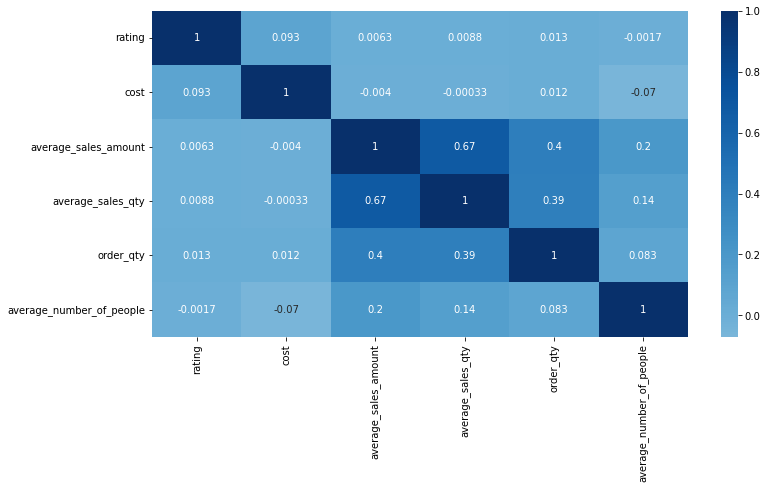

In [267]:
sns.heatmap(restaurant.corr(), 
            xticklabels=restaurant.corr().columns, yticklabels=restaurant.corr().columns, cmap='Blues', center=0, annot=True)

## Блюда и меню (df2)

In [268]:
df2

menu_id    r_id       f_id   price menu_cuisine menu_food  \
0              mn0  567335        fd0    40.0        Other  Beverage   
1              mn0  567335   fd669322    40.0        Other  Beverage   
2              mn1  567335        fd1    50.0        Other  Beverage   
3              mn2  567335        fd2    65.0        Other  Beverage   
4              mn3  567335        fd3    80.0        Other  Beverage   
...            ...     ...        ...     ...          ...       ...   
1179658  mn1043764  294677  fd1043764  1249.0        Other     Pizza   
1179659  mn1043765  294677  fd1043765   679.0        Other     Pizza   
1179660  mn1043766  294677  fd1043766   799.0        Other     Pizza   
1179661  mn1043767  294677  fd1043767   899.0        Other     Pizza   
1179662  mn1043768  294677  fd1043768   849.0        Other     Pizza   

        menu_additional_cuisine menu_additional_food  \
0                            No                Pizza   
1                            No                Pizza   
2                            No                Pizza   
3                            No                Pizza   
4                            No                Pizza   
...                         ...                  ...   
1179658                      No                   No   
1179659                      No                   No   
1179660                      No                   No   
1179661                      No                   No   
1179662                      No                   No   

                                                      item veg_or_non_veg  \
0                                        Aloo Tikki Burger            Veg   
1                                        Aloo Tikki Burger        Non-veg   
2                                        Veg Creamy Burger            Veg   
3                                      Cheese Burst Burger            Veg   
4                                     Paneer Creamy Burger            Veg   
...                                                    ...            ...   
1179658  Heavily Loaded Roasted & Peppery Lamb Deep Dis...        Non-veg   
1179659      Heavily Loaded Forestiere Deep Dish Veg Pizza            Veg   
1179660                            Chicken Deep Dish Pizza        Non-veg   
1179661             Roasted & Peppery Lamb Deep Dish Pizza        Non-veg   
1179662  Pepperoni & Pulled Oink Deep Dish Pizza with B...        Non-veg   

            restaurant_name           city  rating     rating_count    cost  \
0            AB FOODS POINT         Abohar     3.9  Too Few Ratings   200.0   
1            AB FOODS POINT         Abohar     3.9  Too Few Ratings   200.0   
2            AB FOODS POINT         Abohar     3.9  Too Few Ratings   200.0   
3            AB FOODS POINT         Abohar     3.9  Too Few Ratings   200.0   
4            AB FOODS POINT         Abohar     3.9  Too Few Ratings   200.0   
...                     ...            ...     ...              ...     ...   
1179658  Deep Dish Pizzeria  HSR,Bangalore     3.9  Too Few Ratings  1000.0   
1179659  Deep Dish Pizzeria  HSR,Bangalore     3.9  Too Few Ratings  1000.0   
1179660  Deep Dish Pizzeria  HSR,Bangalore     3.9  Too Few Ratings  1000.0   
1179661  Deep Dish Pizzeria  HSR,Bangalore     3.9  Too Few Ratings  1000.0   
1179662  Deep Dish Pizzeria  HSR,Bangalore     3.9  Too Few Ratings  1000.0   

        cuisine      food additional_cuisine additional_food  
0         Other  Beverage                 No           Pizza  
1         Other  Beverage                 No           Pizza  
2         Other  Beverage                 No           Pizza  
3         Other  Beverage                 No           Pizza  
4         Other  Beverage                 No           Pizza  
...         ...       ...                ...             ...  
1179658   Other     Pizza                 No              No  
1179659   Other     Pizza                 No              No  
1179660   Other     Pizza       

In [269]:
df2.describe()

price        rating          cost
count  1.179663e+06  1.179663e+06  1.179663e+06
mean   2.023954e+02  3.890690e+00  3.005462e+02
std    1.765594e+02  3.118355e-01  1.564077e+02
min    0.000000e+00  1.300000e+00  2.000000e+00
25%    1.000000e+02  3.900000e+00  2.000000e+02
50%    1.690000e+02  3.900000e+00  2.500000e+02
75%    2.500000e+02  4.000000e+00  3.500000e+02
max    9.999000e+03  5.000000e+00  3.999000e+03

Удалим выбросы в переменной price:

In [270]:
IQR = df2['price'].quantile(0.75) - df2 ['price'].quantile(0.25)
IQR

150.0

In [271]:
print("Границы выбросов: [{f}, {l}]".
      format(f=df2['price'].quantile(0.25)-1.5*IQR, l=df2['price'].quantile(0.75)+1.5*IQR))

Границы выбросов: [-125.0, 475.0]


Выбросы переменной price:

In [272]:
df2[(df2['price'].quantile(0.75)+1.5*IQR<df2['price'])
    |(df2['price'].quantile(0.25)-1.5*IQR>df2['price'])]

menu_id    r_id       f_id   price menu_cuisine menu_food  \
185          mn332  158203      fd332   480.0        Other  Beverage   
186          mn466  158203      fd332   480.0        Other  Beverage   
189          mn335  158203      fd335   499.0        Other  Beverage   
190          mn484  158203      fd335   499.0        Other  Beverage   
207          mn344  158203      fd344   720.0        Other  Beverage   
...            ...     ...        ...     ...          ...       ...   
1179658  mn1043764  294677  fd1043764  1249.0        Other     Pizza   
1179659  mn1043765  294677  fd1043765   679.0        Other     Pizza   
1179660  mn1043766  294677  fd1043766   799.0        Other     Pizza   
1179661  mn1043767  294677  fd1043767   899.0        Other     Pizza   
1179662  mn1043768  294677  fd1043768   849.0        Other     Pizza   

        menu_additional_cuisine menu_additional_food  \
185                          No                   No   
186                          No                   No   
189                          No                   No   
190                          No                   No   
207                          No                   No   
...                         ...                  ...   
1179658                      No                   No   
1179659                      No                   No   
1179660                      No                   No   
1179661                      No                   No   
1179662                      No                   No   

                                                      item veg_or_non_veg  \
185                          13 ' Large Spicy Paneer Pizza            Veg   
186                          13 ' Large Spicy Paneer Pizza            Veg   
189                        13 ' Large Paneer Makhani Pizza            Veg   
190                        13 ' Large Paneer Makhani Pizza            Veg   
207      2 Strawberry Shake + 2 Punjabi Paneer Cruncher...            Veg   
...                                                    ...            ...   
1179658  Heavily Loaded Roasted & Peppery Lamb Deep Dis...        Non-veg   
1179659      Heavily Loaded Forestiere Deep Dish Veg Pizza            Veg   
1179660                            Chicken Deep Dish Pizza        Non-veg   
1179661             Roasted & Peppery Lamb Deep Dish Pizza        Non-veg   
1179662  Pepperoni & Pulled Oink Deep Dish Pizza with B...        Non-veg   

            restaurant_name           city  rating     rating_count    cost  \
185       theka coffee desi         Abohar     3.8     100+ ratings   100.0   
186       theka coffee desi         Abohar     3.8     100+ ratings   100.0   
189       theka coffee desi         Abohar     3.8     100+ ratings   100.0   
190       theka coffee desi         Abohar     3.8     100+ ratings   100.0   
207       theka coffee desi         Abohar     3.8     100+ ratings   100.0   
...                     ...            ...     ...              ...     ...   
1179658  Deep Dish Pizzeria  HSR,Bangalore     3.9  Too Few Ratings  1000.0   
1179659  Deep Dish Pizzeria  HSR,Bangalore     3.9  Too Few Ratings  1000.0   
1179660  Deep Dish Pizzeria  HSR,Bangalore     3.9  Too Few Ratings  1000.0   
1179661  Deep Dish Pizzeria  HSR,Bangalore     3.9  Too Few Ratings  1000.0   
1179662  Deep Dish Pizzeria  HSR,Bangalore     3.9  Too Few Ratings  1000.0   

        cuisine      food additional_cuisine additional_food  
185       Other  Beverage                 No              No  
186       Other  Beverage                 No              No  
189       Other  Beverage                 No              No  
190       Other  Beverage                 No              No  
207       Other  Beverage                 No              No  
...         ...       ...                ...             ...  
1179658   Other     Pizza                 No              No  
1179659   Other     Pizza                 No              No  
1179660   Other     Pizza       

In [273]:
outliers2=df2[df2['price'] > df2['price'].quantile(0.75)+1.5*IQR]

Самые дорогие блюда:

In [274]:
outliers2.sort_values(by='price', ascending=False)[:15]

menu_id    r_id      f_id   price menu_cuisine  menu_food  \
410438   mn620165  571225  fd620165  9999.0        Other  Fast Food   
1060350  mn320470   37817  fd320470  9990.0        Other    Dessert   
407133   mn610749  225715  fd603779  7999.0      Italian      Other   
406772   mn609887   76297  fd603779  7999.0      Chinese      Other   
678386   mn607324  425225  fd603779  7999.0       Indian      Other   
404478   mn603779  313856  fd603779  7999.0      Chinese      Other   
643912   mn611183  433632  fd603779  7999.0       Indian      Other   
678532   mn609478  459068  fd603779  7999.0       Indian      Other   
643754   mn611107  307621  fd603779  7999.0      Italian   Beverage   
643634   mn610587  482046  fd603779  7999.0        Other   Beverage   
407438   mn611688  307623  fd603779  7999.0      Italian   Beverage   
678317   mn606900  333528  fd603779  7999.0       Indian      Other   
405472   mn605687  307624  fd603779  7999.0      Italian   Beverage   
405007   mn604757  309708  fd603779  7999.0      Chinese      Other   
1159724  mn108128  524277  fd108128  7840.0        Other      Snack   

        menu_additional_cuisine menu_additional_food  \
410438                       No                Pizza   
1060350                      No               Bakery   
407133              Continental                   No   
406772                   Indian                   No   
678386                  Punjabi                   No   
404478                   Indian                   No   
643912                       No                   No   
678532                  Punjabi                   No   
643754                       No                   No   
643634                       No                Pizza   
407438                       No                   No   
678317                       No                   No   
405472                       No                   No   
405007                   Indian                   No   
1159724                      No         Healthy Food   

                                             item veg_or_non_veg  \
410438   Veg Main Course Party Pack For 30 Person            Veg   
1060350                  Chocolate Truffle (1 Kg)            Veg   
407133         Chicken Main Course For 20 Persons        Non-veg   
406772         Chicken Main Course For 20 Persons        Non-veg   
678386         Chicken Main Course For 20 Persons        Non-veg   
404478         Chicken Main Course For 20 Persons        Non-veg   
643912         Chicken Main Course For 20 Persons        Non-veg   
678532         Chicken Main Course For 20 Persons        Non-veg   
643754         Chicken Main Course For 20 Persons        Non-veg   
643634         Chicken Main Course For 20 Persons        Non-veg   
407438         Chicken Main Course For 20 Persons        Non-veg   
678317         Chicken Main Course For 20 Persons        Non-veg   
405472         Chicken Main Course For 20 Persons        Non-veg   
405007         Chicken Main Course For 20 Persons        Non-veg   
1159724           Barrel Brown Large 1L (900 Gms)            Veg   

                    restaurant_name                   city  rating  \
410438            The Spice Kitchen               Amritsar     3.9   
1060350               Cakes N Bakes  Navrangpura,Ahmedabad     3.6   
407133              Day Night Store               Amritsar     3.0   
406772               Cafe Chokolade               Amritsar     3.5   
678386        Amritsari kulcha 24/7               Amritsar     3.4   
404478            Midnight Cravings               Amritsar     3.9   
643912     Chai wai and coffee 24/7               Amritsar     3.9   
678532      Kulcha Factory 24 Hours               Amritsar     3.1   
643754                    Momo JoJo               Amritsar     3.9   
643634          Day night cafe 24/7               Amritsar     3.9   
407438   The Hyderabadi Biryani Co.               Amritsar     3.9   
678317                    Combo 100            

Таблица df2 без выбросов:

In [275]:
df2=df2[df2['price'] <= df2['price'].quantile(0.75)+1.5*IQR]
df2

menu_id    r_id       f_id  price menu_cuisine  menu_food  \
0              mn0  567335        fd0   40.0        Other   Beverage   
1              mn0  567335   fd669322   40.0        Other   Beverage   
2              mn1  567335        fd1   50.0        Other   Beverage   
3              mn2  567335        fd2   65.0        Other   Beverage   
4              mn3  567335        fd3   80.0        Other   Beverage   
...            ...     ...        ...    ...          ...        ...   
1179650  mn1043132  281585  fd1043132  219.0        Other  Fast Food   
1179651  mn1043133  281585  fd1043133  219.0        Other  Fast Food   
1179652  mn1043135  281585  fd1043135  199.0        Other  Fast Food   
1179653  mn1043136  281585  fd1043136  199.0        Other  Fast Food   
1179654  mn1043137  281585  fd1043137  199.0        Other  Fast Food   

        menu_additional_cuisine menu_additional_food  \
0                            No                Pizza   
1                            No                Pizza   
2                            No                Pizza   
3                            No                Pizza   
4                            No                Pizza   
...                         ...                  ...   
1179650                      No                   No   
1179651                      No                   No   
1179652                      No                   No   
1179653                      No                   No   
1179654                      No                   No   

                              item veg_or_non_veg        restaurant_name  \
0                Aloo Tikki Burger            Veg         AB FOODS POINT   
1                Aloo Tikki Burger        Non-veg         AB FOODS POINT   
2                Veg Creamy Burger            Veg         AB FOODS POINT   
3              Cheese Burst Burger            Veg         AB FOODS POINT   
4             Paneer Creamy Burger            Veg         AB FOODS POINT   
...                            ...            ...                    ...   
1179650   Malai Chicken Bunny Buns        Non-veg  Bunny Buns and Breads   
1179651    Malai Paneer Bunny Buns            Veg  Bunny Buns and Breads   
1179652   Butter Paneer Bunny Buns            Veg  Bunny Buns and Breads   
1179653  Chilli Chicken Bunny Buns        Non-veg  Bunny Buns and Breads   
1179654   Chilli Paneer Bunny Buns            Veg  Bunny Buns and Breads   

                  city  rating     rating_count   cost cuisine       food  \
0               Abohar     3.9  Too Few Ratings  200.0   Other   Beverage   
1               Abohar     3.9  Too Few Ratings  200.0   Other   Beverage   
2               Abohar     3.9  Too Few Ratings  200.0   Other   Beverage   
3               Abohar     3.9  Too Few Ratings  200.0   Other   Beverage   
4               Abohar     3.9  Too Few Ratings  200.0   Other   Beverage   
...                ...     ...              ...    ...     ...        ...   
1179650  HSR,Bangalore     3.9  Too Few Ratings  200.0   Other  Fast Food   
1179651  HSR,Bangalore     3.9  Too Few Ratings  200.0   Other  Fast Food   
1179652  HSR,Bangalore     3.9  Too Few Ratings  200.0   Other  Fast Food   
1179653  HSR,Bangalore     3.9  Too Few Ratings  200.0   Other  Fast Food   
1179654  HSR,Bangalore     3.9  Too Few Ratings  200.0   Other  Fast Food   

        additional_cuisine additional_food  
0                       No           Pizza  
1                       No           Pizza  
2                       No           Pizza  
3                       No           Pizza  
4                       No           Pizza  
...                    ...             ...  
1179650                 No              No  
1179651                 No              No  
1179652                 No              No  
1179653                 No              No  
1179654                 No              No  

[1123103 rows x 19 columns]

### price

[Text(0, 0, '1.02796'),
 Text(0, 0, '3.47653'),
 Text(0, 0, '5.07656'),
 Text(0, 0, '6.63937'),
 Text(0, 0, '8.31936'),
 Text(0, 0, '7.19596'),
 Text(0, 0, '8.55834'),
 Text(0, 0, '8.778'),
 Text(0, 0, '7.25267'),
 Text(0, 0, '7.59476'),
 Text(0, 0, '5.45489'),
 Text(0, 0, '5.46326'),
 Text(0, 0, '5.42737'),
 Text(0, 0, '3.59442'),
 Text(0, 0, '3.97648'),
 Text(0, 0, '2.36221'),
 Text(0, 0, '2.10586'),
 Text(0, 0, '2.09402'),
 Text(0, 0, '1.29908'),
 Text(0, 0, '1.44688'),
 Text(0, 0, '0.84409'),
 Text(0, 0, '0.748996'),
 Text(0, 0, '0.855932'),
 Text(0, 0, '0.406997')]

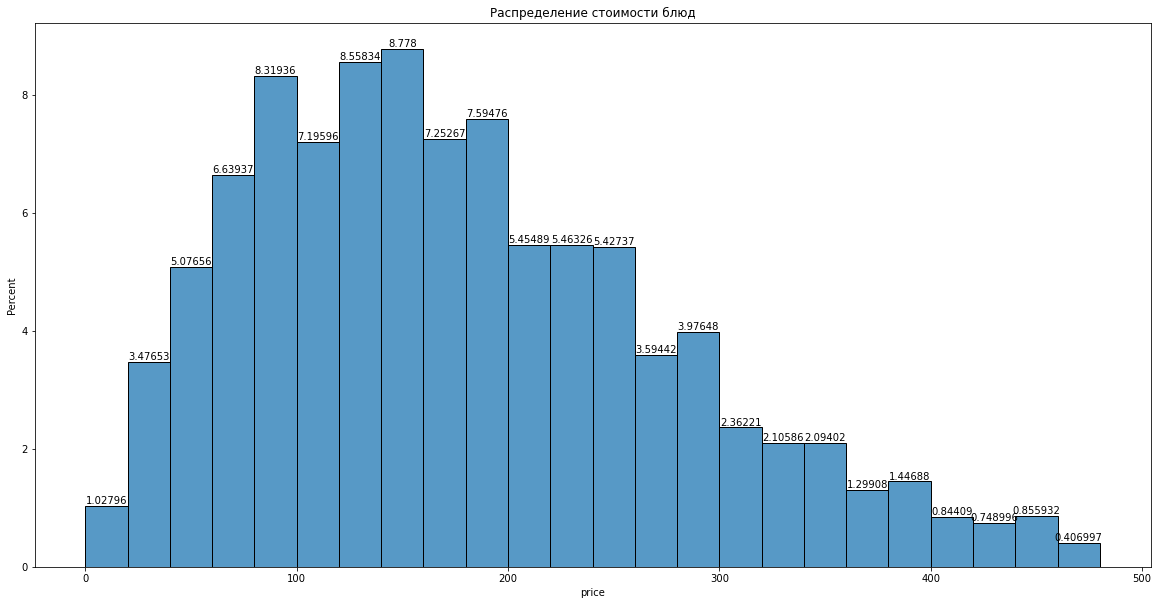

In [276]:
pylab.figure(figsize(20, 10))
plt.title('Распределение стоимости блюд')
ax=sns.histplot(df2['price'], stat='percent', binwidth=20)
ax.bar_label (ax.containers [ 0 ])

Распределение переменной price похоже на нормальное, но с длинным правым "хвостом".

### f_id

[Text(0, 0, '80.6965'), Text(0, 0, '14.7589'), Text(0, 0, '4.54457')]

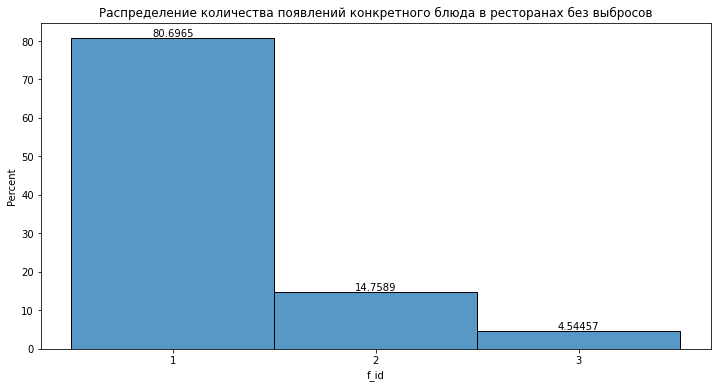

In [277]:
w=df2['f_id'].value_counts()
IQR = w.quantile(0.75) - w.quantile(0.25)
pylab.figure(figsize(12, 6))
plt.title('Распределение количества появлений конкретного блюда в ресторанах без выбросов')
plt.xticks(range(1, 4))
ax=sns.histplot(w[w<=w.quantile(0.75)+1.5*IQR], discrete=True, stat='percent')
ax.bar_label (ax.containers [ 0 ])

### r_id

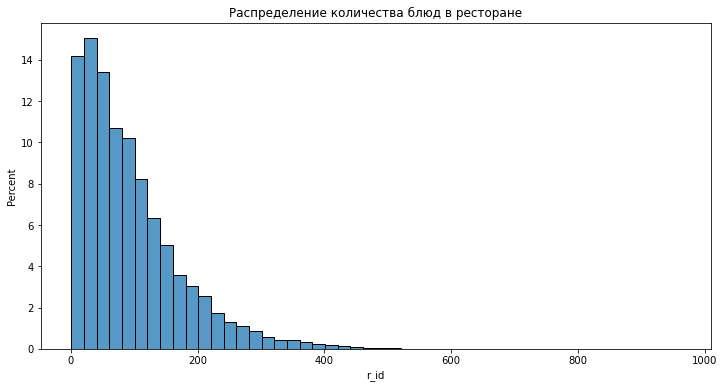

In [278]:
pylab.figure(figsize(12, 6))
plt.title('Распределение количества блюд в ресторане')
ax=sns.histplot(df2['r_id'].value_counts(), stat='percent', binwidth=20)

Распределение количества блюд в ресторанах не является нормальным.

### menu_id

[Text(0, 0, '87.0445'), Text(0, 0, '12.9555')]

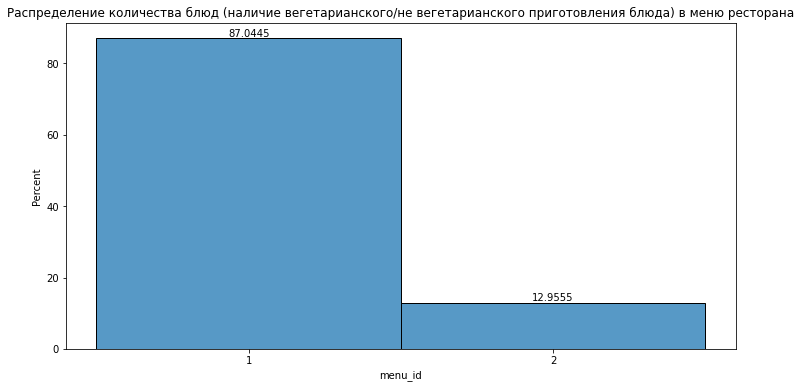

In [279]:
pylab.figure(figsize(12, 6))
plt.title('Распределение количества блюд (наличие вегетарианского/не вегетарианского приготовления блюда) в меню ресторана')
plt.xticks(range(1, 3))
ax=sns.histplot(df2['menu_id'].value_counts(), discrete=True, stat='percent', binwidth=1)
ax.bar_label (ax.containers [ 0 ])

### menu_cuisine

[Text(0, 0, '21.1164'),
 Text(0, 0, '2.63886'),
 Text(0, 0, '39.248'),
 Text(0, 0, '22.101'),
 Text(0, 0, '2.50391'),
 Text(0, 0, '4.06986'),
 Text(0, 0, '1.48607'),
 Text(0, 0, '0.556822'),
 Text(0, 0, '0.644109'),
 Text(0, 0, '1.78728'),
 Text(0, 0, '0.515479'),
 Text(0, 0, '0.487048'),
 Text(0, 0, '0.421256'),
 Text(0, 0, '0.831388'),
 Text(0, 0, '0.465415'),
 Text(0, 0, '0.403607'),
 Text(0, 0, '0.723498')]

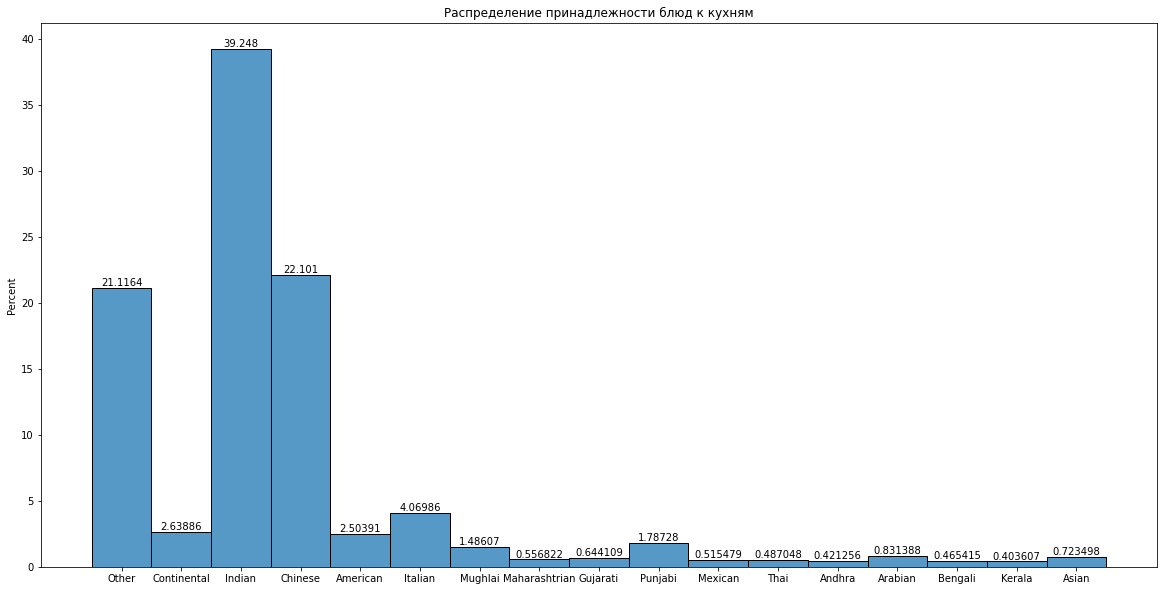

In [280]:
b=list(df2['menu_cuisine'])+list(df2[df2['menu_additional_cuisine']!='No']['menu_additional_cuisine'])
pylab.figure(figsize(20, 10))
plt.title('Распределение принадлежности блюд к кухням')
ax=sns.histplot(b, stat='percent', binwidth=1)
ax.bar_label (ax.containers [ 0 ])

### menu_additional_cuisine

[Text(0, 0, '70.3485'), Text(0, 0, '29.6515')]

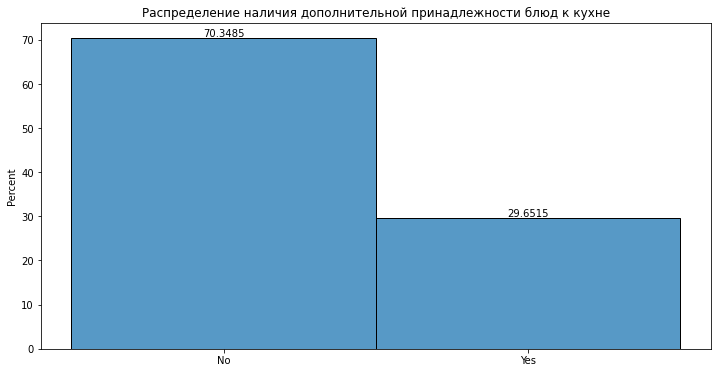

In [281]:
a=np.where(df2['menu_additional_cuisine']=='No', 'No', 'Yes')
pylab.figure(figsize(12, 6))
plt.title('Распределение наличия дополнительной принадлежности блюд к кухне')
ax=sns.histplot(a, stat='percent', binwidth=1)
ax.bar_label (ax.containers [ 0 ])

Посмотрим распределение переменной price по кухне блюда(menu_cuisine):

In [282]:
d=df2.groupby('menu_cuisine').agg({'price':['median', 'mean', 'std']}).reset_index()
d

menu_cuisine   price                        
                   median        mean         std
0        American  170.00  189.732178   97.325852
1          Andhra  220.00  201.976747   97.647911
2         Arabian  180.00  190.226467  108.768245
3           Asian  259.00  274.681932   98.302471
4         Bengali  199.00  206.326554   95.789761
5         Chinese  170.00  182.466737   94.547017
6     Continental  195.24  206.989312   98.422411
7        Gujarati  119.00  138.220888   95.853038
8          Indian  160.00  172.988365   98.647598
9         Italian  180.00  200.009519  103.807570
10         Kerala  170.00  166.939409   81.760314
11  Maharashtrian  140.00  151.683433   87.291422
12        Mexican  240.00  242.188389  116.417990
13        Mughlai  190.00  202.683353  113.699820
14          Other  143.00  165.129783  100.562785
15        Punjabi  160.00  169.289982   93.294147
16           Thai  200.00  221.645299  114.304349

/Users/sergeyvikulin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



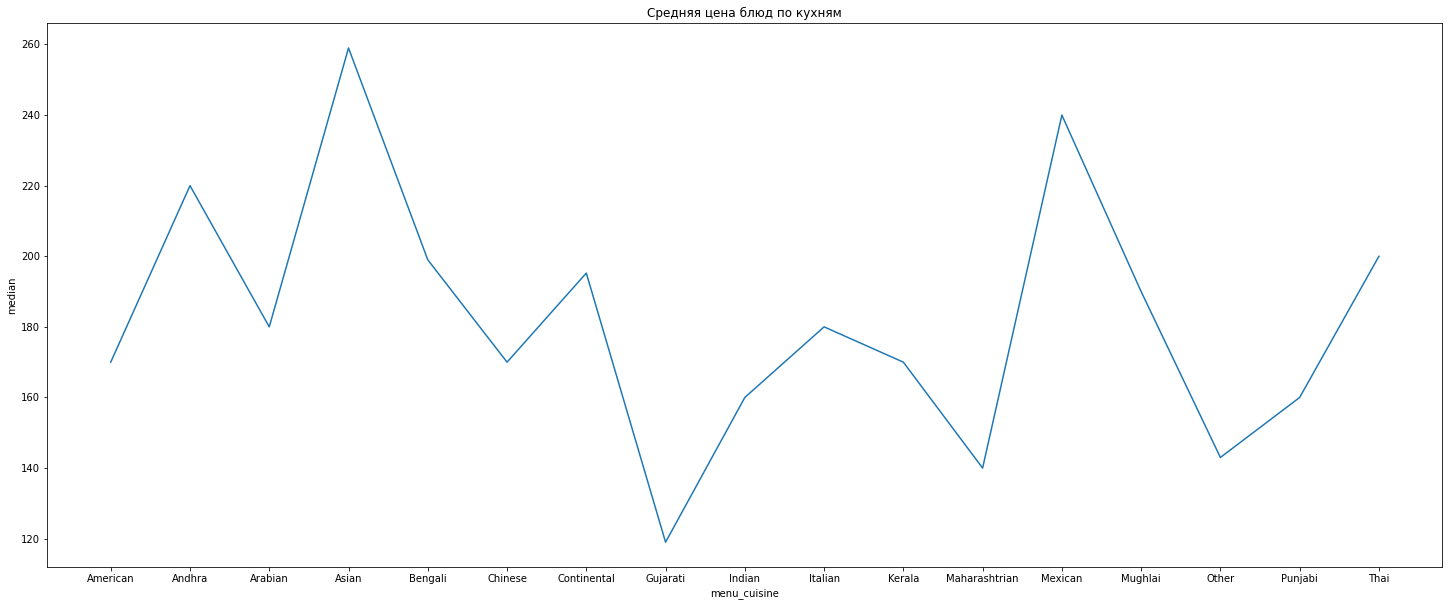

In [283]:
pylab.figure(figsize(25, 10))
plt.title('Средняя цена блюд по кухням')
ax=sns.lineplot(d['menu_cuisine'],d['price']['median'])

Протестируем гипотезу о равенстве средних значений price для групп: 

    1)Меню континентальной кухни
    2)Меню кухни Gujarati

Мы видим, что наши группы независимы, но распределения групп не являются нормальными, поэтому мы не можем применить t-test. Поэтому применим бакетное преобразование.

In [284]:
kstest(df2[df2['menu_cuisine']=='Continental']['price'], 'norm', 
       args=(df2[df2['menu_cuisine']=='Continental']['price'].mean(),
             df2[df2['menu_cuisine']=='Continental']['price'].std(ddof=1)))

KstestResult(statistic=0.0728892834316695, pvalue=1.830571722751198e-79, statistic_location=200.0, statistic_sign=1)

In [285]:
kstest(df2[df2['menu_cuisine']=='Gujarati']['price'], 'norm', 
       args=(df2[df2['menu_cuisine']=='Gujarati']['price'].mean(),
             df2[df2['menu_cuisine']=='Gujarati']['price'].std(ddof=1)))

KstestResult(statistic=0.11507854387478317, pvalue=4.224010506304024e-41, statistic_location=100.0, statistic_sign=1)

Разбиваем группы случайным образом на 100 бакетов:

In [286]:
from sklearn.model_selection import KFold
y1 = pd.DataFrame(df2[df2['menu_cuisine']=='Continental'], columns=df2.columns).reset_index(drop=True)
y2 = pd.DataFrame(df2[df2['menu_cuisine']=='Gujarati'], columns=df2.columns).reset_index(drop=True)
kf1 = KFold(n_splits=100, random_state=95, shuffle=True)
kf2 = KFold(n_splits=100, random_state=95, shuffle=True)
r1 = list(kf1.split(y1))
r2 = list(kf2.split(y2))
s1=[0]*100
s2=[0]*100
for j in range(len(r1)):
    for n in range(len(r1[j][1])):
        s1[j]=s1[j]+float(y1[y1.index==int(r1[j][1][n])]['price'])
for i in range(len(s1)):
    s1[i]=round(s1[i]/len(r1[i][1]),2)
for j in range(len(r2)):
    for n in range(len(r2[j][1])):
        s2[j]=s2[j]+float(y2[y2.index==int(r2[j][1][n])]['price'])
for i in range(len(s2)):
    s2[i]=round(s2[i]/len(r2[i][1]),2)
print('Количество элементов в бакете для df2[menu_cuisine]=Continental', {len(r1[-1][1])})
print('Количество элементов в бакете для df2[menu_cuisine]=Gujarati', {len(r2[-1][1])})

Количество элементов в бакете для df2[menu_cuisine]=Continental {171}
Количество элементов в бакете для df2[menu_cuisine]=Gujarati {35}


Согласно тесту Колмогорова-Смирнова и тесту Шапиро-Уилка нельзя отвергнуть гипотезу на любом разумном уровне значимости о том, что распределение бакетов первой группы является нормальным:

ShapiroResult(statistic=0.9880014061927795, pvalue=0.5083128213882446)
KstestResult(statistic=0.05463973764401797, pvalue=0.9103277805186718, statistic_location=214.06, statistic_sign=-1)


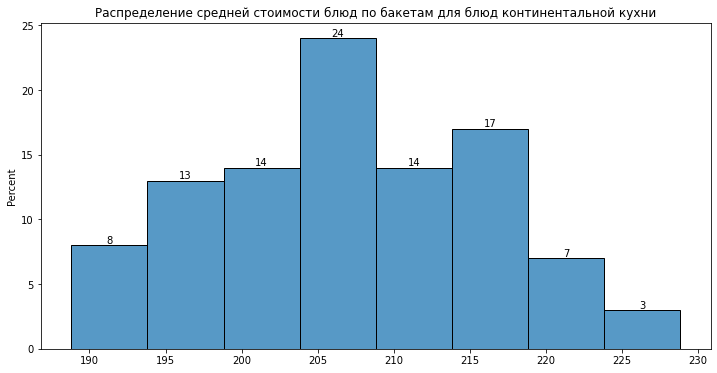

In [287]:
from scipy.stats import shapiro
pylab.figure(figsize(12, 6))
from scipy.stats import shapiro
plt.title('Распределение средней стоимости блюд по бакетам для блюд континентальной кухни')
ax=sns.histplot(s1, stat='percent', binwidth=5)
ax.bar_label (ax.containers [ 0 ])
print(shapiro(s1))
print(kstest(s1, 'norm', args=(mean(s1),std(s1,ddof=1))))

Согласно тесту Колмогорова-Смирнова и тесту Шапиро-Уилка нельзя отвергнуть гипотезу на любом разумном уровне значимости о том, что распределение бакетов второй группы является нормальным:

ShapiroResult(statistic=0.9947357773780823, pvalue=0.9677314162254333)
KstestResult(statistic=0.04919075598797022, pvalue=0.959078609525184, statistic_location=122.0, statistic_sign=-1)


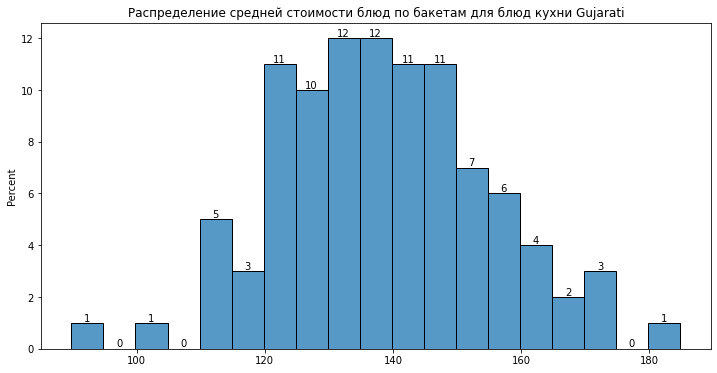

In [288]:
from scipy.stats import shapiro
pylab.figure(figsize(12, 6))
from scipy.stats import shapiro
plt.title('Распределение средней стоимости блюд по бакетам для блюд кухни Gujarati')
ax=sns.histplot(s2, stat='percent', binwidth=5)
ax.bar_label (ax.containers [ 0 ])
print(shapiro(s2))
print(kstest(s2, 'norm', args=(mean(s2),std(s2,ddof=1))))

Убедившись в нормальности распределений, проведем t-test о равенстве средних:

In [289]:
from scipy.stats import ttest_ind
ttest_ind(s1,s2)

Ttest_indResult(statistic=37.037579469734226, pvalue=5.804623159315093e-91)

На 1% уровне значимости можно отвергнуть гипотезу о равенстве средних. Следовательно, равенство средних значений price для групп: 

    1)Меню континентальной кухни
    2)Меню кухни Gujarati
    
**можно отвергнуть на 1% уровне значимости.**

Построим 99% доверительный интервал для разности средних. Видим, что с 99%-ной вероятностью блюда континентальной кухни в среднем  стоят больше, чем блюда кухни Gujarati, в интервале от 63.99 до 73.55 рупий.

In [290]:
diff=mean(s1)-mean(s2)
diff_sd=np.sqrt(var(s1, ddof=1)/100+var(s2, ddof=1)/100)
left, right=st.norm.interval(0.99, loc=diff, scale=diff_sd)
print(f'99% confidence interval: [{left} ; {right}]')

99% confidence interval: [63.9871098627045 ; 73.55249013729556]


### menu_food

[Text(0, 0, '8.6193'),
 Text(0, 0, '43.3427'),
 Text(0, 0, '7.03376'),
 Text(0, 0, '7.46877'),
 Text(0, 0, '8.01591'),
 Text(0, 0, '1.31416'),
 Text(0, 0, '2.93278'),
 Text(0, 0, '5.09136'),
 Text(0, 0, '2.45088'),
 Text(0, 0, '5.60686'),
 Text(0, 0, '0.865864'),
 Text(0, 0, '0.588745'),
 Text(0, 0, '0.88157'),
 Text(0, 0, '0.872509'),
 Text(0, 0, '0.600147'),
 Text(0, 0, '1.58781'),
 Text(0, 0, '1.41965'),
 Text(0, 0, '0.503797'),
 Text(0, 0, '0.803418')]

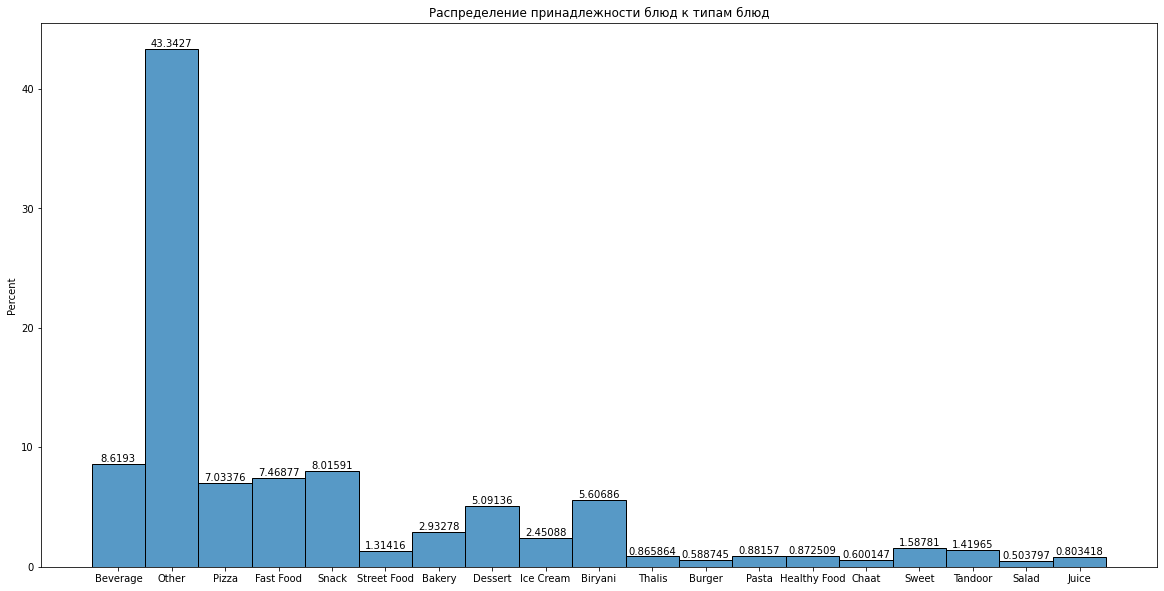

In [291]:
b=list(df2['menu_food'])+list(df2[df2['menu_additional_food']!='No']['menu_additional_food'])
pylab.figure(figsize(20, 10))
plt.title('Распределение принадлежности блюд к типам блюд')
ax=sns.histplot(b, stat='percent', binwidth=1)
ax.bar_label (ax.containers [ 0 ])

### menu_additional_food

[Text(0, 0, '17.9181'), Text(0, 0, '82.0819')]

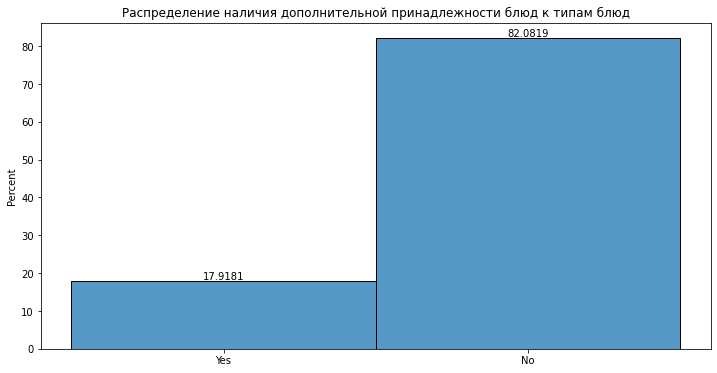

In [292]:
a=np.where(df2['menu_additional_food']=='No', 'No', 'Yes')
pylab.figure(figsize(12, 6))
plt.title('Распределение наличия дополнительной принадлежности блюд к типам блюд')
ax=sns.histplot(a, stat='percent', binwidth=1)
ax.bar_label (ax.containers [ 0 ])

Посмотрим распределение переменной price по типу блюда(menu_food):

In [293]:
d=df2.groupby('menu_food').agg({'price':['median', 'mean', 'std']}).reset_index()
d

menu_food  price                        
                 median        mean         std
0         Bakery  165.0  199.600595  129.078862
1       Beverage  150.0  164.244034   88.076144
2        Biryani  188.0  193.813640  104.117843
3         Burger  129.0  156.317445   91.227148
4          Chaat  110.0  133.951200   88.890838
5        Dessert  150.0  174.123901  108.096566
6      Fast Food  139.0  155.871983   90.435824
7   Healthy Food  229.0  225.506808   98.241023
8      Ice Cream  129.0  161.402219  106.584463
9          Juice  109.0  128.053409   71.172654
10         Other  170.0  181.686983   97.847635
11         Pasta  190.0  200.477422  100.542925
12         Pizza  179.0  196.655519  103.702102
13         Salad  229.0  224.813351  100.069179
14         Snack  129.0  147.246553   93.005671
15   Street Food  110.0  127.120649   77.906640
16         Sweet  130.0  150.606431   94.611032
17       Tandoor  190.0  196.289817  101.430125
18        Thalis  170.0  180.398239  100.454445

/Users/sergeyvikulin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



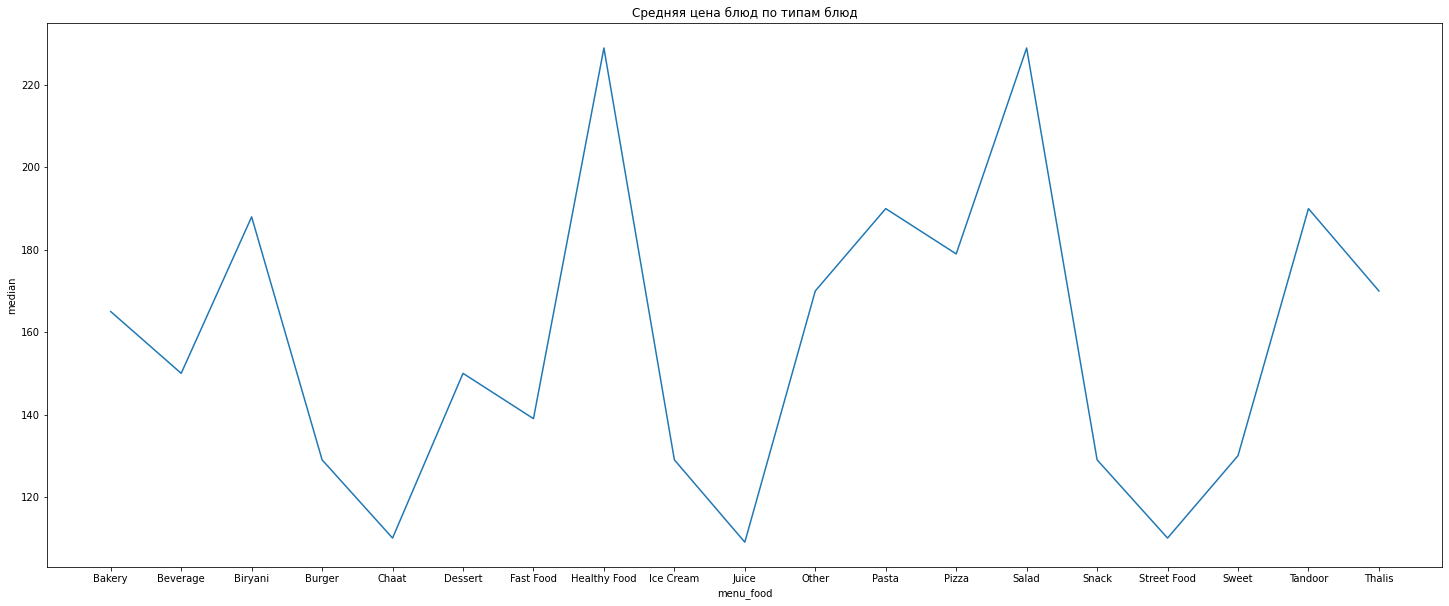

In [294]:
pylab.figure(figsize(25, 10))
plt.title('Средняя цена блюд по типам блюд')
ax=sns.lineplot(d['menu_food'],d['price']['median'])

Протестируем гипотезу о равенстве средних значений price для групп: 

    1)Меню со снеками
    2)Меню с фаст-фудом

Мы видим, что наши группы независимы, но распределения групп не являются нормальными, поэтому мы не можем применить t-test. Поэтому применим бакетное преобразование.

In [295]:
kstest(df2[df2['menu_food']=='Snack']['price'], 'norm', 
       args=(df2[df2['menu_food']=='Snack']['price'].mean(),
             df2[df2['menu_food']=='Snack']['price'].std(ddof=1)))

KstestResult(statistic=0.11165788718175873, pvalue=0.0, statistic_location=150.0, statistic_sign=1)

In [296]:
kstest(df2[df2['menu_food']=='Fast Food']['price'], 'norm', 
       args=(df2[df2['menu_food']=='Fast Food']['price'].mean(),
             df2[df2['menu_food']=='Fast Food']['price'].std(ddof=1)))

KstestResult(statistic=0.11065703076723676, pvalue=0.0, statistic_location=150.0, statistic_sign=1)

Разбиваем группы случайным образом на 100 бакетов:

In [297]:
from sklearn.model_selection import KFold
y1 = pd.DataFrame(df2[df2['menu_food']=='Snack'], columns=df2.columns).reset_index(drop=True)
y2 = pd.DataFrame(df2[df2['menu_food']=='Fast Food'], columns=df2.columns).reset_index(drop=True)
kf1 = KFold(n_splits=200, random_state=98, shuffle=True)
kf2 = KFold(n_splits=200, random_state=98, shuffle=True)
r1 = list(kf1.split(y1))
r2 = list(kf2.split(y2))
s1=[0]*200
s2=[0]*200
for j in range(len(r1)):
    for n in range(len(r1[j][1])):
        s1[j]=s1[j]+float(y1[y1.index==int(r1[j][1][n])]['price'])
for i in range(len(s1)):
    s1[i]=round(s1[i]/len(r1[i][1]),2)
for j in range(len(r2)):
    for n in range(len(r2[j][1])):
        s2[j]=s2[j]+float(y2[y2.index==int(r2[j][1][n])]['price'])
for i in range(len(s2)):
    s2[i]=round(s2[i]/len(r2[i][1]),2)
print('Количество элементов в бакете для df2[menu_food]=Snack', {len(r1[-1][1])})
print('Количество элементов в бакете для df2[menu_food]=Fast Food', {len(r2[-1][1])})

Количество элементов в бакете для df2[menu_food]=Snack {530}
Количество элементов в бакете для df2[menu_food]=Fast Food {349}


Согласно тесту Колмогорова-Смирнова и тесту Шапиро-Уилка нельзя отвергнуть гипотезу на любом разумном уровне значимости о том, что распределение бакетов первой группы является нормальным:

ShapiroResult(statistic=0.9888315796852112, pvalue=0.1200670599937439)
KstestResult(statistic=0.06439066833079721, pvalue=0.3627816422123151, statistic_location=149.06, statistic_sign=1)


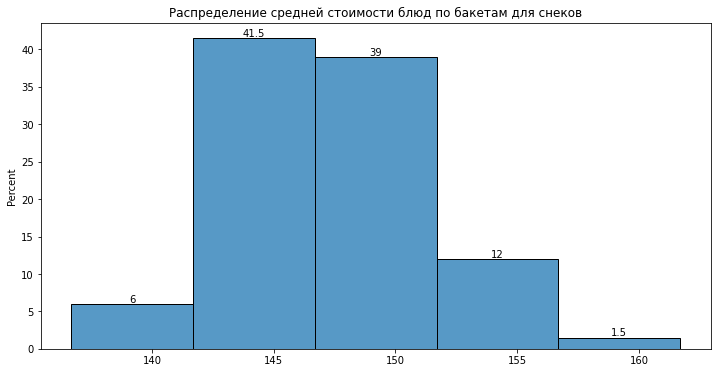

In [298]:
from scipy.stats import shapiro
pylab.figure(figsize(12, 6))
from scipy.stats import shapiro
plt.title('Распределение средней стоимости блюд по бакетам для снеков')
ax=sns.histplot(s1, stat='percent', binwidth=5)
ax.bar_label (ax.containers [ 0 ])
print(shapiro(s1))
print(kstest(s1, 'norm', args=(mean(s1),std(s1,ddof=1))))

Согласно тесту Колмогорова-Смирнова и тесту Шапиро-Уилка нельзя отвергнуть гипотезу на любом разумном уровне значимости о том, что распределение бакетов второй группы является нормальным:

ShapiroResult(statistic=0.9921978712081909, pvalue=0.3634125590324402)
KstestResult(statistic=0.037974505409443526, pvalue=0.9245727027398092, statistic_location=155.48, statistic_sign=1)


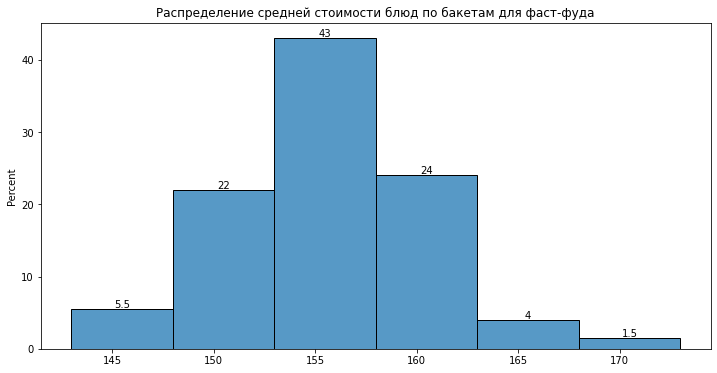

In [299]:
from scipy.stats import shapiro
pylab.figure(figsize(12, 6))
from scipy.stats import shapiro
plt.title('Распределение средней стоимости блюд по бакетам для фаст-фуда')
ax=sns.histplot(s2, stat='percent', binwidth=5)
ax.bar_label (ax.containers [ 0 ])
print(shapiro(s2))
print(kstest(s2, 'norm', args=(mean(s2),std(s2,ddof=1))))

Убедившись в нормальности распределений, проведем t-test о равенстве средних:

In [300]:
from scipy.stats import ttest_ind
ttest_ind(s1,s2)

Ttest_indResult(statistic=-19.937392577681706, pvalue=7.955594607603053e-62)

На 1% уровне значимости можно отвергнуть гипотезу о равенстве средних. Следовательно, равенство средних значений price для групп: 

    1)Меню со снеками
    2)Меню с фаст-фудом
    
**можно отвергнуть на 1% уровне значимости.**

Построим 99% доверительный интервал для разности средних. Видим, что с 99%-ной вероятностью снеки в среднем стоят меньше, чем фаст-фуд, в интервале от 7.51 до 9.74 рупий.

In [301]:
diff=mean(s1)-mean(s2)
diff_sd=np.sqrt(var(s1, ddof=1)/200+var(s2, ddof=1)/200)
left, right=st.norm.interval(0.99, loc=diff, scale=diff_sd)
print(f'99% confidence interval: [{left} ; {right}]')

99% confidence interval: [-9.740274421922102 ; -7.511425578077868]


### veg_or_non_veg

[Text(0, 0, '69.5305'), Text(0, 0, '30.3977'), Text(0, 0, '0.0717655')]

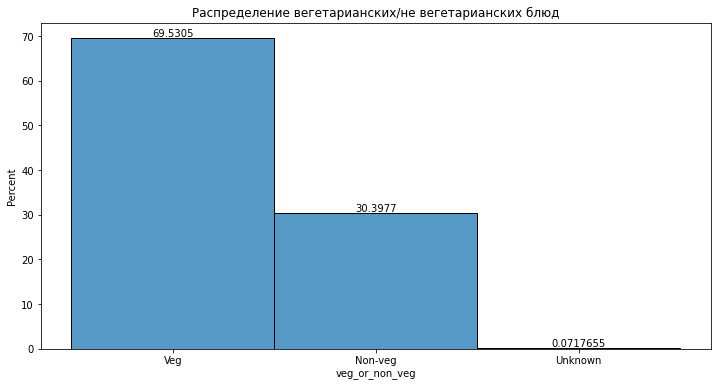

In [302]:
pylab.figure(figsize(12, 6))
plt.title('Распределение вегетарианских/не вегетарианских блюд')
ax=sns.histplot(df2['veg_or_non_veg'], stat='percent', binwidth=1)
ax.bar_label (ax.containers [ 0 ])

Посмотрим распределение переменной price по вегетарианской/ не вегетарианской еде(veg_or_non_veg):

In [303]:
d=df2.groupby('veg_or_non_veg').agg({'price':['median', 'mean', 'std']}).reset_index()
d

veg_or_non_veg  price                        
                 median        mean         std
0        Non-veg  199.0  206.728172  103.893196
1        Unknown  250.0  254.270471   86.603681
2            Veg  149.0  162.753928   93.697168

Протестируем гипотезу о равенстве средних значений price для групп: 

    1)Вегетарианские блюда
    2)Не вегетарианские блюда

Мы видим, что наши группы независимы, но распределения групп не являются нормальными, поэтому мы не можем применить t-test. Поэтому применим бакетное преобразование.

In [304]:
kstest(df2[df2['veg_or_non_veg']=='Veg']['price'], 'norm', 
       args=(df2[df2['veg_or_non_veg']=='Veg']['price'].mean(),
             df2[df2['veg_or_non_veg']=='Veg']['price'].std(ddof=1)))

KstestResult(statistic=0.08305355260636327, pvalue=0.0, statistic_location=150.0, statistic_sign=1)

In [305]:
kstest(df2[df2['veg_or_non_veg']=='Non-veg']['price'], 'norm', 
       args=(df2[df2['veg_or_non_veg']=='Non-veg']['price'].mean(),
             df2[df2['veg_or_non_veg']=='Non-veg']['price'].std(ddof=1)))

KstestResult(statistic=0.060715327501289995, pvalue=0.0, statistic_location=200.0, statistic_sign=1)

Разбиваем группы случайным образом на 200 бакетов:

In [306]:
from sklearn.model_selection import KFold
y1 = pd.DataFrame(df2[df2['veg_or_non_veg']=='Veg'], columns=df2.columns).reset_index(drop=True)
y2 = pd.DataFrame(df2[df2['veg_or_non_veg']=='Non-veg'], columns=df2.columns).reset_index(drop=True)
kf1 = KFold(n_splits=200, random_state=93, shuffle=True)
kf2 = KFold(n_splits=200, random_state=93, shuffle=True)
r1 = list(kf1.split(y1))
r2 = list(kf2.split(y2))
s1=[0]*200
s2=[0]*200
for j in range(len(r1)):
    for n in range(len(r1[j][1])):
        s1[j]=s1[j]+float(y1[y1.index==int(r1[j][1][n])]['price'])
for i in range(len(s1)):
    s1[i]=round(s1[i]/len(r1[i][1]),2)
for j in range(len(r2)):
    for n in range(len(r2[j][1])):
        s2[j]=s2[j]+float(y2[y2.index==int(r2[j][1][n])]['price'])
for i in range(len(s2)):
    s2[i]=round(s2[i]/len(r2[i][1]),2)
print('Количество элементов в бакете для df2[veg_or_non_veg]=Veg', {len(r1[-1][1])})
print('Количество элементов в бакете для df2[veg_or_non_veg]=Non-veg', {len(r2[-1][1])})

Количество элементов в бакете для df2[veg_or_non_veg]=Veg {3904}
Количество элементов в бакете для df2[veg_or_non_veg]=Non-veg {1706}


Согласно тесту Колмогорова-Смирнова и тесту Шапиро-Уилка нельзя отвергнуть гипотезу на любом разумном уровне значимости о том, что распределение бакетов первой группы является нормальным:

ShapiroResult(statistic=0.9916786551475525, pvalue=0.3093908727169037)
KstestResult(statistic=0.038973165086839345, pvalue=0.9098454134824377, statistic_location=163.16, statistic_sign=-1)


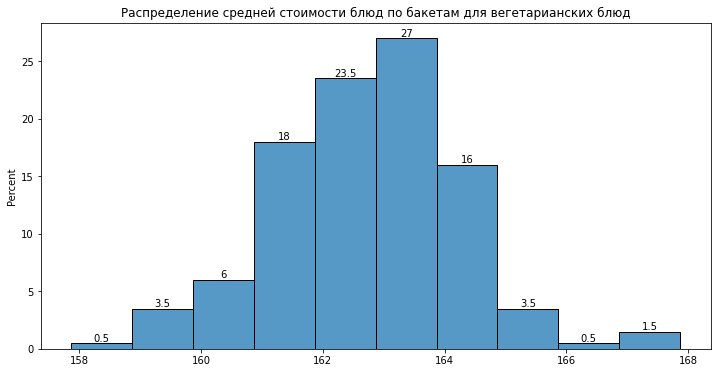

In [307]:
from scipy.stats import shapiro
pylab.figure(figsize(12, 6))
from scipy.stats import shapiro
plt.title('Распределение средней стоимости блюд по бакетам для вегетарианских блюд')
ax=sns.histplot(s1, stat='percent', binwidth=1)
ax.bar_label (ax.containers [ 0 ])
print(shapiro(s1))
print(kstest(s1, 'norm', args=(mean(s1),std(s1,ddof=1))))

Согласно тесту Колмогорова-Смирнова и тесту Шапиро-Уилка нельзя отвергнуть гипотезу на любом разумном уровне значимости о том, что распределение бакетов второй группы является нормальным:

ShapiroResult(statistic=0.9926843643188477, pvalue=0.42026394605636597)
KstestResult(statistic=0.041405263972160156, pvalue=0.8684674132474031, statistic_location=206.92, statistic_sign=1)


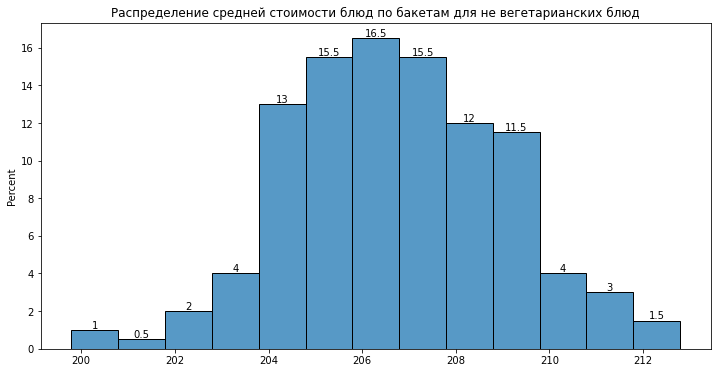

In [308]:
from scipy.stats import shapiro
pylab.figure(figsize(12, 6))
from scipy.stats import shapiro
plt.title('Распределение средней стоимости блюд по бакетам для не вегетарианских блюд')
ax=sns.histplot(s2, stat='percent', binwidth=1)
ax.bar_label (ax.containers [ 0 ])
print(shapiro(s2))
print(kstest(s2, 'norm', args=(mean(s2),std(s2,ddof=1))))

Убедившись в нормальности распределений, проведем t-test о равенстве средних:

In [309]:
from scipy.stats import ttest_ind
ttest_ind(s1,s2)

Ttest_indResult(statistic=-226.39063327795918, pvalue=0.0)

На 1% уровне значимости можно отвергнуть гипотезу о равенстве средних. Следовательно, равенство средних значений price для групп: 

    1)Вегетарианские блюда
    2)Не вегетарианские блюда
    
**можно отвергнуть на 1% уровне значимости.**

Построим 99% доверительный интервал для разности средних. Видим, что с 99%-ной вероятностью вегетарианские блюда в среднем стоят меньше, чем не вегетарианские, в интервале от 43.47 до 44.47 рупий.

In [310]:
diff=mean(s1)-mean(s2)
diff_sd=np.sqrt(var(s1, ddof=1)/200+var(s2, ddof=1)/200)
left, right=st.norm.interval(0.99, loc=diff, scale=diff_sd)
print(f'99% confidence interval: [{left} ; {right}]')

99% confidence interval: [-44.4747323083023 ; -43.474067691697705]


Корреляционная матрица таблицы df2:

<AxesSubplot:>

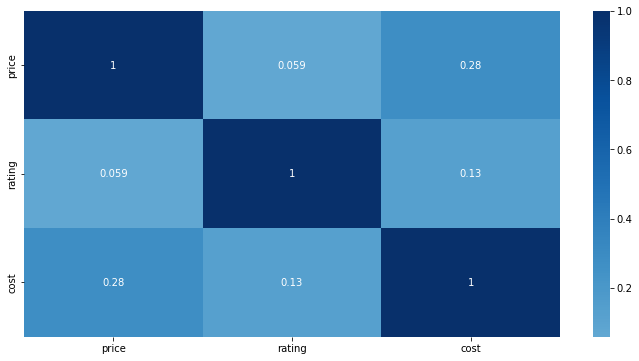

In [311]:
sns.heatmap(df2.corr(), 
            xticklabels=df2.corr().columns, yticklabels=df2.corr().columns, cmap='Blues', center=0, annot=True)

### Линейная регрессия

Построим линейную регрессию, где зависимой переменной будет цена блюда(price):

In [312]:
df2_new=df2.drop(['item', 'restaurant_name', 'city', 'menu_id', 'r_id','f_id'], axis=1)
df_reg = pd.get_dummies(df2_new, drop_first=True)
df_reg.head()


price  rating   cost  menu_cuisine_Andhra  menu_cuisine_Arabian  \
0   40.0     3.9  200.0                    0                     0   
1   40.0     3.9  200.0                    0                     0   
2   50.0     3.9  200.0                    0                     0   
3   65.0     3.9  200.0                    0                     0   
4   80.0     3.9  200.0                    0                     0   

   menu_cuisine_Asian  menu_cuisine_Bengali  menu_cuisine_Chinese  \
0                   0                     0                     0   
1                   0                     0                     0   
2                   0                     0                     0   
3                   0                     0                     0   
4                   0                     0                     0   

   menu_cuisine_Continental  menu_cuisine_Gujarati  ...  \
0                         0                      0  ...   
1                         0                      0  ...   
2                         0                      0  ...   
3                         0                      0  ...   
4                         0                      0  ...   

   additional_food_Kebab  additional_food_No  additional_food_Pasta  \
0                      0                   0                      0   
1                      0                   0                      0   
2                      0                   0                      0   
3                      0                   0                      0   
4                      0                   0                      0   

   additional_food_Pizza  additional_food_Salad  additional_food_Seafood  \
0                      1                      0                        0   
1                      1                      0                        0   
2                      1                      0                        0   
3                      1                      0                        0   
4                      1                      0                        0   

   additional_food_Street Food  additional_food_Sweet  \
0                            0                      0   
1                            0                      0   
2                            0                      0   
3                            0                      0   
4                            0                      0   

   additional_food_Tandoor  additional_food_Thalis  
0                        0                       0  
1                        0                       0  
2                        0                       0  
3                        0                       0  
4                        0                       0  

[5 rows x 139 columns]

In [313]:
cols = df_reg.columns
cols = [i.replace(' ', '_') for i in cols]
cols = [i.replace('+', '') for i in cols]
df_reg.columns = cols

df2_reg = df_reg.drop('price', axis=1)
text = ''
for i in list(df2_reg.columns):
    text += f'+ {i} '
text = text[1:]

Видим, что значимыми на 5% уровне являются коэффициенты: rating, cost, menu_cuisine_Arabian,
menu_cuisine_Bengali, menu_additional_cuisine_Arabian, veg_or_non_veg_Unknown, veg_or_non_veg_Veg,      rating_count_1K_ratings, rating_count_20_ratings, rating_count_50_ratings, rating_count_500_ratings,
rating_count_5K_ratings, rating_count_Too_Few_Ratings, cuisine_Arabian, cuisine_Bengali, food_Snack, additional_cuisine_Arabian.
Однако модель крайне плохо объясняет зависимую переменную, так как R2=0.143<0.5. Скорее всего это связано с малым количеством числовых переменных, коррелирующих с price(например, нет цен на ингредиенты).

In [314]:
ols1 = smf.ols(f'price ~ {text}', data=df_reg).fit()
print(ols1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     1412.
Date:                Mon, 07 Aug 2023   Prob (F-statistic):               0.00
Time:                        15:46:10   Log-Likelihood:            -6.6684e+06
No. Observations:             1123103   AIC:                         1.334e+07
Df Residuals:                 1122970   BIC:                         1.334e+07
Df Model:                         132                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

# Продуктовые метрики

In [315]:
df1

order_date  sales_qty  sales_amount user_id    r_id  \
1       2019-03-07          1           130   49226  555824   
2       2018-04-06          1           875    5321  158203   
4       2018-04-17          2          2676    5321  399517   
5       2018-04-11          1           583   21343  187912   
7       2017-10-16          1            32   75378  532347   
...            ...        ...           ...     ...     ...   
148656  2019-01-11          1          2884   40949  181681   
148657  2019-01-11          1          1625    9221  197786   
148659  2019-01-17          1          1523   53604  242762   
148660  2019-01-23          1          1477    3414  562647   
148661  2019-01-24          1          2282   76103  418989   

                      name  Age Gender Marital Status      Occupation  ...  \
1            Teresa Garcia   27   Male        Married  Self Employeed  ...   
2          Donald Anderson   24   Male        Married        Employee  ...   
4          Donald Anderson   24   Male        Married        Employee  ...   
5               Scott Cruz   22   Male         Single         Student  ...   
7       Heather Richardson   28   Male        Married        Employee  ...   
...                    ...  ...    ...            ...             ...  ...   
148656       Nicole Cooper   25   Male         Single  Self Employeed  ...   
148657           Joy Smith   24   Male         Single         Student  ...   
148659      Aaron Mccarthy   25   Male         Single         Student  ...   
148660   Mr. Reginald Chen   23   Male         Single         Student  ...   
148661     Kyle Pennington   22   Male         Single         Student  ...   

                    city rating     rating_count    cost      cuisine  \
1       Aminabad,Lucknow    3.9  Too Few Ratings   250.0     American   
2                 Abohar    3.8     100+ ratings   100.0        Other   
4         Akota,Vadodara    3.9  Too Few Ratings  1000.0      Chinese   
5                 Abohar    3.7      20+ ratings   250.0       Indian   
7        Alipore,Kolkata    3.9  Too Few Ratings   150.0      Chinese   
...                  ...    ...              ...     ...          ...   
148656          Yavatmal    3.9  Too Few Ratings   200.0       Indian   
148657          Yavatmal    3.9  Too Few Ratings   200.0        Other   
148659          Yavatmal    3.9  Too Few Ratings   250.0        Other   
148660          Yavatmal    3.9  Too Few Ratings   300.0        Other   
148661          Yavatmal    3.9  Too Few Ratings   250.0  Continental   

             food additional_cuisine  additional_food log_sales_amount weekday  
1       Fast Food                 No               No         4.875197       4  
2        Beverage                 No               No         6.775366       5  
4           Other             Indian               No         7.892452       2  
5       Fast Food                 No               No         6.369901       3  
7           Other             Indian               No         3.496508       1  
...           ...                ...              ...              ...     ...  
148656      Other                 No               No         7.967280       5  
148657     Bakery                 No               No         7.393878       5  
148659  Fast Food                 No            Pizza         7.329094       4  
148660      Pizza                 No               No         7.298445       3  
148661      Other                 No               No         7.733246       4  

[109734 rows x 24 columns]

## Конверсия в покупку

In [316]:
len(paying_users)/100000

0.66832

## ARPU

In [317]:
(df1['sales_amount'].sum()+outliers1['sales_amount'].sum())/100000

9643.07241

## ARPPU

In [318]:
(df1['sales_amount'].sum()+outliers1['sales_amount'].sum())/len(paying_users)

14428.825128680872

## DAU

In [319]:
qq=pd.concat([df1,outliers1], axis=0).reset_index(drop=True)
qq

order_date  sales_qty  sales_amount user_id    r_id  \
0       2019-03-07          1           130   49226  555824   
1       2018-04-06          1           875    5321  158203   
2       2018-04-17          2          2676    5321  399517   
3       2018-04-11          1           583   21343  187912   
4       2017-10-16          1            32   75378  532347   
...            ...        ...           ...     ...     ...   
148657  2018-12-14          3          9838   94394  389207   
148658  2018-12-21          4          9574   24832  234395   
148659  2018-12-28          4         11315   19731  488071   
148660  2019-01-04          2          4245    8303  185298   
148661  2019-01-16          2          3606   66229  211591   

                      name  Age  Gender Marital Status      Occupation  ...  \
0            Teresa Garcia   27    Male        Married  Self Employeed  ...   
1          Donald Anderson   24    Male        Married        Employee  ...   
2          Donald Anderson   24    Male        Married        Employee  ...   
3               Scott Cruz   22    Male         Single         Student  ...   
4       Heather Richardson   28    Male        Married        Employee  ...   
...                    ...  ...     ...            ...             ...  ...   
148657          John Smith   18    Male         Single         Student  ...   
148658        Charles Gill   23    Male         Single         Student  ...   
148659      Carlos Blevins   26    Male        Married        Employee  ...   
148660      Jeffrey Wagner   24  Female        Married  Self Employeed  ...   
148661       Felicia Walls   22    Male         Single         Student  ...   

                    city rating     rating_count    cost   cuisine       food  \
0       Aminabad,Lucknow    3.9  Too Few Ratings   250.0  American  Fast Food   
1                 Abohar    3.8     100+ ratings   100.0     Other   Beverage   
2         Akota,Vadodara    3.9  Too Few Ratings  1000.0   Chinese      Other   
3                 Abohar    3.7      20+ ratings   250.0    Indian  Fast Food   
4        Alipore,Kolkata    3.9  Too Few Ratings   150.0   Chinese      Other   
...                  ...    ...              ...     ...       ...        ...   
148657      Yamuna-nagar    3.6      20+ ratings   200.0     Other      Snack   
148658          Yavatmal    3.5      50+ ratings   100.0   Chinese      Other   
148659          Yavatmal    3.9  Too Few Ratings   100.0     Other      Snack   
148660          Yavatmal    3.7      50+ ratings   150.0     Other      Snack   
148661          Yavatmal    3.9  Too Few Ratings   200.0     Other   Beverage   

       additional_cuisine  additional_food log_sales_amount weekday  
0                      No               No         4.875197       4  
1                      No               No         6.775366       5  
2                  Indian               No         7.892452       2  
3                      No               No         6.369901       3  
4                  Indian               No         3.496508       1  
...                   ...              ...              ...     ...  
148657                 No          Dessert              NaN     NaN  
148658           American               No              NaN     NaN  
148659                 No               No              NaN     NaN  
148660                 No        Fast Food              NaN     NaN  
148661                 No               No              NaN     NaN  

[148662 rows x 24 columns]

Dau для каждого дня, если дата отсутствует, то Dau=0 для этого дня:

In [320]:
dau = pd.DataFrame(qq.groupby(['order_date'])['user_id'].nunique()).reset_index()
dau.columns=['date', 'number_of_users']
dau=dau.sort_values('date')
dau=dau.reset_index(drop=True)
dau

date  number_of_users
0    2017-10-04               27
1    2017-10-05               95
2    2017-10-06              146
3    2017-10-09              106
4    2017-10-10              181
..          ...              ...
801  2020-06-22               82
802  2020-06-23               26
803  2020-06-24               10
804  2020-06-25                5
805  2020-06-26                6

[806 rows x 2 columns]

Средний Dau:

In [321]:
delta=(dau['date'].max()-dau['date'].min()).days
dau['number_of_users'].sum()/(delta+1)

148.95887662988966

## WAU

In [322]:
i=dau['date'].min()
wau_dates=[]
while i<dau['date'].max():
    wau_dates.append(i)
    i=i+datetime.timedelta(weeks=1)

In [323]:
wau_number=[0]*len(wau_dates)
for i in range(1,len(wau_dates)+1):
    if i==len(wau_dates):
        wau_number[i-1]=qq[qq['order_date']>=wau_dates[i-1]]['user_id'].nunique()
        
    else:
        wau_number[i-1]=qq[(qq['order_date']<wau_dates[i])&
                        (qq['order_date']>=wau_dates[i-1])]['user_id'].nunique()

Wau для каждой недели, начиная с даты в таблице:

In [324]:
wau=pd.DataFrame({'date':wau_dates, 'number_of_users':wau_number})
wau

date  number_of_users
0    2017-10-04              554
1    2017-10-11             1159
2    2017-10-18             1249
3    2017-10-25             1272
4    2017-11-01             1133
..          ...              ...
138  2020-05-27              743
139  2020-06-03             1072
140  2020-06-10              910
141  2020-06-17              462
142  2020-06-24               21

[143 rows x 2 columns]

Средний Wau:

In [325]:
wau['number_of_users'].sum()/(len(wau))

1034.1818181818182

## MAU

In [326]:
from dateutil.relativedelta import relativedelta
i=dau['date'].min()
mau_dates=[]
while i<dau['date'].max():
    mau_dates.append(i)
    i=i+relativedelta(months=1)

In [327]:
mau_number=[0]*len(mau_dates)
for i in range(1,len(mau_dates)+1):
    if i==len(mau_dates):
        mau_number[i-1]=qq[qq['order_date']>=mau_dates[i-1]]['user_id'].nunique()
        
    else:
        mau_number[i-1]=qq[(qq['order_date']<mau_dates[i])&
                        (qq['order_date']>=mau_dates[i-1])]['user_id'].nunique()

Mau для каждого месяца, начиная с даты в таблицы:

In [328]:
mau=pd.DataFrame({'date':mau_dates, 'number_of_users':mau_number})
mau

date  number_of_users
0   2017-10-04             4812
1   2017-11-04             4947
2   2017-12-04             4996
3   2018-01-04             5264
4   2018-02-04             4789
5   2018-03-04             4901
6   2018-04-04             5193
7   2018-05-04             4864
8   2018-06-04             5548
9   2018-07-04             5565
10  2018-08-04             4631
11  2018-09-04             5075
12  2018-10-04             4711
13  2018-11-04             4651
14  2018-12-04             4355
15  2019-01-04             4474
16  2019-02-04             4487
17  2019-03-04             4767
18  2019-04-04             4140
19  2019-05-04             4359
20  2019-06-04             4557
21  2019-07-04             4637
22  2019-08-04             3860
23  2019-09-04             4219
24  2019-10-04             3604
25  2019-11-04             4078
26  2019-12-04             3346
27  2020-01-04             3683
28  2020-02-04             4049
29  2020-03-04             3549
30  2020-04-04             3127
31  2020-05-04             3831
32  2020-06-04             2280

Средний Mau:

In [329]:
mau['number_of_users'].sum()/(len(mau))

4404.515151515152

## Sticky factor

Недельный Sticky factor:

In [330]:
(dau['number_of_users'].sum()/(delta+1))/(wau['number_of_users'].sum()/(len(wau)))

0.14403548197334617

Месячный sticky factor:

In [331]:
(dau['number_of_users'].sum()/(delta+1))/(mau['number_of_users'].sum()/(len(mau)))

0.033819585472114416

## Retention

In [332]:
qq

order_date  sales_qty  sales_amount user_id    r_id  \
0       2019-03-07          1           130   49226  555824   
1       2018-04-06          1           875    5321  158203   
2       2018-04-17          2          2676    5321  399517   
3       2018-04-11          1           583   21343  187912   
4       2017-10-16          1            32   75378  532347   
...            ...        ...           ...     ...     ...   
148657  2018-12-14          3          9838   94394  389207   
148658  2018-12-21          4          9574   24832  234395   
148659  2018-12-28          4         11315   19731  488071   
148660  2019-01-04          2          4245    8303  185298   
148661  2019-01-16          2          3606   66229  211591   

                      name  Age  Gender Marital Status      Occupation  ...  \
0            Teresa Garcia   27    Male        Married  Self Employeed  ...   
1          Donald Anderson   24    Male        Married        Employee  ...   
2          Donald Anderson   24    Male        Married        Employee  ...   
3               Scott Cruz   22    Male         Single         Student  ...   
4       Heather Richardson   28    Male        Married        Employee  ...   
...                    ...  ...     ...            ...             ...  ...   
148657          John Smith   18    Male         Single         Student  ...   
148658        Charles Gill   23    Male         Single         Student  ...   
148659      Carlos Blevins   26    Male        Married        Employee  ...   
148660      Jeffrey Wagner   24  Female        Married  Self Employeed  ...   
148661       Felicia Walls   22    Male         Single         Student  ...   

                    city rating     rating_count    cost   cuisine       food  \
0       Aminabad,Lucknow    3.9  Too Few Ratings   250.0  American  Fast Food   
1                 Abohar    3.8     100+ ratings   100.0     Other   Beverage   
2         Akota,Vadodara    3.9  Too Few Ratings  1000.0   Chinese      Other   
3                 Abohar    3.7      20+ ratings   250.0    Indian  Fast Food   
4        Alipore,Kolkata    3.9  Too Few Ratings   150.0   Chinese      Other   
...                  ...    ...              ...     ...       ...        ...   
148657      Yamuna-nagar    3.6      20+ ratings   200.0     Other      Snack   
148658          Yavatmal    3.5      50+ ratings   100.0   Chinese      Other   
148659          Yavatmal    3.9  Too Few Ratings   100.0     Other      Snack   
148660          Yavatmal    3.7      50+ ratings   150.0     Other      Snack   
148661          Yavatmal    3.9  Too Few Ratings   200.0     Other   Beverage   

       additional_cuisine  additional_food log_sales_amount weekday  
0                      No               No         4.875197       4  
1                      No               No         6.775366       5  
2                  Indian               No         7.892452       2  
3                      No               No         6.369901       3  
4                  Indian               No         3.496508       1  
...                   ...              ...              ...     ...  
148657                 No          Dessert              NaN     NaN  
148658           American               No              NaN     NaN  
148659                 No               No              NaN     NaN  
148660                 No        Fast Food              NaN     NaN  
148661                 No               No              NaN     NaN  

[148662 rows x 24 columns]

Сделаем для каждого пользователя показатель CohortMonth, который будет показывать, месяц первой покупки соответствующего пользователя:

In [333]:

def get_month(x): return datetime.datetime(x.year, x.month, 4) 

qq['order_month'] = qq['order_date'].apply(get_month) 

grouping = qq.groupby('user_id')['order_month'] 


qq['CohortMonth'] = grouping.transform('min')
qq

order_date  sales_qty  sales_amount user_id    r_id  \
0       2019-03-07          1           130   49226  555824   
1       2018-04-06          1           875    5321  158203   
2       2018-04-17          2          2676    5321  399517   
3       2018-04-11          1           583   21343  187912   
4       2017-10-16          1            32   75378  532347   
...            ...        ...           ...     ...     ...   
148657  2018-12-14          3          9838   94394  389207   
148658  2018-12-21          4          9574   24832  234395   
148659  2018-12-28          4         11315   19731  488071   
148660  2019-01-04          2          4245    8303  185298   
148661  2019-01-16          2          3606   66229  211591   

                      name  Age  Gender Marital Status      Occupation  ...  \
0            Teresa Garcia   27    Male        Married  Self Employeed  ...   
1          Donald Anderson   24    Male        Married        Employee  ...   
2          Donald Anderson   24    Male        Married        Employee  ...   
3               Scott Cruz   22    Male         Single         Student  ...   
4       Heather Richardson   28    Male        Married        Employee  ...   
...                    ...  ...     ...            ...             ...  ...   
148657          John Smith   18    Male         Single         Student  ...   
148658        Charles Gill   23    Male         Single         Student  ...   
148659      Carlos Blevins   26    Male        Married        Employee  ...   
148660      Jeffrey Wagner   24  Female        Married  Self Employeed  ...   
148661       Felicia Walls   22    Male         Single         Student  ...   

           rating_count    cost   cuisine       food additional_cuisine  \
0       Too Few Ratings   250.0  American  Fast Food                 No   
1          100+ ratings   100.0     Other   Beverage                 No   
2       Too Few Ratings  1000.0   Chinese      Other             Indian   
3           20+ ratings   250.0    Indian  Fast Food                 No   
4       Too Few Ratings   150.0   Chinese      Other             Indian   
...                 ...     ...       ...        ...                ...   
148657      20+ ratings   200.0     Other      Snack                 No   
148658      50+ ratings   100.0   Chinese      Other           American   
148659  Too Few Ratings   100.0     Other      Snack                 No   
148660      50+ ratings   150.0     Other      Snack                 No   
148661  Too Few Ratings   200.0     Other   Beverage                 No   

        additional_food log_sales_amount  weekday order_month CohortMonth  
0                    No         4.875197        4  2019-03-04  2017-10-04  
1                    No         6.775366        5  2018-04-04  2018-04-04  
2                    No         7.892452        2  2018-04-04  2018-04-04  
3                    No         6.369901        3  2018-04-04  2018-04-04  
4                    No         3.496508        1  2017-10-04  2017-10-04  
...                 ...              ...      ...         ...         ...  
148657          Dessert              NaN      NaN  2018-12-04  2018-12-04  
148658               No              NaN      NaN  2018-12-04  2018-12-04  
148659               No              NaN      NaN  2018-12-04  2018-12-04  
148660        Fast Food              NaN      NaN  2019-01-04  2019-01-04  
148661               No              NaN      NaN  2019-01-04  2019-01-04  

[148662 rows x 26 columns]

На основе показателя CohortMonth разделим заказы на когорты, где когорта обозначает разницу между месяцем покупки и CohortMonth(для удобства добавим +1,  то есть заказ, сделанный в тот же месяц, что и его CohortMonth, будет иметь 1-ую когорту):

In [334]:
def get_date_int(df, column):
    year=[0]*148662
    month=[0]*148662
    day=[0]*148662
    for i in range(len(df)):
        year[i]=df[column][i].year
        month[i]=df[column][i].month
        day[i]=df[column][i].day
    return year, month, day

order_year, order_month, _ = get_date_int(qq, 'order_month')
cohort_year, cohort_month, _ = get_date_int(qq, 'CohortMonth')
years_diff=[0]*148662
months_diff=[0]*148662

for i in range(len(order_year)):
    years_diff[i] = order_year[i] - cohort_year[i]
    months_diff[i] = order_month[i] - cohort_month[i]


""" Extract the difference in months from all previous values
 "+1" in addeded at the end so that first month is marked as 1 instead of 0 for easier interpretation. 
 """
CohortIndex=[0]*148662
for i in range(len(years_diff)):
    CohortIndex[i] = years_diff[i] * 12 + months_diff[i]  + 1 
qq['CohortIndex']=CohortIndex
qq

order_date  sales_qty  sales_amount user_id    r_id  \
0       2019-03-07          1           130   49226  555824   
1       2018-04-06          1           875    5321  158203   
2       2018-04-17          2          2676    5321  399517   
3       2018-04-11          1           583   21343  187912   
4       2017-10-16          1            32   75378  532347   
...            ...        ...           ...     ...     ...   
148657  2018-12-14          3          9838   94394  389207   
148658  2018-12-21          4          9574   24832  234395   
148659  2018-12-28          4         11315   19731  488071   
148660  2019-01-04          2          4245    8303  185298   
148661  2019-01-16          2          3606   66229  211591   

                      name  Age  Gender Marital Status      Occupation  ...  \
0            Teresa Garcia   27    Male        Married  Self Employeed  ...   
1          Donald Anderson   24    Male        Married        Employee  ...   
2          Donald Anderson   24    Male        Married        Employee  ...   
3               Scott Cruz   22    Male         Single         Student  ...   
4       Heather Richardson   28    Male        Married        Employee  ...   
...                    ...  ...     ...            ...             ...  ...   
148657          John Smith   18    Male         Single         Student  ...   
148658        Charles Gill   23    Male         Single         Student  ...   
148659      Carlos Blevins   26    Male        Married        Employee  ...   
148660      Jeffrey Wagner   24  Female        Married  Self Employeed  ...   
148661       Felicia Walls   22    Male         Single         Student  ...   

          cost   cuisine       food additional_cuisine additional_food  \
0        250.0  American  Fast Food                 No              No   
1        100.0     Other   Beverage                 No              No   
2       1000.0   Chinese      Other             Indian              No   
3        250.0    Indian  Fast Food                 No              No   
4        150.0   Chinese      Other             Indian              No   
...        ...       ...        ...                ...             ...   
148657   200.0     Other      Snack                 No         Dessert   
148658   100.0   Chinese      Other           American              No   
148659   100.0     Other      Snack                 No              No   
148660   150.0     Other      Snack                 No       Fast Food   
148661   200.0     Other   Beverage                 No              No   

        log_sales_amount weekday  order_month CohortMonth CohortIndex  
0               4.875197       4   2019-03-04  2017-10-04          18  
1               6.775366       5   2018-04-04  2018-04-04           1  
2               7.892452       2   2018-04-04  2018-04-04           1  
3               6.369901       3   2018-04-04  2018-04-04           1  
4               3.496508       1   2017-10-04  2017-10-04           1  
...                  ...     ...          ...         ...         ...  
148657               NaN     NaN   2018-12-04  2018-12-04           1  
148658               NaN     NaN   2018-12-04  2018-12-04           1  
148659               NaN     NaN   2018-12-04  2018-12-04           1  
148660               NaN     NaN   2019-01-04  2019-01-04           1  
148661               NaN     NaN   2019-01-04  2019-01-04           1  

[148662 rows x 27 columns]

Распределение количества пользователей в каждой когорте и каждом CohortMonth:

In [335]:

grouping = qq.groupby(['CohortMonth', 'CohortIndex'])


cohort_data = grouping['user_id'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()

cohort_counts = cohort_data.pivot(index='CohortMonth',
                                 columns ='CohortIndex',
                                 values = 'user_id')


In [336]:
cohort_counts.round(1)

CohortIndex      1      2      3      4      5      6      7      8      9   \
CohortMonth                                                                   
2017-10-04   4173.0  179.0  172.0  190.0  194.0  209.0  207.0  218.0  206.0   
2017-11-04   5152.0  244.0  257.0  258.0  237.0  251.0  263.0  280.0  255.0   
2017-12-04   4412.0  212.0  204.0  236.0  198.0  227.0  237.0  251.0  252.0   
2018-01-04   4485.0  213.0  225.0  227.0  243.0  241.0  242.0  234.0  209.0   
2018-02-04   4000.0  214.0  210.0  199.0  225.0  206.0  209.0  189.0  198.0   
2018-03-04   3955.0  205.0  220.0  192.0  202.0  207.0  187.0  189.0  178.0   
2018-04-04   3656.0  183.0  181.0  193.0  182.0  166.0  201.0  176.0  166.0   
2018-05-04   3571.0  189.0  184.0  179.0  191.0  195.0  152.0  129.0  168.0   
2018-06-04   3611.0  188.0  188.0  159.0  188.0  160.0  161.0  166.0  149.0   
2018-07-04   3328.0  152.0  138.0  174.0  157.0  158.0  156.0  145.0  150.0   
2018-08-04   3123.0  135.0  152.0  153.0  130.0  155.0  140.0  137.0  131.0   
2018-09-04   2680.0  135.0  113.0  112.0  121.0  110.0  118.0  120.0  103.0   
2018-10-04   2665.0  123.0  118.0  120.0  106.0  128.0  120.0  108.0  130.0   
2018-11-04   2391.0  107.0   91.0  111.0   93.0   94.0  111.0   87.0  101.0   
2018-12-04   2076.0  104.0   95.0   99.0   87.0  111.0   83.0  104.0   77.0   
2019-01-04   2077.0   82.0   98.0   86.0   89.0   87.0   95.0   86.0   78.0   
2019-02-04   2019.0  103.0   79.0   91.0   86.0   92.0   81.0   73.0   83.0   
2019-03-04   1909.0   82.0   98.0   73.0   95.0   76.0   89.0   77.0   78.0   
2019-04-04   1781.0   82.0   70.0  109.0   62.0   64.0   69.0   56.0   64.0   
2019-05-04   1797.0   84.0   94.0   84.0   79.0   72.0   72.0   59.0   72.0   
2019-06-04   1602.0   67.0   78.0   69.0   76.0   57.0   41.0   57.0   71.0   
2019-07-04   1664.0   60.0   63.0   58.0   67.0   48.0   61.0   77.0   60.0   
2019-08-04   1352.0   53.0   50.0   36.0   41.0   57.0   57.0   42.0   43.0   
2019-09-04   1321.0   63.0   50.0   36.0   48.0   63.0   39.0   46.0   47.0   
2019-10-04   1262.0   40.0   45.0   46.0   51.0   44.0   59.0   36.0   37.0   
2019-11-04   1130.0   36.0   38.0   41.0   30.0   44.0   38.0   20.0    NaN   
2019-12-04    965.0   32.0   29.0   25.0   35.0   37.0   25.0    NaN    NaN   
2020-01-04   1087.0   32.0   41.0   42.0   36.0   38.0    NaN    NaN    NaN   
2020-02-04   1100.0   49.0   43.0   50.0   34.0    NaN    NaN    NaN    NaN   
2020-03-04    894.0   45.0   32.0   23.0    NaN    NaN    NaN    NaN    NaN   
2020-04-04    924.0   34.0   33.0    NaN    NaN    NaN    NaN    NaN    NaN   
2020-05-04    835.0   20.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2020-06-04    587.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

CohortIndex     10  ...     24     25     26     27     28     29     30  \
CohortMonth         ...                                                    
2017-10-04   203.0  ...  174.0  176.0  143.0  151.0  154.0  149.0  153.0   
2017-11-04   263.0  ...  217.0  201.0  157.0  182.0  200.0  189.0  178.0   
2017-12-04   225.0  ...  166.0  136.0  190.0  156.0  163.0  154.0  174.0   
2018-01-04   211.0  ...  149.0  181.0  182.0  148.0  158.0  170.0  114.0   
2018-02-04   206.0  ...  170.0  160.0  132.0  128.0  151.0  116.0    NaN   
2018-03-04   145.0  ...  147.0  133.0  149.0  121.0  104.0    NaN    NaN   
2018-04-04   192.0  ...  107.0  120.0  139.0   99.0    NaN    NaN    NaN   
2018-05-04   180.0  ...  114.0  102.0   86.0    NaN    NaN    NaN    NaN   
2018-06-04   155.0  ...  113.0  105.0    NaN    NaN    NaN    NaN    NaN   
2018-07-04   152.0  ...   82.0    NaN    NaN    NaN    NaN    NaN    NaN   
2018-08-04   163.0  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2018-09-04   102.0  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2018-10-04   136.0  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2018-11-04    96.0  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2018-12-04    71.0

Получившаяся таблица Retention:

In [337]:
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.round(3)*100

CohortIndex     1    2    3    4    5    6    7    8    9    10  ...   24  \
CohortMonth                                                      ...        
2017-10-04   100.0  4.3  4.1  4.6  4.6  5.0  5.0  5.2  4.9  4.9  ...  4.2   
2017-11-04   100.0  4.7  5.0  5.0  4.6  4.9  5.1  5.4  4.9  5.1  ...  4.2   
2017-12-04   100.0  4.8  4.6  5.3  4.5  5.1  5.4  5.7  5.7  5.1  ...  3.8   
2018-01-04   100.0  4.7  5.0  5.1  5.4  5.4  5.4  5.2  4.7  4.7  ...  3.3   
2018-02-04   100.0  5.4  5.2  5.0  5.6  5.2  5.2  4.7  5.0  5.2  ...  4.2   
2018-03-04   100.0  5.2  5.6  4.9  5.1  5.2  4.7  4.8  4.5  3.7  ...  3.7   
2018-04-04   100.0  5.0  5.0  5.3  5.0  4.5  5.5  4.8  4.5  5.3  ...  2.9   
2018-05-04   100.0  5.3  5.2  5.0  5.3  5.5  4.3  3.6  4.7  5.0  ...  3.2   
2018-06-04   100.0  5.2  5.2  4.4  5.2  4.4  4.5  4.6  4.1  4.3  ...  3.1   
2018-07-04   100.0  4.6  4.1  5.2  4.7  4.7  4.7  4.4  4.5  4.6  ...  2.5   
2018-08-04   100.0  4.3  4.9  4.9  4.2  5.0  4.5  4.4  4.2  5.2  ...  NaN   
2018-09-04   100.0  5.0  4.2  4.2  4.5  4.1  4.4  4.5  3.8  3.8  ...  NaN   
2018-10-04   100.0  4.6  4.4  4.5  4.0  4.8  4.5  4.1  4.9  5.1  ...  NaN   
2018-11-04   100.0  4.5  3.8  4.6  3.9  3.9  4.6  3.6  4.2  4.0  ...  NaN   
2018-12-04   100.0  5.0  4.6  4.8  4.2  5.3  4.0  5.0  3.7  3.4  ...  NaN   
2019-01-04   100.0  3.9  4.7  4.1  4.3  4.2  4.6  4.1  3.8  4.2  ...  NaN   
2019-02-04   100.0  5.1  3.9  4.5  4.3  4.6  4.0  3.6  4.1  4.1  ...  NaN   
2019-03-04   100.0  4.3  5.1  3.8  5.0  4.0  4.7  4.0  4.1  3.2  ...  NaN   
2019-04-04   100.0  4.6  3.9  6.1  3.5  3.6  3.9  3.1  3.6  4.3  ...  NaN   
2019-05-04   100.0  4.7  5.2  4.7  4.4  4.0  4.0  3.3  4.0  3.7  ...  NaN   
2019-06-04   100.0  4.2  4.9  4.3  4.7  3.6  2.6  3.6  4.4  3.2  ...  NaN   
2019-07-04   100.0  3.6  3.8  3.5  4.0  2.9  3.7  4.6  3.6  2.9  ...  NaN   
2019-08-04   100.0  3.9  3.7  2.7  3.0  4.2  4.2  3.1  3.2  3.6  ...  NaN   
2019-09-04   100.0  4.8  3.8  2.7  3.6  4.8  3.0  3.5  3.6  2.0  ...  NaN   
2019-10-04   100.0  3.2  3.6  3.6  4.0  3.5  4.7  2.9  2.9  NaN  ...  NaN   
2019-11-04   100.0  3.2  3.4  3.6  2.7  3.9  3.4  1.8  NaN  NaN  ...  NaN   
2019-12-04   100.0  3.3  3.0  2.6  3.6  3.8  2.6  NaN  NaN  NaN  ...  NaN   
2020-01-04   100.0  2.9  3.8  3.9  3.3  3.5  NaN  NaN  NaN  NaN  ...  NaN   
2020-02-04   100.0  4.5  3.9  4.5  3.1  NaN  NaN  NaN  NaN  NaN  ...  NaN   
2020-03-04   100.0  5.0  3.6  2.6  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
2020-04-04   100.0  3.7  3.6  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
2020-05-04   100.0  2.4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
2020-06-04   100.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   

CohortIndex   25   26   27   28   29   30   31   32   33  
CohortMonth                                               
2017-10-04   4.2  3.4  3.6  3.7  3.6  3.7  3.3  3.1  3.0  
2017-11-04   3.9  3.0  3.5  3.9  3.7  3.5  3.4  2.7  NaN  
2017-12-04   3.1  4.3  3.5  3.7  3.5  3.9  2.7  NaN  NaN  
2018-01-04   4.0  4.1  3.3  3.5  3.8  2.5  NaN  NaN  NaN  
2018-02-04   4.0  3.3  3.2  3.8  2.9  NaN  NaN  NaN  NaN  
2018-03-04   3.4  3.8  3.1  2.6  NaN  NaN  NaN  NaN  NaN  
2018-04-04   3.3  3.8  2.7  NaN  NaN  NaN  NaN  NaN  NaN  
2018-05-04   2.9  2.4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2018-06-04   2.9  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2018-07-04   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2018-08-04   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2018-09-04   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2018-10-04   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2018-11-04   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2018-12-04   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-01-04   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-02-04   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-03-04   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-04-04   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-05-04   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-0

In [338]:
retention.index = retention.index.strftime('%Y-%m')

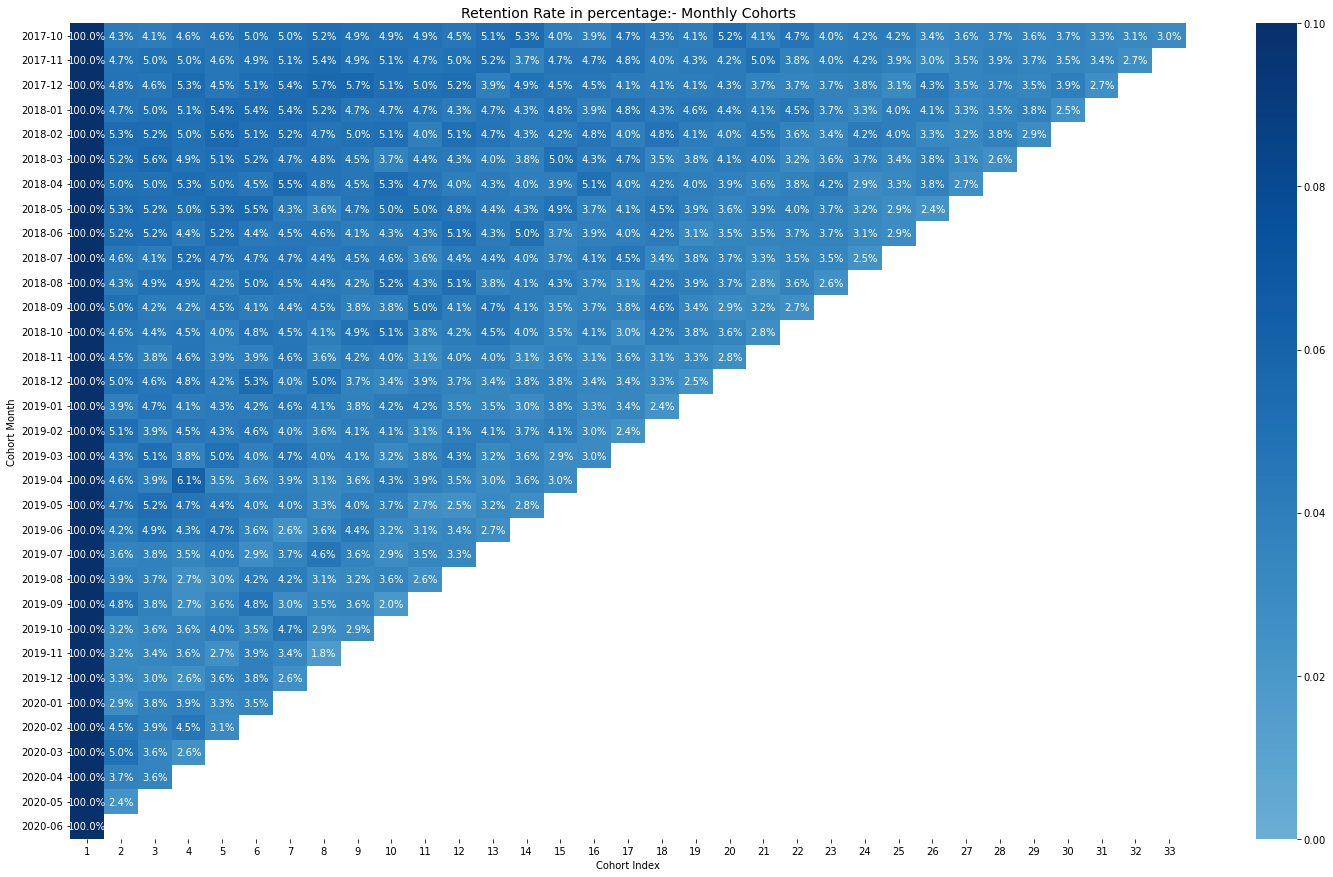

In [339]:
plt.figure(figsize=(25, 15))

plt.title('Retention Rate in percentage:- Monthly Cohorts', fontsize = 14)

sns.heatmap(retention, cmap='Blues', fmt= '.1%', center=0, annot=True, vmin = 0.0 , vmax = 0.1)
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='360')
plt.show()

# Вывод

**Итоги проекта:**

    1) Предобработка данных
    2) Работа с выбросами
    3) Визуализация и описание параметров
    4) Проверка статистических гипотез
    5) Сегментация пользователей
    6) Построение линейной регрессии и проверка значимости коэффициентов
    7) Подсчет продуктовых метрик